In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df=pd.read_csv("training.csv")
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [6]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RefId,72983.0,36511.428497,21077.241302,1.0,18257.5,36514.0,54764.5,73014.0
IsBadBuy,72983.0,0.122988,0.328425,0.0,0.0,0.0,0.0,1.0
VehYear,72983.0,2005.343052,1.731252,2001.0,2004.0,2005.0,2007.0,2010.0
VehicleAge,72983.0,4.176644,1.712210,0.0,3.0,4.0,5.0,9.0
WheelTypeID,69814.0,1.494299,0.521290,0.0,1.0,1.0,2.0,3.0
VehOdo,72983.0,71499.995917,14578.913128,4825.0,61837.0,73361.0,82436.0,115717.0
MMRAcquisitionAuctionAveragePrice,72965.0,6128.909217,2461.992768,0.0,4273.0,6097.0,7765.0,35722.0
MMRAcquisitionAuctionCleanPrice,72965.0,7373.636031,2722.491986,0.0,5406.0,7303.0,9021.0,36859.0
MMRAcquisitionRetailAveragePrice,72965.0,8497.034332,3156.285284,0.0,6280.0,8444.0,10651.0,39080.0
MMRAcquisitonRetailCleanPrice,72965.0,9850.928240,3385.789541,0.0,7493.0,9789.0,12088.0,41482.0


In [9]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [10]:
df["IsBadBuy"].value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [11]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [12]:
df['Make'].value_counts()

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
ISUZU             134
VOLKSWAGEN        134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
ACURA              33
CADILLAC           33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64

In [13]:
df['Model'].value_counts()

PT CRUISER              2329
IMPALA                  1990
TAURUS                  1425
CALIBER                 1375
CARAVAN GRAND FWD V6    1289
MALIBU 4C               1225
TAURUS 3.0L V6 EFI      1160
SEBRING 4C              1157
COBALT                  1106
PT CRUISER 2.4L I4 S    1104
1500 RAM PICKUP 2WD     1101
IMPALA V6               1062
STRATUS V6 2.7L V6 M     991
FOCUS                    909
GRAND PRIX               885
GRAND PRIX 3.8L V6 S     862
IMPALA 3.5L V6 SFI       827
ION                      720
MALIBU 4C 2.2L I4 MP     715
ALTIMA                   681
AVENGER 4C               679
SPECTRA                  674
FORENZA                  649
1500 SILVERADO PICKU     596
MALIBU V6                586
G6 V6                    555
HHR                      549
STRATUS V6               543
UPLANDER FWD V6          542
FIVE HUNDRED             525
                        ... 
MARINER 4WD 4C 2.3L        1
SEQUOIA 4WD                1
RODEO 2WD 4C MFI I-4       1
ALERO 4C 2.4L 

In [14]:
df['VehYear'].value_counts()

2006    17043
2005    15489
2007    11423
2004    10207
2008     6885
2003     6227
2002     3405
2001     1481
2009      822
2010        1
Name: VehYear, dtype: int64

In [15]:
df['VNST'].value_counts()

TX    13596
FL    10447
CA     7095
NC     7042
AZ     6174
CO     4998
SC     4280
OK     3594
GA     2450
TN     1764
VA     1662
MD     1158
UT      875
PA      847
OH      795
MO      758
AL      690
NV      562
IA      499
MS      493
IN      486
IL      458
LA      349
NJ      317
WV      292
NM      239
KY      230
OR      211
ID      196
WA      136
NH       97
AR       70
MN       62
NE       26
MA       15
MI       14
NY        6
Name: VNST, dtype: int64

In [14]:
df['IsOnlineSale'].value_counts()

0    71138
1     1845
Name: IsOnlineSale, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755) 0    64007
1     8976
Name: IsBadBuy, dtype: int64


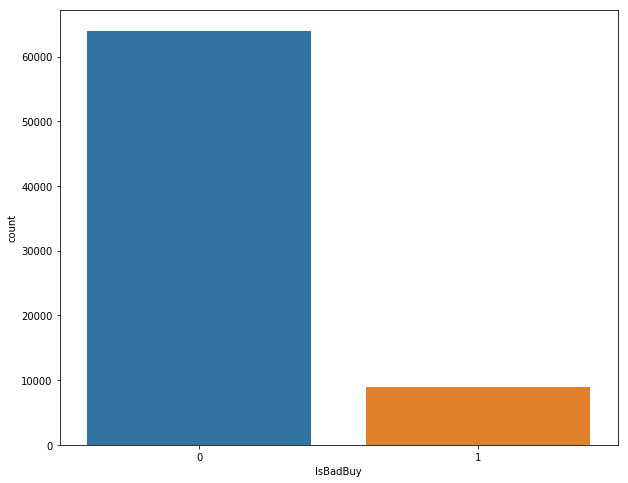

In [16]:
#AB test
plt.figure(figsize=(10,8))
Ab_test=sns.countplot(x=df["IsBadBuy"])

print(Ab_test,df['IsBadBuy'].value_counts())

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


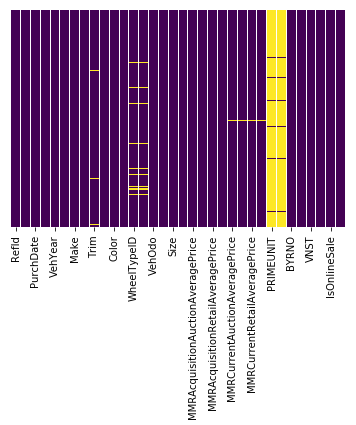

In [17]:
#checking out missing  values 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
df.head()

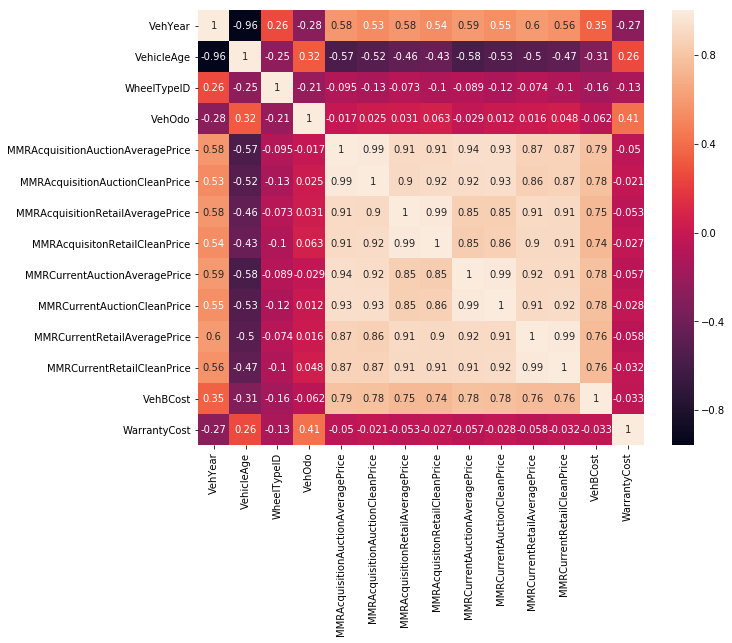

In [18]:
#Co relation plot
df.columns
features=df.drop(["RefId","IsBadBuy","Make","Model","Trim","SubModel","PRIMEUNIT","AUCGUART","BYRNO","IsOnlineSale","VNZIP1","VNST","WheelType"],axis=1)
corr_1=features.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_1,annot=True)


In [18]:
# sns.pairplot(data=df.drop(["RefId","IsBadBuy","Make","Model","Trim","SubModel","PRIMEUNIT","AUCGUART","BYRNO","IsOnlineSale","VNZIP1","VNST","WheelType"],axis=1),hue=df["IsBadBuy"],kind="scatter",dropna=True)


g_1=df.groupby(["Make"],as_index=Falsedata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAtwAAAKDCAYAAAApcd1LAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJzs3Xd4FMX/wPH33KVX0i/UJCRUgYTQQSChoxQVFUWKwteCdFCaUhQEG2BFULBhwS4qCEhvIiUBQYFQAlICCek9uZvfH3vpF8hhis+PeT0PD3e7c/eZz87e3tzs7EZIKVEURVEURVEUpWroaroCiqIoiqIoivL/mepwK4qiKIqiKEoVUh1uRVEURVEURalCqsOtKIqiKIqiKFVIdbgVRVEURVEUpQqpDreiKIqiKIqiVCHV4VYURVEURVGUKqQ63IqiKIqiKIpShVSHW1EURVEURVGqkE1NV0BR/ovyEs7W2J9gdax9Z02FBuBqr+Aajb/qWL0ajT9upleNxic9o2bjuzjXXOzMzJqLDeDiUrPxazh/UZNtD8is7BqNnx8dU6Px39/sV6Pxp15YI6ozXlV9z9p6B1VrHhWlRrgVRVEURVEUpQqpDreiKIqiKIqiVCE1pURRFEVRFEWpXiZjTdegWqkOt6IoiqIoilK9pKmma1Ct1JQSRVEURVEURalCaoRbURRFURRFqV4mNcKtKIqiKIqiKEolUSPciqIoiqIoSrWSt9kcbtXhVhRFURRFUaqXmlKiKIqiKIqiKEplUSPcilKJnntpCTv3/IGnRy1+WPNelcRYuuQF+vWNJDMri9GjJxMVfaxMmfvvH8jMGePR6/Vs2LCFGTMXFq4bMmQAc56fgpSSo0f/YviIcRWObRveDufHx4NOR/amX8j++vMS6x0GP4B9n7vAaESmJJO+7GVM8VcB0Pn44jzhWXQ+viAlaXOnY7oWZ3X+PeYNJygilLysHDZMW8nVY7El1ts42DFo+QRq1fdFmkyc/i2KnS+vBcC1thd3LXkCezcnhE7HzpfXcnbbkQrH3hMbz6vb/8ZkgsF31OWxdkEl1q87fpGlu07i6+IAwIOt6nNvC+1P1S/beZJd5+KRSNrX9+LZ7k0Rwrq/QKwLaI5d5EMgdOT/uYv8PzaUWK9v3gm7bvcj05MAyIvahvHPXQg3T+wHPg06ATo9+VFbyT+yw6rYNZ2/LqA5dt2Hgs6c+4FfS+berBN2XYcg05O13KO3Yjy2u6iAnQMOo17AeDqKvK1fWJ/7uXhe3fYXJikZfEc9HmvfsGTuxy6ydOcJfF3stdxDA7i3pZb7GztPsOvsNQD+1yGYPk1qWx1f16A5dt0e0PI/tpv8gxtLrNc364hdl/uQGQX5b8N4fA8AjhOWI69fAsCUmkjuT+9aHb+4Peeu8coWbVvc07Iej7UPLlNm44nLrNir/an0Rr5uLL477N/FPH+dV3ed0rZ/s9o8Fh5QYv26vy+zdM/pou3foi73Nq8DwJW0bF7Y+jdX07U/Hf/2gFBquzlaFV9/RxscHhqLEDpyd20gd8PaEuttu92NXeRAMJmQOVlkf7wU05ULCC8/XBaswhR3EQDj2b/J/vSNW9kERMwfTmBEKPlZOfw6dSXXLBz7BiyfQK0GvphMJs7+FsWuxVo9u88ZRr2OzbRyjnY4ebnxTosnbqkelUZNKVGUf0cIsR1YJKXcWGzZJKCRlHKshfIBwM9SyjtKLX8c6CGlfND83A2IAnpKKc9VWQL/wuD+vXj4voHMevG1Knn/fn0jCQkOpEmzLrRv15p33l5Epy4DSpTx9PTg5UXP0a5DXxISElm9ahmREV3Yum03wcGBTH92HF27DSY5OQUfH6+KB9fpcH5qEqnPTcWUEI/70hXk/b4H4z/nC4vkn40he9LjkJODff9BOD32JOkvzwfAZcosstauIS/6IDg43tLBNiiiFR6BBt7vNhX/sIb0WjCKNYPnlSl3YOUvXNj3NzpbPQ9+PovA7i05t/0oncYP4sTP+4leswWvkNoM+fAZVnSZXKHYRpNk8da/WH5vW/xcHRj2+T66NfSloZdLiXJ9GvkzI7JZiWXRl5OIvpzEV8M7A/DoV79z6GIibepZsf2FwK7nMHK+XoJMS8LhkecwnolGXr9Solj+yQPkbSn5Q0imp5D9xSIw5oOtPQ6j5mM8HY3MSKlw+BrNXwjsIh8m59ulWu7DZmM8cwSZWCr3UwfK7UzbdhqE6eKpCmZbktEkWbzlOMuHtNNy/2wP3YJ9aejlWqJcn8b+zOjRvMSyXWev8ffVFL4c0YU8o4nRa3+nc6APLva2Fa+AENhFPETOd8uQ6Uk4PDQT49mjFvI/SN72L8u+Pj+X7M8WVDzeDRhNkkWbj/PeA+21bfHpbro19KOhd9G2OJ+Uwer9Z/jo4U64OdiSmJHzr2Mu3nGS5YPC8HOxZ9hXB+gW6E1Dz1L7XogfM7o1LvP65zcfZ0ybADrU9yIzN9/qH7oIHY7DxpPx+nRkUgLOz79NfvQ+TFcuFBbJ27+VvB0/A2DTqiMODz5J5rJZAJjiL5Mx/0krsy4pMKIVHgEGVnfVjn09F47i80HzypQ7uPIX/jEf++7/YhYB3VsSu/0o21/4rLBM2Khe+DYP+Ff1UaynppQoVeELYGipZUPNy63xPlBXCNHT/PwFYPW/7WwLIarsh2ab0Ba4u7nevOAtGjCgD59+9g0A+/84jHstdwwG3xJlggLrExNzloSERAC2bN3FPff0B2DM6IdZvvwjkpO1jlZ8/PUKx7Zp1BTj5UuY4q5Afj45O7di26FLiTL5R6MgR/tyzT/xFzpvHwD09RqAXq91tgGyswrLWSO4VzjHv9VGLa9EncHBzRln31ol65Cdy4V9fwNgyjNy9VgsrgZPAKQEOxdtZMve1Yn0a0kVjn0sLpl6tZyoW8sJW72OPo0NbD9ztUKvFUCu0USeyUSu0US+UeLpZF/h2AA6QyAy6RoyJQFMRvJP/IG+YWjFXmwyap1tAL0NWNvhoGbz1xkCkcnxxXI/UPHcAeFbH+HkhjH2rwq/priyufuz/XTFcj97PZ3wel7Y6HQ42trQyMeNvbEJVsXXGQKRKdeQqeb8Tx1E37DVraTyrx27kkw9j2LbokntMtviuyMXeDCsAW4O2o8KT2fr9vUyMa+mUs/dkbrujlrMED+2n63YNjyTmI5RSjrU137cOdnZ4Girtyq+PqgxpmuXkQlxYMwn74/t2IR1KlkoO7Posb0DIK2KcTMNe4fzV7Fjn305x75/ih37rh2LxdXfs8x7NRnYkRPr9lVq/W6JyVg1//6j1Ai3UhW+ARYIIeyllDnmEezawG4hxDPAA4A98L2Ucq75NXohxPtAJ+ASMEhKmSWEeAr4XAgxCugBhAMIIUKAtwFvIAMYI6U8JYQYBMwC7IB44BEp5TUhxALABwgC4oDhVb0RqkKd2gYu/nO58Pmli1eoU9tAXNy1wmWnz8TSuHEwDRrU5eLFKwwa2Ac7OzsAQkK0KQA7t/+AXq/nhRdfZ+Om7RWKrfPyxpRQFMeUEI9t46bllnfo3Z+8g/u119aph8xIx2X2i+j9/MmLPkjmRyutvmjG1eBB6uWiHwlpcYm4+nmQcS3ZYnl7NyeCe4ZxaLU2/WDPsu944NPphI/qja2TPWsfXlTh2NfSc/BzLToN7efiwLG4siPEW2KucvhSIvVrOTOtexMMro60qu1Bm3qe9Fq5DSQ8GFqfoFIjwzcjXD2QaUU/EGR6Ejr/oDLlbEJao6/bCFNSHHnb1ha+Rrh6YH/vREQtH/J2fGPV6DbUbP7CpRYyLbHwuZZ7YJlyNsGt0ddphCnpKnnb15qn1gjsuj1A7oZV6OqXv7/eyLX0bPxcHQqf+7k6cuxK2X1uS0wchy8mUt/DmWndm2Jwc6SRjysr9p3mkfBAsvOMHPznuvVt71yrZNunJaEzWMg/pDX6OiGYkq+St+PrwqlF2Nhi/9AsrbN+8FeMZyo+jaq0a+nZGIrvB64O/FlqW5xPygBg5Gd7MUnJk51D6BxYcmDAqpgZpba/iz3HrqaWKbflzDUOX06mfi1HpnVphMHVgQvJWbja2TB1/VEupWbRvp4nEzoGo9dV/EenqOWNKTG+8LlMSkAf2KRMOduIgdj3vg9sbMh89dnC5TpvA85zlyOzMsn5/kOMMWWnAd6Mi8GDtCslj30uhhsf+4J6hnF4dcmpV651vHCr78uFPcetroPy76gOt1LppJTXhRB/AH2BH9FGt9cCvYAQoB3aoNc6IURX4IJ5+UNSyv8JIb4C7gPWSCmPCiE2AluAwVLKXHOYlWid7DNCiM5one/ewE5gnZRSCiGeBKYC082vCQO6Simzq3obVBVLp0KlLDmSkpycwrjxM/nis+WYTJJ9+w4SGFQfABu9DcHBgUT2HELduv5s3/o9rcIiSUkp++VlIXjZ2OUUtYvohT6kMRnTJ2ov1euxad6SlAljMF27hsuMudj37EvOpvU3j3uzOkjLtRB6HQPeeppDH24k5R/ty7LpwI4c+2YnB97fQO3Wwdy17ClW95qhDX3filLV6RrkS9/GtbGz0fH1kQvM2fgnK4e040JyBucSM9g4pjsAT353gEMXEwmvW3b0ySql6m08c4SsE3+AMR+bVt2w6/cYOV+9rhVNSyL743kIZ3fsBo8j/9QhyKxAu99IteVvoXNUqsmMZ4+QddKce8tu2PV9jJxvXscmtDvGc38WdT5vRQV2j64NfenbxB87Gz1fHznPnF+PsvKB9nQM8OF4XAqjvtiLh6MdLf09sLGiswdYTL8049mjZJ08oOXfoit2fUaR8+1SALJXzURmpCDcvLEfMhlTwiXtbMEtsLQpSlfPaJJcSMrgg6EduJaWzaNf7OObR7sWjnhXha4BPvRtZMBOr+PrYxeZ89tfrLynNfkmE1FXkvniwfYYXO2Z/usx1p24wj3NrJhHb/GMUNktkbdtHXnb1mHTPgK7ux8me/WryJRE0p8ZhsxIQ9cgBKdx80h//n8lR8QrUgULO8GNjn13vfU0UR9uJOVCfIl1TQZ2JOaXP5Cmyh2BvyW32RxuNaVEqSrFp5UUTCfpbf4XBRwGmqB1tAHOSSmjzY8PAQHF3usd4JKUchuAEKIW0AH4VggRbV5fcPSsD2wSQvwJTAGKT6j88UadbSHE40KIg0KIgx98Yv1FVVXlqSdHcvDAJg4e2MTlK3HUrVf0RVGnrj+Xr5Q9tf3zL5vp1GUAXboO5OSpM5w+rc3CuXjpCuvWbSI/P5/Y2H84deoMIcFlR8osMSXEo/MuGqXSeftgul72S9s2NBzHB4eT9sIsyM8rfK3xTIw2HcVkJHffbmwaNqpQ3LARPRm5fiEj1y8k/WoSbrWL5v26GjxJL2eEp8/i0SSdi+PQ6qKLy1o+2I0TP2uj7pcPn8bG3hYnz4pNAfJ1sedqWlbh86vp2fiUOlVey9EOOxvtsHpvi3r8bR6F23b6Gi0M7jjZ2eBkZ0PnAJ8yo4I3I9OSEK4ehc+Fi0fhBYKFsjMKp47kH92Jzq9B2ffJSEFev4y+bkiZdTdSk/nL9CSEa1Hn/Ka5/7kTnZ/2I1Pn3xCb0AgcRi/CrtsQbJp2xLbLvRVPHPB1deBqWtGh42paFj4ulnLXpirc26I+f18tGv0f0yGYtSPu5L372yOR1KvlbFV8mZ5csu1dPQovjixUPP9ju9D5FrV9wdkMmZqA6eIpdD71rYpfnJ+LA3HF94O0bHxcHEqWcXWge4gftnoddWo5EeDpzAXzqPet8HUutf3Tcyzse7bY6c37XrM6/B2fWljfxt6u1HV3xEanIyLIhxPx1v3QlEnx6Dx9Cp8LD29MyeVPx8v/Yzu2YZ3NT/KQGWkAmM7HYLp2BZ1f3QrFDR3Rk+EbFjJ8w0LSryXh6l/y2Jdx1fJnqPfi0STFxnF41cYy65oM6PDfmE4C2hnOqvj3H6U63EpV+QHoIYRoDThKKQ+jDYQsklKGmv8FSylXmcsXn9BrpOTZF5P5XwEBJBR7n9BiF1y+AyyVUrYAxgLFvwlueMSXUq6UUraRUrYZM+Iha/OtMsvf+5g2bXvTpm1v1q3byPBhQwBo3641qSmpJaaTFCi4GLJWLXeefHIkq1ZrPyDWrfuV7t21uYdeXh6EhARx9tyFMq+3JP/UCfR16qLzM4CNDfZdI8nbv6dEGX1QCM7jppL2wkxkStGXQX7MCYSLK8LNHQDbVq3JvxBbobhRn/zGx/1n83H/2cRsOkTz+7R54/5hDclJy7R4SrXLtCHYuzqyZf6aEstTL1+nQWftN5hncG1s7G3JvF6xL9/mBncuJGVyKSWTPKOJjSfj6B5U8jR5fHpRp2DH2WsEemodK4OrA4cuJpFvMpFnNHH4YiKBntZNKzDFxSI8/BDu3qDTY9OkXdmpAc7uhQ/1DUMxmS+oFC4eYGMeXbR3Qle7IaZE6+4QU5P5m+JiEbV8EW4FubfFePYmuZvzy93wAdkfzCB71Uxyd3xD/t/7yNv9nfW5J2cUy/0K3Rv6lZ/7masEmqeNGE2S5CztxNyp+FRi4tPoGOBtVfyi/L20/Bu1Kdv2Tm6FD/VBrTAVXFBp76TN2wdwcEbn37Bo3S1o7u/OhaQMLiWbt8WJy3QLLrktIkL8OHBB65AmZeZyPimDurWcbj2mnysXUjK5lJqlxYy5SvfAktswvtiFmTvOxRPooe17zX3dSM3JJ9HcBgcuJhHkYd0PHuO5k+j86iC8DaC3wbZdd/KjS3Zadb51Ch/btGyP6Zp2Vxjh4g5C62oJbwM6vzqYEiq2/aM/+Y1P+83m036zOb3xEM0qcOzrPG0Idq6ObJu3psw6jyB/7N2duXwopmKJK5VKTSlRqoSUMt18t5LVFF0suRF4UQjxmXl9HSDvFt47SQhxRQhxj5TyeyGEDmghpTwCuAOXhDb3YmTlZFNxz8xdzIGooyQnp9Jj8COMHT2c+wb0qbT3X79hC337RnLy7z1kZmUxZsyUwnUHD2yiTdvegHbrwJYttTtFLFi4lJiYswBs3LSdXj27cfTINoxGI9NnvkhiYgVPtZuMZCxfhtuLr4FOR87m9RgvxOL4yGPkx5wgb/9enEY/iXBwxHWmdmcSU/w1baTbZCJz1XLcXloKQpB/+iQ5G3+2Ov+zW6MJimjF/3a+Tn5WLhumrSxcN3L9Qj7uPxsXgyedxg/m+ulLjPxFuzND1CebOfrldrYt+Iw+i8fQZnRfpIT1U1dUOLaNTsf0yGaM/e4gJikZ1LwuDb1deXdvDM383One0Jcvos+z40w8ep3A3cGW+X1aANAzxMCBf67zwKfaD5ROAd50a2jlnFZpInfL59jfN8l8a7w9yOuXse08CFNcLMYzR7Bt3UO7mM5kQmZnkPvrhwAIL3/suz+gTUERgryDm5AJl6wKX6P5SxO528y5C0H+MXPunQZiijuP8ewRbMMi0QeFgjSWyL0yaLk3Z+y3f2AywaA7zLnvOaXlHuzHF1Gx7DhzrVjuLQHIN5l47MvfAXCxt2Fh/1BsdFaOdUkTudu+xP6eidotIY/vQSZewbbDAEzXzmM8e9ScfyswGZHZmeRu+ggAnacBux6PaKfvhY68gxvL3N3E2m0xo+cdPPXNH5hMkkEt6hLs7cq7u0/SzFCL7sF+dArwYd+5BO5dvQOdEEzu1pRajnb/Kub0ro0Z+2MUJgmDmvnT0MuFd/efoZmvG90DffjiyD/siE1ALwTuDjbM76kd//Q6wZTOwTz5QxRSSpr6uhXeLrDCTCayP3sbp8mLEDodubs3Yrp8HvtBIzHGniL/yD5sewzCpmmYdkvUzDSyVr2ixW/cAvtBI80X9Jm0WwKaR7ytcc587Bu963XysnLZWOzYN3zDQj7tpx37OkwYzPWYSwxfrx37oj/ezJ9fbgegyaCOnPzpd6tjV5Xb7S9NivLmACnKvyWEuAf4DmgqpTxhXjYRGGMukg48gjaiXXhbQCHENMBFSjnP/DyAUrcNFEIEAcsBA9oFkmuklAuFEPcBrwIXgT+AUCllT/NFkwlSymUVqXtewtka+2A41r6zpkIDcLVX2XvqVqdVx+rVaPxxM624VV9VSL/1U++VwsW60b9KlWndvNZK52LdWYdKV8P5i5pse0Bm1ezlNfnRNTvy+/5mv5sXqkJTL6yx/vZF/0LOmd+r5HvWvmGHas2jotQIt1JlpJTfU+p6GinlG4Clu/7fUaxMiZtYSylji683LzsLlBk6llJ+C3xrYflzVlRdURRFUZSq9B+eb10VVIdbURRFURRFqV632ZQSddGkoiiKoiiKolQhNcKtKIqiKIqiVK//8F+FrApqhFtRFEVRFEVRqpAa4VYURVEURVGq1202h1t1uBVFURRFUZTqdZvdpURNKVEURVEURVGUKqRGuBVFURRFUZTqdZtNKVEj3IqiKIqiKIpShdQIt6IoiqIoilK9brM53KrDrSgWONa+s8ZiZ13eVWOxAd5tPadG4z9+5+Uajf/gS8k1Gt9J1Oxh2VnUXP4ONXzSNdZ0qUbj13Tb26Gv0fj2ombbP0j61mj8sS3+qdH41U1KdR9uRVEURVEURVEqiRrhVhRFURRFUaqXumhSURRFURRFUZTKoka4FUVRFEVRlOp1m100qUa4FUVRFEVRFKUKqRFuRVEURVEUpXrdZnO4VYdbURRFURRFqV4mdVtARVEURVEURVEqiRrhVhRFURRFUarXbTalRI1wK4qiKIqiKLcFIURfIcRJIcRpIcQMC+vrCyG2CSGihBBHhRD9KyOuGuFWFCstXfIC/fpGkpmVxejRk4mKPlamzP33D2TmjPHo9Xo2bNjCjJkLC9cNGTKAOc9PQUrJ0aN/MXzEuEqp13MvLWHnnj/w9KjFD2veq5T3tKTb/OEERISSn5XDpqkriT8WW2K9jYMd/ZdPwL2BL9Jk4txvUexZvBaApkPupMvsh8iISwLgyMebOf7l9grHtmnZFsfh40CnI3f7enJ++qLEerseA7DvNQhMJmR2FpmrlmC6dB6bO8JxGPo/hI0NMj+f7M9XkP9X1C3l//j8xwmPaENOVg5vTF3GmWNnypR5ae0iPHw9yM3OBWDOI8+Tcj2FMXPG0KJjSwDsHe1x93LnoRZDrYo/at4YwiLCycnKYfm0Nzl37GyZMnO+XFAi/sLh80i9nsJdYwYSObQXxnwjqYmpvPfMWyRcircq/sNzH6NFRBi5WbmsmvY2F46fK7fs+Pen41Pfjzl9phQu6zGyHz1G9MVoNHF06yG+XrzGqvj3z32U5hFh5GXl8Mm0d/nnBvGffP9ZvOv7sqDPNADunvIgrXq1wSQl6QkpfDLtXVKuJVU49hPzn6BtRFtysnJYMnWJxbZfvHYxnr6e5GTnAPDcI8+Rcj0Fn9o+TFkyBRc3F3R6HR8u/pCD2w5alftj8/5HWEQbcrNyeHvaMottP//LhdQq1vYvDp9L6vUUeg/rS58R/TEZTWRnZrNi5jtcjLn1PyU+Yt5oQiPCyc3K4b1pbxFroS7PffliibosHj6f1Osptxzz4bmP0TKitXnfe4vzN2j7Ce/PwKe+H8/3mQzAU29PwRBUGwAnN2cyUzOY23+aVfH7zBtBcEQr8rJyWTdtBXGljn0AD338LK6+tdDZ6Lnwx0k2PP8h0iRp2r8d3Sbfh3dwbVYNnMOVP8uvuyW24e1wfnw86HRkb/qF7K8/L7HeYfAD2Pe5C4xGZEoy6ctexhR/FQCdjy/OE55F5+MLUpI2dzqma3FWxa8SNXBbQCGEHngH6AVcBA4IIdZJKf8qVuw54Csp5XIhRDNgPRDwb2OrDrdSLiHEdmCRlHJjsWWTgEZSyrEWygcAP0sp77Cw7gVgp5Tyt3JidQemSSnvrkC93gCGAPWkrN5zUv36RhISHEiTZl1o364177y9iE5dBpQo4+npwcuLnqNdh74kJCSyetUyIiO6sHXbboKDA5n+7Di6dhtMcnIKPj5elVa3wf178fB9A5n14muV9p6lBUS0olaAgY+7TsUQ1pDIhaNYO2hemXKHV/7CxX1/o7PVc+8Xs2jQvSXntx8FIOan39k+5xPrgwsdjqMmkrHoGUyJ8bi+uJy8w3sxXTpfWCR37xZyt/wEgE3rTjgOe4qMV2Yg01LIeG02Mvk6uroBuEx/hdTxD1hdhfCINtQOqM0TXR+ncVhjnlo4lmmDplos+/rE1zh99HSJZR+88EHh47tH3U1Q84ZWxQ+NCMcQ6M/Ebk8REtaI0Que5LnBz1os+9bEJZz9s2SHMPb4WWbePZXc7Fx6PdKXYTNH8sa4iu8vLbqH4Rfoz8zu4wkKC2HEwsdZMHimxbKt+7QnJzO7xLImHZsT1qstc/pNJT83H1cvtwrHBmjePQzfQAPzuk8gICyEoQvH8Org2RbLhvZpVyb+byvX8fMS7cdf91H96D9xCF/Mfr9CsdtEtKFOQB3GdB1D47DGjFs4jsmDJlss++rEV4k5GlNi2dAJQ9n18y7Wr1lPvZB6vPDRCzza+dEKxQYIiwjHP7A247s9QUhYYx5f8BQzBz9jseybE5dw5s+S+96uH3ew6bNftVx6tmPkc6NZOHJeheMXFxrRGkNgbaZ0G0twWCMeW/AEcwZPt1j2nYlLOfdn2R8m1mrZvTV+gf7M6D6OoLAQht9g3wu3sO8tH7ek8PGDs0eSlZZpVfzgiFZ4Bhp4p9tU6oQF03/Bo6wePLdMuW+ffovc9CwAhrw3kWZ3tef4T78Tf+oiXz+xjP4vPWZVXAB0OpyfmkTqc1MxJcTjvnQFeb/vwfhP0bEv/2wM2ZMeh5wc7PsPwumxJ0l/eT4ALlNmkbV2DXnRB8HB8b8zlaNm6tEOOC2lPAsghPgSGAQU73BLoODg5A5crozAakqJciNfAKWH34aal1tFSjmnvM62NYQQOuAe4B+g6799P2sNGNCHTz/7BoD9fxzGvZY7BoNviTJBgfWJiTlLQkIiAFu27uKee7QzUmNGP8zy5R+RnKyN8sTHX6+0urUJbYG7m2ulvZ8lQb3D+fvb3QDERZ3B3s0ZJ99aJcrkZ+dycd/fAJjyjFw7FouLv+e/jq1v2ATlBsPVAAAgAElEQVTT1UuY4q+AMZ/c37diG96pZKGsoi9RYe+AdtwE4/nTyGRtW5suxoKtLdjYWl2HDr3bs/XbrQCcjDqJs5szHr4et5RP14Hd2Lluh1WvadurHTu/3Q5ATNQpnN2cqWVF/OP7jhWONsZEncTL37offGG927L3Oy3+2agYnFydcPepVaacvZMDfcbczc9vfVtiecSwPqxf/j35ufkApF1PtSp+y95t2P/dTgBio2JwcnXGzWJ8eyLH3M2GUvGzzR2hgjJSygrH7tC7A1u+3QLcWttLKXFydQLA2dWZ61et++y37dWe7d9uA7S2c7Ky7bNK5F702bgV4b3asctcl9NRp6yuy63Q9j3t83LW3Pbl7Xu9xwzgp7e+Kfe92t3Vif3rdlsVv1GvcI5+uwuAS1GncXBzwsW3bPyCzrbORo/e1oaCXSzh9GWun71iVcwCNo2aYrx8CVPcFcjPJ2fnVmw7dClRJv9oFORoZ1XyT/yFztsHAH29BqDXa51tgOyswnK3qTpo/YcCF83LipsHPCKEuIg2uj2+MgKrEW7lRr4BFggh7KWUOeYR7NrAbiHEM8ADgD3wvZSy4Ke+XgjxPtAJuAQMklJmCSE+Qhv9/kYI0RZ4A3AGcoAexYMKIZyBt4AWaPvoPCnlj+bVEcAxYC3wELDd/Bof4HPACzgA9AXCpZQJQohHgAmAHbAfGCulvKX7EdWpbeDiP0U/di9dvEKd2gbi4q4VLjt9JpbGjYNp0KAuFy9eYdDAPtjZ2QEQEhIEwM7tP6DX63nhxdfZuGn7rVSlRrgYPEi/UtRRSI9LxMXgQea1ZIvl7dycCOoZRvTqXwuXBfdvR532TUg6F8fO+WtIv5JYodg6T29M14u2sykxAZuGTcvG7DUI+373I2xsSF9YdvTZtl1XjOdPQ35eheIW52XwIuFKQuHz63HX8TJ4kWRhWsLE1yZhMprYu2Eva9/8ssQ6nzo++NX34+ieo1bF9zB4cv1yyfiefp4kW4j/1GsTMBlN7P91H9+9+VWZ9REP9iR6+2Hr4vt5kXi5qP0T4xLxMHiREl+y/e+ZOpSNH/xUOK2igF+QPyHtmnLvMw+Tl5PL2oWfEHu04qOftfw8SSqWf1LcdWoZPEktFf/uqUPZ8sFPhT8uihs4bSjt7+1KVlomyx6aX+HY3gZv4q8UTb9JiEvA2+Btse0nvzYZo9HI3g17+eJNbXzis6WfsXDNQgaOGoi9kz2zH7Y8Ml8eL4MX1y8XxU+Mu46Xn5fFth9brO2/eXNt4fK+I/pz95hB2NjaMO+h56yKX5yHofR+cB2PcvbDJ14bj8lo4sCv+/j+za9vOWYtP08SS7V9+fveujL7XoFG7ZqRkpDM1VjrOr+uBk9Si+WcGpeIq58H6RaOfQ9/Mp3aoQ05s/0If6/fb1UcS3Re3pgSih37EuKxbVz22FfAoXd/8g5qcXV16iEz0nGZ/SJ6P3/yog+S+dHK/8ZfeayiOgghHgceL7ZopZRyZcFqCy8p/evzIeAjKeXrQoiOwKdCiDv+7Rl1NcKtlEtKeR34A63zCtro9lq0uU8haKdmQoFwIUTBaHMI8I6UsjmQDNxX/D2FEHbm95gopWwF9ASyKGk2sFVK2Ratg/2quRMO2gfhC+B74G4hRMEw5Vzza1qb19U3x2sKPAh0llKGAkZg2K1uEyHKflZLj5IlJ6cwbvxMvvhsOTu2fc/52Ivk52sjejZ6G4KDA4nsOYRhw8ey4r3XcHe37rR6zbJwrCpnlFDodfR762miP9xI6gWto3Dutyg+7DSJz/rM4p/dx+i95IlKj527+UfSpjxC1pcrcRj8SIl1ujoBOAx9nKxVS62Ie+M6WBolfW3Ca4zvPY4ZQ6bTvF0zIu6LLLG+68Cu7PllDyYrv3As739ly701cQnP9JnI3Ptn0qRtM7re273E+i73dKNhi2DWrfjeqviWm6BkBeo1C8C3gYHDG/8oU1an1+Ps5sKCwTP56qVPeeqdKWXK3DB8BT5/dZs1wLeBgSMbD1h8j3WvfcnsTmM58ONuuo3sa7FMRVlq+1cnvMrY3mN5dsizNG/XnEhz23cf2J3NX29mRPsRzB05l2nLplnMp1wV2PYAb0x8nal9JvD8/TNp2rYZ3e6NKFz36yfrGdf1CdYs/pgh4x+seOzSVbHYZSlbl3cmLmVGn0m8cP8sGrdtxp2l9kPrYt687es1C8Cvgb/Ffa9A+4FdrB7d1uKXXVbeGZLPR7zM0rZPo7ezIaBTc6tjVSR4eecn7CJ6oQ9pTNa32o98oddj07wlmaveJWXSE+gMtbHv+e/2+/86KeVKKWWbYv9WFlt9EahX7Hldyk4ZGQ18ZX6vfYAD4P1v66VGuJWbKZhW8qP5/8eAh4HeQMFVZy5oHe0LwDkpZbR5+SHKXmjQGLgipTwAIKVMhTIH097AQCFEwRUtDkB9IcQZoD8wWUqZJoTYby77C9AFbaoJUspfhRAFQy09gHC0CyMAHIGioYJiiv8qFnp3dDqtj//UkyMZPVrrox88GE3derULX1Onrj+Xr1wt814//7KZn3/ZDMCY0cMwmm/wf/HSFfbvP0x+fj6xsf9w6tQZQoIDOXjoiKUq/Se0HNGTOx7SvrSvHj2LS7FpCC4GT9KvWh7d7rF4NMmxcUSvKrwEgOzk9MLHxz7fRucZFb9g0JQYj86raPqOztMbU3JCueXz9m3D6dFJsEJ7Ljy9cZ48n8z3FmG6VvEpef1H3EWfh/oAEHM0Bm//ouOul8GLxKtlR+gTzdMFsjKy2PHDDhq1asQ281QUgDsHdOW955dXKH7vEf3oMbQ3AGeOxuBVu2T8pGtl4yeZ65Sdkc2eH3fSMDSEneapIC06t+TecUOY98BzhVM7biRyeF+6PqSdhDp35AyetYva39PgSXKp/Bu2bkRAiyBe2f0uOr0eNy83nv1yPq8MnUtS3HUObdxvfq/TSJPE1dONtMTyp5Z0Hd6Hzub454+cwaO2N3AS0EZaU66WHFUNbN2Iei0CeXH32+j0ely93Jn05VyWDS05mn3gx92MXT2DX5aWP+p694i7S7S9j79P4Tpvg7fFaSHXi7X99h+207hVY7Z+u5XeQ3vz/PDnAThx+AS29ra4ebqRcoOLCPuO6F+q7X0AbbqWp8GLRAttn1jY9lns+nEHwaGN2PHdthJl9qzbxf8WPFVuXEt6jehHxNBeAJw9errUfmD5LE/x/XCveT/cZd4PKyJyeF+6PdQT0PYXz2L7vofBq8y+F9y6MQ1aBPHq7uWF+970L+fz8lDtBKxOryO8T3vmD7A89720NiN6ETZUO/ZdPnoWt2I5uxk8LY5uFzDm5HFq82Ea9w7n3O6yF9Zbw5QQj8672LHP2wfT9bLHPtvQcBwfHE7q9AmFZ/BMCfEYz8Ro01GA3H27sW3SjBzW/6s6VYqaGWU/AIQIIQLRzsIPRevTFHcBre/wkXnQzgGw7upyC1SHW7mZH4AlQojWgKOU8rAQYhjaxZQrihc0Tzkpfh7PiNbBLVGMm08eFMB9UsqTpd5/INoFDH+aO89OQCZah7u8oSIBfCyltHx1TTHmX8ErAWzs6hTWcfl7H7P8vY8B6N+vB2OfGsXatT/Svl1rUlNSS0wnKeDj40V8/HVq1XLnySdH8tDDTwKwbt2vPPjgYD759Cu8vDwICQni7LkLN6tajTr6yW8c/USbfh8QGUqrkb04tW4fhrCG5KRlWpxO0nHaEOxdHfnt2Q9KLHfyrVVYPqhXOImnK97xNZ49gc5QB52PAVNiAnYdIsl4Z2GJMjq/OpiuXgLAJrQDxjjtsXByxmXaIrLXfoDx1PGKJw+s/+QX1n/yCwBtIttw98i72bluJ43DGpOZllmmo6HT63BxcyE1KRW9jZ62PdsRvTu6cH2doDq4uLtw4tCJCsXf9MkGNn2yAYCwyHD6jOzP3nW7CAlrRGZaRpnT+Dq9Dmc3Z9KS0tDb6Gndow1/7tZ+0AU0D2TMorEsGlHxu0Vs/fRXtn6qTQlqGdGaHiP7sX/dHoLCQshMyyxzSn/7mk1sX7MJAK+6PkxcNZNXzB2eqE0HaNrxDk7+fhy/QH9sbG1u2NkG2PnpRnZ+qv1ouyMijG4j+3Jw3R4CwkLISsssM51k15rN7Fqj/dj1rOvD2FXTCzvbPgEG4mO1uzO07NmGuDM33v9+/uRnfv7kZwDaRrZlwMgB7Fi3g8ZhjclIy7hp27cr1vbxl+IJ7RzKb9/8Rr3getjZ292wsw3aiPSvn2gdo9aRbeg38i72rNtJiHnfu1nbh/doW9j2hgB/4szTKFpHtiEu1rrrwDZ/soHN5v0wNDKc3iP7s2/dboLDGpFVgbqE9WjDsd3WTaGyvO/tJsjc9qX3vW1rNrJtjbaveNX1YdKqWYWdbYBmXVpy5ewlkuIqNo3t4CebOfiJti8FR4bSdmRvjq/bR52wYLLTssp0uG2d7LF3cST9WjJCryM4IpQLByr2Ob+R/FMn0Nepi87PgOl6AvZdI0l/9cUSZfRBITiPm0rqnGeQKUX1yo85gXBxRbi5I1NTsG3VmvyYf1+nynCLMzv/ZUyZL4QYB2wE9MBqKeVx840dDkop1wFTgfeFEJPR+iujpDUXfJRDdbiVG5JSppvvVrKaooslNwIvCiE+M6+vA1R0QuwJoLYQoq2U8oAQwpWyU0o2AuOFEOOllFIIESaljEKbTjJGSvkFFM71PieEcAJ2o80pf1kI0RsouIJnC/CjEGKplPKaEMITcJVSnucWrN+whb59Izn59x4ys7IYM6bolPjBA5to01YbjVq65AVatmwGwIKFS4mJ0W6ZtXHTdnr17MbRI9swGo1Mn/kiiYkVvy3ZjTwzdzEHoo6SnJxKj8GPMHb0cO4b0KdS3rtA7NZoAiJaMXLX6+Rn5bJ5WtGZuoc3LOTzfrNxMXjSbsJgEmMu8fD6BUDR7f9CH+1NUK/WmPKNZCdnsHnqivJClWUykfXRWzhPfxl0enJ3bMB0KRaH+0aRf+4U+Yf3Yt97MDZ3hIMxH1NGGpnvvQyAXe970PnVxuGe4TjcMxyA9MXPIlPLH6Gy5ODWg7SJaMPKXe9rtwWctqxw3Rsb3mRivwnY2tkyf80L6G306PU6oncfYdPnRaP8XQd1Y9dPO62KWyBq6yHCIsJ5Y+d75JpvC1jg5fVLmd5/MrZ2tsz6dB56Gz06vY4/dx9hyxdap+GRWaNwcHJg8rvanU0SLsfz6piXKhz/6LbDtIxozeIdb5OblcPqZ94tXDdv/avM63/jkcNdX23lsVfG8sLGJRjz8vlg6tvWpM+xbVE0j2jN/B1vkpuVy6fF4s9c/wqL+lu+Y0uBwdOH4RfkjzRJEi8l8PnslTcsX9yBrQdoG9GWVbtWkZOVw9JpRdOS3trwFuP7jcfWzpYX17yIjY0NOr2O6N3R/Pq51mF8f8H7THx5IoPHDEZKyZIpS8oLZdHhrQdpHRHO2ztXkJOVw7vF2v7V9ct4pv8kbO1see7T+YXxj+6O5rcvtB8//UbeRcsuoeTn5ZORms5bU5aVF+qmorceIjQinKU7l5OTlcOKaW8Vrntp/RJm9Z+CrZ0tMz6dW7gfHtt9lK3m/fBWFOx7L+94h9ysHFY9807huvnrX6vQLf7aD7i16SQAp7dGExwRytM7l5Bvvi1ggf+tf4n3+8/CzsmeBz+Ygt7OFp1ex7m9xzm0RrvQtnGfNvSdPxInT1eGfvgMV/86z+cjXq5YcJORjOXLcHvxNdDpyNm8HuOFWBwfeYz8mBPk7d+L0+gnEQ6OuM7Uflya4q+R9sIsMJnIXLUct5eWghDknz5Jzsafb2kb/H8hpVwPJYf4pZRzij3+C+hc2XFFJXTalf/nhBD3AN8BTaWUJ8zLJgJjzEXSgUfQRrQLbwtonhLiIqWcZ+GiybfQRr+z0OZxt8F8W0AhhCOwDO3CSwHEonWmLwIBBdNQzDG+Q5sTvg3tB4EHsANt3nag+WLPB4GZaNcs5AFPSyl/v1HOxUe4q1vW5V01FRqAd1vPuXmhKjTyzkq5A9MtG77LqUbjO4maHQdxrsH4DjV8WVGsKf3mhapQTbe9HfoajW8varb9g6RDjcYfe8fFGo3v9csOKy4q+Peytq+uku9Zx+6PVWseFaVGuJWbklJ+T6kpG1LKN9DuNFLaHcXKvFbs8ahijw8AHUq9brv5H1LKLMDS1XRl7i0npbwXQAhhD/Qxny7qCERIKXPMZdaidcoVRVEURVGqnepwK/9f1Ae+Mt+nOxf4Xw3XR1EURVGU8vxX/gBPNVEdbuX/BSllDBBW0/VQFEVRFEUpTXW4FUVRFEVRlOr1X/jjO9VIdbgVRVEURVGU6nWbTSlRf2lSURRFURRFUaqQGuFWFEVRFEVRqtdtNqVEjXAriqIoiqIoShVSI9yKoiiKoihK9brN5nCrDreiKIqiKIpSvdSUEkVRFEVRFEVRKosa4VYUC672Cq6x2O+2nlNjsQHGHn6hRuOvDq3Z/B/PN9Zo/BxRs+MgLqaay7+mc7eR7jUaP0eIGo3vVMOn+Gu6/dN0Nbv9tx6uW6Px76/ugGqEW1EURVEURVGUyqJGuBVFURRFUZTqpS6aVBRFURRFUZQqpKaUKIqiKIqiKIpSWdQIt6IoiqIoilK9brMpJWqEW1EURVEURVGqkBrhVhRFURRFUaqXmsOtKIqiKIqiKEplUSPciqIoiqIoSvW6zeZwqw63oiiKoiiKUr1usyklqsOtKFawDW+H8+PjQacje9MvZH/9eYn1DoMfwL7PXWA0IlOSSV/2Mqb4qwDofHxxnvAsOh9fkJK0udMxXYuzug7d5g8nICKU/KwcNk1dSfyx2BLrbRzs6L98Au4NfJEmE+d+i2LP4rUANB1yJ11mP0RGXBIARz7ezPEvt1u/ISx47qUl7NzzB54etfhhzXuV8p6WdHphOPUjtfy3T15JgoX8e66YgFsDX6TRxPnfovhjkZa/f/vGdJw3HK+m9fjt6bc598uBCsVsvmAkfj1CMWblEj1xOSl/xpYp494ykNA3nkTvYMfVLdEcf+5jANya1afFK6OxcXYg8594osa+Q356Fo71vInY+TrpZy4DkHToNH9OX3XTurR6cQT+PVqRn5XLwUkrSLZQl+Yz7qfBkDuxq+XMD8GjC5cHjehBw1G9kEYT+ZnZHHpmFWmnLt0wXtOFI/HuEYYpK4c/Jywn1UI8t5aBtHjzKXQOdiRsieLv2VrurVZOxLmhPwC2bs7kpWawt8cM3MMa0vy1/2kvFoLTr37DtQ0Va4viWiwYga+5XaImvmexXZrOeIB699+JbS1nfmn4mNUxmi0cWRjjyA3yb/Wm1vbXtkTzlzl/t+YNuOPV0ejsbZH5Jo7NWE1K1Bls3J1ptewJnAL8MOXkcmTSCtJPXLxpXVouGIHBXJdDE9+z2PbNZjxA/fu1tl9XLN/gJ/oTMKw7Mt9EzvVUDk1eSdbFhJvGrIr2L+BQx4suu17n9KvfELv855vWpbjqaPvS2rw4nDrmY8++yStJtBCz1fT7Cbq/C3buzqwNGVNiXf0B7Wk59V6QkqS/LrDn6Xetih9a7LN/oJzP/h3FPvvfl/rsBxf77B+swGdfqVxqDvdtSAixVAgxqdjzjUKID4o9f10IMUUIYd0RsPx484QQ04QQ7wghooUQfwkhssyPo4UQQyojjjnWGCHEMvPjBUKIS+YYMUKIb4UQTW75zXU6nJ+aROrcZ0l+aiT2XXugr9egRJH8szGkTHqclHGPkbNnB06PPVm4zmXKLLK//ZKUJ0eQMvlJTClJVlchIKIVtQIMfNx1KltmrCJy4SiL5Q6v/IVPI5/l836z8W/TiAbdWxaui/npdz7vN5vP+82utM42wOD+vXhvyYJKez9L6kW2wj3QwJddprJz+iq6LBplsdzRFb/wVfdn+bbvbAxtGlEvQss/7dJ1tk9Zwekf9lY4pm+PUFyCDGztOJkj096nxcujLZZr8fJjHJ32AVs7TsYlyIBvZCsAWi15nBMLv2RHxHTiNhyk4di7C1+Tcf4qO3vOZGfPmRXqbBsiW+EaZODXTlM5/MwqWi9+1GK5K5ui2Np/TpnlF77by+bIGfzWaxYn3/mZVvOG3TCed49QnAL92dVhEsemvU+zV8ZYLNfsldEcn/Y+uzpMwinQH+/IUACOPP4Ge3vMYG+PGcT9sp+rv/wBQNqJf9jXexZ7e8zg0NBFNH9tDEJv3deRb49QnIMMbOk4hSPTPqDVy5Y7VHGbDrOj3/NWvXcBnx6hOAca2N5hMn9Oe587Ximn7V95jD+nfcD2DpNxDjTgY277JnMeJua1b9ndYyanXvmaps8/DEDwxEGkHjvProjpRI9bTvMFI29aFz/zfrip4xQOT/uA0HLyvbLpMNst5Jt8LJZtfZ5jS+QMLv38By2ef+imMauq/Qs0eWEECVuib1qP0qqj7UurHdkK10ADP3aeyv5nV9GunGPPpc2H+bX/3DLLXQP9uGP8ADYNms/PETM4OGeNVfENka1wCTKwodNUDt3gs395UxRbyvnsb4qcweZeszjxzs+E3uSzXy1Mpqr59x+lOty3p71AJwAhhA7wBpoXW98JsK3soFLKp6WUoUB/4IyUMtT875vKjlXMq+YYIcA3wDYhhNetvJFNo6YYL1/CFHcF8vPJ2bkV2w5dSpTJPxoFOTna4xN/ofP2AdA65no9edEHtYLZWYXlrBHUO5y/v90NQFzUGezdnHHyrVWyDtm5XNz3NwCmPCPXjsXi4u9pdSxrtQltgbuba5XGCOgdzqlvtPyvHS4//8t7i/JPOBaLszn/9IsJJP79D9IkKxzT0Cecf77aBUDy4dPYujlhXyqmvW8tbF0cSToUA8A/X+3C0LcNAM4N/blubo/4HUfxv7udtWkXqt03nPNfa3VJNNfFoVRdCtZlX0suszw/PavwsY2TPdxkM/j1bcPlr3cCkHKo/NxtXBxJPqjlfvnrnfj1a1PmvQwDO3Lle+2HjikrF2nUvhh1DrYgK94eBfyLtUtSOe1SsC7HwraoCL++4Vwyb+/kCuZ/6etdRflLiY2rIwC2bk5kX9V+ZLs2qkvCrmMAZJy+jGM9H+x83G9Yl9p9wrlQKl9LbZ9UTtsn7PkLY1YuAImHYnCswDGhqtofwLdfG7LOXyP95M1H9kurjrYvrV6fcM6Zjz0Jh89g5+6Mo4WYCYfPkGUhZvCwCE599Bu5KZkA5FxPtSp+6c++3b/87N/CR075l1SH+/a0B3OHG62jfQxIE0J4CCHsgaZAFOAihPhGCHFCCPGZEEIACCHChRA7hBCHzKPj/ublDYUQv5qX76roaLIQorEQ4o9iz5sWPBdCXBRCLBZC/CGE2C+ECDIv9xNCfCeEOGhe1+FmcaSUXwDbgKEV3E4l6Ly8MSVcK3xuSohH7+VdbnmH3v3JO7hfe22desiMdFxmv4j7mx9oI9866z9+LgYP0q9cL3yeHpeIi8Gj3PJ2bk4E9Qzjnz3HC5cF92/HsI0v0f+9CdXSEa9MzgYPMi4X5Z9xJRGnm+TfoGcYl3YfL7fMzTj4e5JdLGbWlUQcSm03B39Psq4kFj7PvnK9sEzaiYv49QkHoPaADjjWLvq951Tfh66bF9Hp+zl4tm9807o4GjzJLFUXR//y87ek4ahe9N23hBbPPUS0edpLeez9Pcm6VBQv+0oi9qVyt/f3JLt47pfLlvHo0ITc+GQyzxVNoXJvHUznHa/SefurHH9mVWEHvKIc/D3IulwU91a2xc1jlM3fUtsXzz/rclHb//X8JzSdM4zIw2/TdO4wTi78EoDUv85juKstAO5hDXGs613mfcvWpWy+DreYb8DDEcRtPXLTclXV/none4LGDeT0a7c21lIdbV+aY+ljz+VEHG9w7CnNLciAa5CB3j/Ooc9P8/AvdtaxYvFLfvYzb/Gz32/fElpW4LNfLaSsmn//UarDfRuSUl4G8oUQ9dE63vuA/UBHoA1wFMgFwoBJQDMgCOgshLAF3gKGSCnDgdXAQvNbrwTGm5dPAyo0QU1KeRLIFkLcYV70KPBhsSJJUsp2wApgiXnZm8ArUso2wAPAB1TMYeDWppVovzdKKO+jbRfRC31IY7K+1b5ghV6PTfOWZK56l5RJT6Az1Ma+Z99bqUTZReUcYIReR7+3nib6w42kXogH4NxvUXzYaRKf9ZnFP7uP0XvJE7dQhxpkoQ1ulH+Pd57m2OqNpJnzr7KYFotoZY5MXkHgo725c+NCbFwcMeXmA5BzNZnfwsezs9dMjs/9lNbvjsfGxfEmdSk/TkWd+Wgzv3acwp8Lv6TJpMFWvdYc8KZ1Kl3G/57OJUY3AVIOn2ZPt2fY12cWQRMHobO38qSapc9jJX/XCgvJldneN8i//qhe/DXnU7a2Hsdfcz6l5dLHATjz5jps3Z3psmURAaP7kPpnLDLfeOO6WNwPK5RGCfXu64xHq0Bi3r3FGYOV0P7Bz9xP7Ir1GDOtP8unxaz6ti8bsuLHHouv1+txDTSw+b6F7B77Dh1eG4Otm5MV8S2Ft/6zv6HjFI4u/JKmt/LZr2y32ZQSddHk7atglLsTWie2jvlxCtqUE4A/pJQXAYQQ0UAAkAzcAWw2H4D0wBUhhIv59V8XOzDZW1GfVcCjQojpwP1onf0CX5j//wxYbH7cE2hcLJaHEOImvRXA8teDtkKIx4HHAV6/I4SR9f1LrDclxKPz9i18rvP2wXS97EVHtqHhOD44nNTpEyA/r/C1xjMx2nQUIHffbmybNCOH9TetcMsRPbnjoQgArh49i4t/0Qipi8GT9KuWT5n2WDya5Ng4oldtLFyWnZxe+PjY59voPOOWBvurVfORPWnysJZ//JGzOBcbIXb29ySznPy7vjyalHNx/Fks/4oKeLQX9YdFApAcfRaHYjEd/T3Jjny8/eYAACAASURBVCs5/z77cmKJU/QO/l7kmMukn77M70MXafUNMuDbU5vfasrNx5SrtUfK0XNknL+Kc0N/Mo7GlnjvhqN6EThMyz/xyFmcantRMM6l1eXWTpn/88M+Wi9+lIOsKLG8/qO9qfuIlntK9Bkc63hREMHB37MwrwI5l0uO+jrU/j/2zjs8quJrwO/spldSSegpgNISulSBhGYDCyhioYgKSFMQEURRULEiFhRUwIaKvQESEOnSe0vokN57253vj3uT7CYbCEgSvp/zPg8Pu3fOnTPt3j1z5szEWkYYDdS9tSNb+z5rsxw50bGYcgtwu6EheeXqXp6gkX1prLdF2r5TONcr02urX66GxiP70rC0/qdwru9DSa626p9frv7O9XxKy9FgaM/SDZRxv2yn9VvaRtHi7DwOTC5r9947F5JnY1IYPLIvTa5hff16tKL5pMFsuuul0olfeWqi/z3bhRJwW2eaPzccO08XpFliLigieunaSsteE31fnmYjIgnVdabs0949Jb3kWs+bvErePbbIjUsleU8MsthEzvkkMk/G4REUQMr+U5XeEzKiL8GVPPsu//LZb//qSHaWe/YV1YsyuP+7lMRxt0YLKTkPPAVkonmtASzdDya08SKAw1LKLpaZCSE8gHQ9RvtqWAk8izYR2CaltHyT2JrGC6CTlLKwXDkup6ctsNlWgpRyMZqXnpRbb66gs/jEMYz1G2CoG4A5JRnHnn3Ifv0lKxljcFNcn3iKzNnTkBllVSiOPoZwc0d4eCIzM7APa0dx9LHLlRWAA59FceCzKACa9Akn7OG+nPhlGwFtQyjIyiXXRrxel6n34OjuTNTT1o5/F/86pfLBfduTGhNbpTLUJoeXR3F4uVb/Rn3CaTmyLyd/3oZ/uxAKK6l/x2n34ODhzN/TqrrwYc2ZpWs5o//4+0e2JWhUP2J/2kqddqEUZeVWiAstSEynOCefOu1CSd8TQ8OhPTitG/oOvh4UJmeCEDSdcidnP1unXfdxpzAtG8wSl0b+uAYFkHs2oUJZTi5by8llWlkCIsIJHdWP8z9tw7tdKEVZeTbjNSvDLagu2ac1HYGR4WSdrnhKzrmlf3Ju6Z8A+EW2pdGo/sT9uBXP9pXX3ZSdj2f7UDJ2x1BvSE/OfrK6NN2nZ2tyomMpsAg7cG7kR/7FFKTJjFMDX1xDAsk7f/lViNNL13Ja75e6keEEjerHxZ+24aW3xbWI1z27dC1nLfq+8ah+xP64lTrtQymurO+z86nTPpT03THUH9KDM3rfF8Sn4d31RlK3HsWnR0tyT2ntbefhgimvAFlkouEDfUjdflSLsS33/jq1dC2n9LIERIYTPKofFyzqeyV979mqMW1fH82WYfMpSK48frgm+n/HoBdKP4dOvYfinHzOfboGROWL7jXR9+U5sSyKE8u0d0/9iHCajezLmZ+24dsuhMLMXJux2pVxfvVumgzuwqlvN+Ho7YZHSABZ5xIveU9NP/s1znXsja4OlMH932ULmoF9SkppAlKFEHXQYrrHoHmxbXEc8BNCdJFSbtNDTJpJKQ8LIU4LIYZIKVfq8d5tpJSXDxQEpJS5Qoj1wHtA+S379wJvAMP0cgNEAeOBtwGEEOFSyktudxdCDAV6AxOqUqYKmE3kLFqAx0tvgMFAwdo/MJ07g/MDoyiOPkbRP1txGf04wskZ9xlztFuSEsl68Vkwm8n9ZBEeL78NQlAcc5yCNVe+pHtm/T6a9A7j4U1vUpxXyNqpi0vT7l81j68GzsQtwJtOEweTGn2R+//QTg0pOf4vfGQ/gvu2w1xsIj89h7VPXTsPx7TnX2Xn3gOkp2cSMfgBxo1+kLtv73/N8gc4t34fjfqEcd/mNynOL2TDk2X1v3vNPL7vPxPXQG/aTRpMWvRF7l6t1f/wsrUcW7EBv7Bg+n08GUdPFxr3bUuHJ+9mpcUxZbZIjNqLf0Q4fbYvwJRXwD4Lz2TPqFfYGDkDgAPTPy09FjBx/T4S9dMX6g/uSpOR/QCI+2MH51dsAMDnphtp/vQQzMUmMJk5+PQnFKXnXNLoiF+3j4CIcAZsewtTXiG7ppSVJXLty0TpXsTWs4bR8M6uGJ0duGX3u5z56i+OvPkDIaP64d+jFbLIRGFGDrsmXvr4xqSovfhGhNPzn3cw5RVwcFKZfNd1r5Ye8XZ4+ie0XjgWo5MDSev2WZ08ETi4a4VwEq9ONxA04Q5ksQlplhx55lOKUrMuWffyJETto25EOJHb38aUV8Bei37pFfUyGyK1tmjx3DAa6G3Rb8+7nP1qA8ff+L5KOhKj9uIXEU6vf7S+PzCpTEf3da+wOULr+0PTPyVs4eMY9Pon6fU/8NQSWs59CGFnxFRQxIGp2gTQrVl9wt8dizSZyT5xkf1TFldUXo54vb799Prutqhvn6iXWa/Xt9VzZX0/cM+7nPlqA0ff+J7Ws4dj5+pE5yUTAci7mMK2h9+8pM7q6v9/S030fXkurttHvYgwBm3V3r3bLPrslrXz+KPvTADazrqPJoO7YufswJ27FnJyxQYOvPkDcRsOUO/m1ty2YT7SZGbPSyu0CXcViV+3j8CIcAbqz/5Oi2e/79qXWWvx7DfS63zr7nc5rT/7oeWe/Z2XefYV1x5xpTFAiv8NhBBGIA1YKKWcpV9bBnSRUjYXQvQCpkopb9PT3gN2SSmXCSHC0WKoPdEmbQuklEuEEEHAIiAQ7ZSTr6WULwohXgCypZRv6Hk1AX6TUloZ9UKI7mhhI0FSan+CSghxAc3rfBuap3uYlPKUEMJP19VML8NfUsrxQohHgFZSyslCiLlo8eBJgCtwEHhWSnlZ17ItD3dN8cXBhrWlGoBxe16sVf2fhlc80qomqXeZWNrqpuAKjM7qwM1ce/Wv7brb1fLvYcHlV+iqFZda/st/td3/WVexkf1a4ljL429I3Jc1OgDzvphZLRV2fmBe7T5IlaA83P9RdK+2R7lrIyw+bwA2WHx/wuLzPqCnjTxPAxV2AkopXyj3/Qy2PejdgU9LjG0LFkopraxAKWUSUOH8binlxxafZwGzbOhRKBQKhUJRm6iQEoWi5hFC/Ao0BPrUdlkUCoVCoVAoriXK4FZcF0gpb6/keoOaLotCoVAoFIpq5j8W0qzO4VYoFAqFQqFQKKoR5eFWKBQKhUKhUNQs/7EYbuXhVigUCoVCoVAoqhHl4VYoFAqFQqFQ1Cz/MQ+3MrgVCoVCoVAoFDVLLZ/7XtOokBKFQqFQKBQKhaIaUR5uhUKhUCgUCkWNIs3qWECFQqFQKBQKhUJxjVAeboXCBp8calhruh/tEVtrugE+DZ9dq/pH7XuxVvXvaPV0rep3NBbXqn6DXe15neztajemMy3PqVb1+xpMtarfIGrX42hvV7v1T8p3rlX9XYbn1ar+GkdtmlQoFAqFQqFQKKoRtWlSoVAoFAqFQqFQXCuUh1uhUCgUCoVCUbOoTZMKhUKhUCgUCoXiWqE83AqFQqFQKBSKmkVtmlQoFAqFQqFQKKqR/5jBrUJKFAqFQqFQKBSKakR5uBUKhUKhUCgUNYtUmyYVCoVCoVAoFArFNUJ5uBUKhUKhUCgUNct/LIZbGdwKxRUS8cKDBPcOpyivgFVTF5Nw6IxVup2TA4MWTaROI3+k2UxM1F42zv8GAPd6Ptz61mM4erggDAY2zv+GU3/tr7JuuzYdcX7wCTAYKNzwBwW/rrBKd4i4Hce+g8BsRubnkfvJW5gvnsWuVXuc7huDsLNDFheT/9VHFB/Ze1X17/rigzTqE05xXgEbpiwm2Ub9Iz+aiEdjf6TJzNmovex4Rat/YOfmdHnhQXxubEjU+Pc4/fvOqyqDLWa9/BYbt+zA26sOP33x4TXLFyBo7ii8ItpizisketJ75Bw8XUHGtU0wTd8Zj8HJgbR1ezk961MAfG7vQqOpQ3FuWp8DA2eQvf8kAH539aDeuDvK7m/RmP19n6b4eEzpNY9ebWk05xEwGkhesZb493+w0ikc7AhaMBmXNiEUp2VxauwbFF5IxKNHGPVnPIRwsEMWFnNh7jKyth4EoPnKudj7e2HOLwTgxP0vUJySYbPeHr3a0uCFMWA0kLJiLQkffF9Bf5MFU3BuHYIpLYvT416n8EIiLuFNafTqOF1IEPf212Ss3g5Aozcm4BnRgeKUDI5GTrxku7v1bEe958eAwUDaN2tJ+vC7CvobvPkkzq1CMKVnce6J1yi6mAiA0w1NqD9vPAY3FzCbiRn0JLKwiCbLXsDO3xthNJKz8zCxsz+85A9/yNyReEe0w5RXwIlJ75Nto+/d2gTTXO/71HV7ODlrKQBBsx/Ep297zEXF5J9J4Pjk9zFl5iLs7Wj6+qO4h4UgzWZOPreUjK1HKuTr2astjV8ahTAYSFwRRdx7P1aof8jCSbi2DqY4LYvox9+k8EISdl5uNF08DdfwUJK+/YuzMz8GwODsQOhH03BqUhdpMpO+dhfnX/6i0rp79GpLoxdHIwwGklZE2Rx/we9MwqW1Nv5Ojn2DwgtJGL3cCV08DdewUJK//Ytzs5aU3WNvR6O5Y/Do2gppNnNx/pek/bHdpn73m9tR//lHEEYjKV//SeKiiuOv0VtTcGkdSnFaJmef0MZfCfb1fLkh6n3iF6wgafFPAPiNvgPv+/qBlOQfO8u5ae8gC4oqbYPm80bgG9EWU14BhycuIstG/7u3CaLlwnEYnRxIXreX4zOXlaY1HD2AhqP6I4tNJEftJfqlL/Hu2Zqms+4vfT5PvPgFaZsPV1oGAOMN7XAc/AgYjBRt/5Oi9d/blmvTFecRz5D71pOYL8SAiztOI6ZjbNiUop3rKfzho0vqUVQfKqREUW0IITYIIfqXuzZZCPFBJfJNhBCHKkkTQohZQohoIcQJIcRfQoiWlciOEEK89+9rUJHg3mF4BQWw5OanWDPjE/rOHWFTbufi3/kk4mmW3TKT+h2aEdSrDQBdJwzi2G//sPyWWfw64T36vmT7fpsIA84jJpHz2jNkPT0Shy59MNRvbCVSuHUdWc88Qtazj5L/2zc4Dx8LgMzKIOeNmWQ98wi5H76Ky9gZV1F7aNgnDM+gAL7u/hQbp39C91dsl//AR7/zba+n+X7ATAI6NKNhb63+WRdT2PDkR8T8tPWq9F+Kwbf05cO35l7zfL0i2uIcHMieLhOImfohIfMftSkXMn8MJ6d+xJ4uE3AODqROn7YA5B47x7FRr5O5/aiVfNIPm9gfOY39kdOIfuJdCs4nkXP4TJmAwUCjuY9x4sEXOdx7At6DeuDUtIFVHr739aU4I5tD3ceSsOQXGjz7EABFqZnEjJzLkchJnJ7yDkELJ1vdd2rCWxzpP4Uj/adUamxjMNBw7mPEPDSHo32ewGtQD5yaNrQS8bmvL8Xp2Rzp8TiJH/9C/WcfBiDv2FmO3foUxwZMIebBOTR6ZSwYtZ+b1JXriHlwTuUNbqG/3ouPc3rEC0T3G4/nHT1xDLXW7zW0H6aMbE70fozkT34m4JkRWoLRQIO3n+TirPeJ7j+eU8OeRRabADj3xHxibplIdP/x2Hl74nlLt0qLUNL3O7tMIHrqR4TOH2NTLnT+GE5M/Yidet979QkHIP3v/ezq9SR7+kwl71QsjSbeCUDAAxEA7O79FAfvfYng5x8GISrUv8nLYzg+fC4Hek3CZ1APnMv1v9+wSIrTs9nfbTxxS36l0Syt/835RZx/fQXnXlxeoazxH/7MgZ4TOdRvKm4db8Czd1vblTcYaDzvUaIfeIlDvSfiM7h7xfE3LJLijBwOdh9HwpJfaThT0y/zC7n42grOv1RRf+DEeyhOyeBgj/Ec6jWRrG2VGJoGAw1eeoxTD8/hWOR4vO7oiWO58ed9b19MGdkcvfkxkj75hcBnHrZKrz/7EbI27Cn9bl/XG9+Rt3Pitic53m8CGA143d7Dtn7ANyIcl6AAttw0iaNTl3Dja6Ntyt342iMcnbqYLTdNwiUoAB+9/726tcRvQAe29Z7GtpuncmbRrwAUpWax78HX2N5rGocmfkCr956otAwACAOOdz1G3uI55M4fj127noi6DSvKOTrj0ON2TGePl10rLqRw1ZcU/LL00jpqA7Osnn/XKcrgVlQnK4D7yl27T79+pYwHugJhUspmwCvAL0IIp39XxCsjtG97Dn+/GYC4vSdx8nDF1b+OlUxxfiHntmnGlbnIRMKhM7gHeAPaHhEHN2cAHN1dyE5Mq7JuY8gNmBMuYk6KA1MxhdvXY9++q7VQXm7pR+HoBGgvH9PZGGR6ilamC2fA3h7s7Kusu4Qm/dpz4jut/ol7TuLo4YqLjfrHbi2rf/KhM7gGavXPvpBM6tHzyGp4KXYIb42nh/s1z9e7f0cSv90AQPaeaOw8XLAvV2d7/zoY3VzI2n0CgMRvN+AzoCMAedEXyTsZe0kdvnd2J+nHzVbXXMObUnAmjsJzCciiYlJ/3kydfp2tZOr060TKyr8ASPt9K+7dtYlN3uHTFCVoYyv/+DkMjvYIhytb0NT0x5fqT/tlE579OpXT35nU79br+rfg3k3TL/MLwaR5jQ2O9iXDEIDsf45gSs++rH6XsKYUno2j6LymP+PXjXj0ta6/R9/OpH+/DoCMVVtw6xoGgHuPtuQfO0P+0TMAmNKzSr3Y5uw87WY7o9Yml9i45du/Iwnf/g1A1p5o7DxccSjX9w7+dbBzcy7t+4Rv/8Z3gNZOaX8fKG2HzN3ROAb6AODarAHpm7QVh6LkTIozc3APD7HK161tKPln4iiw6H+v/tbt79W/I8l6/6f+tg2P7q21OuYVkL3jGOZynltzXiGZWzWfhiwqJvfgKRz0MpXHta02/i6pv1+nMv0W48+cV0D2zqOYCwor5Ot3XwRx7+reWSkpTsuyqd+lZPzr/Z/26yY8y/W/Z9/OpH6vjb/0P7bg3i2sLK1fZwrPxZN/4pzVPcJowODkAEYDBmdHihJSbeoH8BvQkbiVGwHI2H3p/s/YFQ1A3MqN+A/Unv0GD/flzLs/IwuLAa2vAbIOnaFAfz5zjp2/7PNpaNQUc3IcMjUBTMUU792EXavOFeQcBg6n8K/vocii3QsLMJ8+CsUV+6LWkebq+XedogxuRXXyHXCbEMIRNA82UA/YLISYJoTYKYQ4IISwdHcZhRBLhBCHhRB/CiGc9evTgQlSylwAKeWfwFZguJ73SN3z/TdQ6rISQjQWQqzT9awTQjT6NxVyD/AiMzal9HtWfCrudb0qlXf0cCE0si1nt2henC0LfqDlnd0Yu30h9yybRtTsz6qs2+DtizmlbLnUnJqMwcuvgpxD30G4v/UFzsMeJW95RUe/faeemM7GQHHly6iV4RrgRY5F/XPiUnEJqLz+Dh4uNI5sy8XLLJdezzgE+lBgUeeCuNRSw6kEx0AfCuPKZArjUis1ZGzhO6gryT9ZG9wOgd4UxiWX5RmfgoM+cSmVCbCQMZkxZeZi52U96fC6tQu5h06X/ugDNHlrIi3WvE3gpKGVlsk+wIfC2DL9RXEp2Af4lJPxLpMxmTFl5WDU9buEN+PGqHe5ce1Czj27qNTwrCp2AT4UWdS/KN6G/ro+1vXPysHo5YFDUH2Q0GT5HEJ/XYDvY3dZ3ddk+Rxa7PoCc3YeGasqX21xCPQu1/c2+iDQm4K4S8sABAzrTep6LYwr+/BZbUJmNODUyB/3NsE41rOum0OAD4WxlmMqBfsK/W8hU9L/3lWbdBo9XKjTtwOZmw/aTHew7NsS/RX638e6/22Mv/I6Aeo/fT8tVr9ByEfTsPP1tClrX77/45Jt6i+yMf4Mzo74j72b+AVfW8kXJaSSuPgnWmz7hFY7l2PKyiFr075Ky+sY6EX+xbI+yI9LwalcHzgFepMfV2a058em4hiovRNdQwKp0/kGOq2aS4cfn8ej3KQKwP+2zmQdOmP1fJZHePog08vaQqYnIzyt28JQPxhDHV9MR3ZVmo+idlEGt6LakFKmADuAAfql+4BvgL5AU6ATEA60F0L01GWaAu9LKVsC6cDdQggPwFVKebKcil1ASyFEIDAHzdDuC7SwkHkP+ExK2Qb4Elj4rypVftlXq6dtUaOB298dz+6la8g4nwTAjXd04dB3G1l000S+G/E6ty4YazPPSpRXvGRDd+Han8l68gHyvl6M0+AHrNIM9ZvgdN+j5H3ydhV1li9C1coAWv0j3h/PoU/XkHUu6er0XQ/YrLK8rExVj7xya9sUc14BucfOX1ZxhSxtjseyz07NGlJ/xsOcfWZR6bVTE97iSOQkjt01A7dOLfC5u5ftglWpTrYaR/svd98JjkZO4PhtUwkYfzfC8QpXVKryrFUyHoWdEdcOLTg/+U1ODpmOZ78uuHZtUypy5uHnOdrpIYSDPW4W16tSBqrQB+XbqeGku5DFZhK/3wRA/Ir1FMSm0G7NfIJfHEHmruOlIS9l+dooTxWav0rjzmgg9IMnSfjkDwrOJdiWqUK9qtI8VvJGIw71fMneeZQjA6aSvfs4DWePqEz6svorK0DAk/eT9PHPmHPzrZKMHq549uvMke5jONRpBEZnJ7zu7HWpEtsoQtXKACDsjNjXcWXHwFmcePEL2iyxDu1ybd6Aps/dz9GpSyrmcVkd0irdcdBoCn7+9NL5XG/8x0JK1KZJRXVTElbys/7/KOB+oB9QsmvPDc3QPgecllKWuBx2A00ukbdAe7V1BjZIKZMAhBDfAM10mS5AiXvrc+C1SjMT4lHgUYC7vDvR2a0pAG0fiqTNfb0BiD9wCo96PlzU73EP8CY7Md1mfv1fHU3a6Xh2f7qm9Fqbe29m5UNaEWL3xGDnaI+Ltzu5KZmXqKaGOTUJg49/6XeDty9mC69HeYq2/YXLyMmg75ER3r64TplD7oevYE68dIiDJS0fjuSG+7X6J+0/hauFJ8410JvcBNv17zl/NBmn4zn4yRqb6dczASMHUHe4Fmebve8kjvV8KFn4dgz0pjDeehm6IDbFyqPtYEOmMvwGdyP5xy0VrhfGpeAQ6FuWZ4APReXyLJEpiksBowGjh4sWPgHYB/oQ+vEznJm8gIKz8aX3lORhzskn9aeNuLZtSsr3GyroL4pLwaFemX77QJ8Ky+9F8ZpMUbyu3921VH8J+TEXMOcW4Ny8MbkHYqgqxXHJ2FvU3z7Ah+IK+pNxCPSluJz+orhkcv45hClNX8LfsAvnViHkbD1Qeq8sLCIz6h88+nYme3OZlzNwZH8Ch0dq9+2LsfI8Owb6VOjXwtgUqxUPTaYsVKzu0Jvx6dueA0MsFvJMZk49XxbfHPbrXPJOl/UR6H1bz3JMVdL/9fTVFb3/i9MuH64T9PpY8k/HEf/xb5XKFJbrfwcb/V8iYzX+KgkRAShOy8KUm0/aqn8ASPttC373RdiULYov1/+BvhXHX1wy9jbGn0t4M+oM7Eq9GSMwergipUQWFFGUlE7h+QRMqdq4SF+9Ddf2N5D244bSPBuM7EcDPcY+Y99JnOqX9YFToA8F8dZhgPmx1l5vp3repTL5sSkk/r4DgMy9J5FmM/Y+7hSlZOEY6E3Y0qc49MQH5J2tZNKjI9OTEXXK2kLU8UVmWrSFozOGgMY4j5+npbt74TR6JvmfzNM2TiquC5SHW1Hd/ARECCHaAc5Syj1ohvIrUspw/V+olPITXb7A4l4TYCelzARyhBDB5fJuB5Rs7a/qtLZSOSnlYillByllhxJjG2DvZ1Esv2Umy2+ZSfSfu2l5d3cAAtuGUJCVS44Ng7v71HtwdHdm3RzrEwAyY1No3E3b6+kdWg87R/sqGdsAplPHMATUx+AXAEY7HG7qQ9HubVYyhrr1Sz/bhd+EKV6bGggXV9ymvkL+Nx9jOnFl4R2Hl0fxff+ZfN9/JmdW76bZPVr9/duFUJiVS66N+necdg8OHs5sfb7yExCuZ+KXri7d0Ji6egf+Q3sB4NauKcVZuRSVq3NRYjqmnDzc2mnjxn9oL1LXVOEEFiHwub0LSeXCSQBy9kfjFBSIQ0N/hL0d3oO6k752h5VM+tod+AzRJkNet3Yla4sWHmD0cKXp8llcePULsncdK7vBaChd8hd2RjwjO5B3zDrG1VK/Y5My/V539CDDhn7ve/ro+ruRtUUzaB0a+pduknSo74djSH0Kzl/aqChP7oFoHJvUw75BXYS9HZ639yQzylp/ZtQ/1LlbM448B3Yje5umP2vjHpxuaIJwcgSjAddOrSiIPo/BxQk7P6/StnDv3YGCkxes8oxbuoY9kdPYEzmNlNU7qTv0ZgDc9b4vLNf3hXrfu+t9X3fozSTrfe/VO5wGTwzm8MPzMeeVxdAanB0wuDgCUKdnGyg2kXvCuhzZ+2JwCgrE0aL/0/60HlPpf+7EV+9/79u6VBoeYkmDp4dh5+7C2dmX9obm7IvGsdz4u6R+i/F3KdLX7sS9aysA3Lu3IS/6gk253P3ROAbVw6Gh1v9et/cgc+0/VjKZUTvwvlsbf3Vu6UaWPqGKGTKDI93HcKT7GJI+/ZWE91eSvPx3imKTcGnbHOHkoOnvFkZ+jPXK0oWlf7I9YjrbI6aTtGongUO0xVfP9pX3f3F2Pp7ttf4PHNKTpNVaOyWt2ol3d+197xIciMHejqKULOw8XGj75TPEzFtBxs7jXA7z+WgMfvUQ3nXBaIdd2x6YDlm0RX4uObMfIHfuGHLnjsF89vj/C2Nbms3V8u96RVS2HK5QXCuEEN+ieZx/klK+IIToB7wEREgps4UQ9YEiwAX4TUrZSr9vKuCm3zMRzSs+REqZJ4SIBBYDLYE6wHY0AzwTWA/sl1I+IYT4BVgppfxcCDECGCSlvPNyZX6t8QOVPhiRLz1M0M1tKM4rZNXUxcTrx0Q9/Mc8lt8yE7cAb8b9s5CUmIsUF2hxeXs/W8uBrzfg07Qe/V99BAcXR6SEv19ZwZlN1gezPNq9cu+zXVhnnB8c9o4hrgAAIABJREFUBwYjhX+vouDnL3G6ewTFp09QvGcrzg+Ox65VezAVY87JIm/Zu5gvnsFx8AM43T4Mc8LF0ryyX30amVnRWP7m73qXbJvucx+mQa82FOcXsuHJxSQf0Op/95p5fN9/Jq6B3jywcyFp0Rcx6XGJh5et5diKDfiFBdPv48k4erpgKigiNzGDlRHPWOU/at+Ll9RfGdOef5Wdew+Qnp6Jj3cdxo1+kLtv73/5G8uxo9XTFa4Fv/IIdXqHY84rIGbyB6VH+4VFvc7+yGkAuIWFEKofDZe+fi+nntXmkN4DOxE8bzT2Ph4UZ+aQc+gMR4Zpp6l4dG1Jk5nDOXDrs6W6HO3KYjk9+7Sn4QujwGAk5Zso4t79jnpTh5GzP4aMtTsRjvYEvTMZl1bBmNKzODnuTQrPJRA4cQgBT9xNwem40rxO3P8C5tx8mn//MsLeiDAYyNy8n/Nzllodi2cQZUPfo3d7GrwwGmE0kPLNOuLfXUngU/eTeyCGjLU7EI722rGAuv7T49+g8FwC3nf1ou64u5HFxWCWxL3zDRlrNAOhyXtP4X5TK+y8PShKTifuzRWkfBMFgL2d9Y+le6/2BM7WjwVcGUXS+9/iP2U4eQejyYragXCwp+HbT+LUIhhTRjbnJrxGkW7Y1xncC7+xQ0BKsjbsIv7VZdj51qHxx7MRjnYIg5HsbfuJe+nj0vjytLyKe7BDXxmNV+9wzHmFHJ/8Ptn7TwHQLup19pT2vcWxgOv3cVLv+47b3sXgYEeR7nXO3H2CmOlLcGzoR+sVs8BspiA+lRNPLqLgQjKOBuuwEs8+7Wg8ZxTCaCDp63XELvye+tPuI2f/SdL/1Po/ZOEkXFsFUZyeTczYt0pDRML/+RCjmzPCwQ5TRi7Hhs3BlJ1H291LyIu+gLlQ28ORsHQVSV9FVej7Ev2N5owGg4Hkb9YRt1Abf7n7Y0jXx1/wwsm4tNT0nxr3Zqn+Nts/KtOfmcPxYXPIj76AQ30/ghdOwujhSnFqJqenvFsaB25vZ11/997tqT/7EYTRQOq3USS8t5KAJ7Xxlxmljb/Gbz+Jc8tgitOztGMBy03sAiYPw5SbV3osYMCUYdS5rQfSZCLv8CnOT3+3NH46Kd+Z8tzwyih8+oRhyivkyKRFZOr9f9O6+WyPmA6AR1gwLReOw+BkT/K6fRx/VjsRRNgbablgLO6tmmAuLObEnM9J23yYoCl3ETRxELmnylY1dt87jw79K5+UGm9sj+OgR8BgoGhHFEVRK3EYcD+m8zGYDltPRJ3HzaPgl6WlBrfLrCUIJxcw2iHzcsj76HlkQvkQNnB765eqxjdeE3LmPVQtBqjrzM9qtB5VRRncimpHCHEn8ANwo5TymH5tEvCILpINPIDm0a7M4BbAbOBBXS4eeEJKeVCXHQnMAOKAfYBRN7ibAJ8CvkASMFJKadulZ8GlDO7q5lIGd01wOYO7urlag/taYcvgrkksDe7aoLzRVZOUN7hrGlsGd01S3uCuaWqz76GiwV3T2DK4a5Iuw/NqVb8yuKsXFcOtqHaklD9SbveJlPId4B0b4q0sZN6w+CzRNkbaPMBXSrkUqHDQqJTyDNDnasqtUCgUCoWimriOj/CrDlQMt0KhUCgUCoVCUY0oD7dCoVAoFAqFoma5jo/wqw6Uwa1QKBQKhUKhqFmu4xNFqgMVUqJQKBQKhUKhUFQjysOtUCgUCoVCoahZ/mMhJcrDrVAoFAqFQqFQVCPKw61QKBQKhUKhqFnUsYAKhUKhUCgUCoXiWqE83AqFQqFQKBSKmuU/FsOtDG6FQqFQKBQKRY0i/2PHAiqDW6GwwRMzfGpN970vp9eaboBHi021qn9Hq6drVX+nQ6/Vqn7Mtdv+5oykWtVfmwh7h9ouQq0is9Nquwi1yg1p8bWqf8s9v9Wq/oi3alX9/zzK4FYoFAqFQqFQ1Cz/sZAStWlSoVAoFAqFQqGoRpSHW6FQKBQKhUJRs/zHPNzK4FYoFAqFQqFQ1CzqHG6FQqFQKBQKhUJxrVAGt0KhUCgUCoWiZjHL6vl3GYQQA4QQx4UQMUKIZy4hd48QQgohOlyL6iqDW6FQKBQKhULxP48Qwgi8DwwEWgDDhBAtbMi5AxOBf66VbmVwKxQKhUKhUChqFGmW1fLvMnQCYqSUp6SUhcDXwCAbci8BrwH516q+yuBWKBQKhUKhUNQstRNSUh84b/H9gn6tFCFEW6ChlPKa/iUiZXArFAqFQqFQKP4nEEI8KoTYZfHvUctkG7dIi3sNwNvAU9e6XOpYQIXiCthyJonXNxzFbIbBrRowqlOwVfovhy/w9qbj+Ls5AXBvWCPuat0QgAUbj7PpdBISSedGPjzd60aEsPXsX5pH5zxK+94dKMgr4J2nFnDy0MkKMi9/8wpe/l4U5hcCMPuB58hIyeCR2Y/QuksbABydHfH08WRY6/suq7Pl3IepGxGOKa+QfZMWkXHwTAUZzzZBhL/zOEYnBxLW7ePwrOUAeLRoROvXRmPn6kTu+ST2jnuf4uw8nBv60nvjm2SfjAUgbXcMB6d/YlN/0NxReEW0xZxXSPSk98g5eLqCjGubYJq+Mx6DkwNp6/ZyetanAPjc3oVGU4fi3LQ+BwbOIHu/1l5+d/Wg3rg7yu5v0Zj9fa/+z8rPevktNm7ZgbdXHX764sOrzudSbP5nN6++sxiT2czdt/XjkQeGWKXHxify3CsLSE3PxNPDjVefm0qAvy8Aby1aysZtOwF47OH7GBjR88p07z7I/MVfYTabuatfT0YPudVad2Iysxd8SlpmFp5urrw89VECfL0BeHz2mxw8fpK2LZrx3vOTr67uta1/537mf/g5JpOZuwb24pF777BKj01IYvZbS0jNyMTT3Y1Xnh5LgJ9PaXp2Ti6DxjxNn64dmPnEiBrTH5uQxOQXF2A2mykuNnH/oH4MvS3yyvXvPcL8T7/T2j+iK6Pv6meVHpeUyqx3PycrNw+TyczkBwbRo31Lft+4k2U/R5XKnTgbyzevT+eGoAb/r/RvOXSS+SvWYDZL7uwRzuhbulmlv/71n+w8fhaAvMIi0jJz2PzuNADe/m4dmw7EAPDobd0Z0KnlFekuodm8EfhEtMWUV8DRiYvIsvEedG8TRIuF4zA4OZCybi8nZi4DIGjqPdR7IIKilEwATr68gpR1+66qHNcMc/UcCyilXAwsriT5AtDQ4nsDINbiuzvQCtig/z4HAL8IIe6QUu76N+W6rMEthJDAF1LKB/XvdkAc8I+U8jYhxAhgKRAppVyny9wJ/AAMkVJ+J4TYAASixcIUAmOklPssdLQF9gADpJRr/k2FKqnDx8BbUsojlaS/CGyUUkYJISYDi6WUuXraH8D9Usr0q9RtB8QDS6SUM66uBiCEeFZK+bLF961Syq7/Ij8/tEH2hJTyo6vNp7oQQjQBjgLHAQdgIzBOyooHd/7btqgqJrPk1fVHWHRXR+q6OzH8q23cHOJPiI+blVz/ZoE808d6D8a+2DT2xabx7YPaS3rkt9vZfSGVDg19uBLa9+5AvSb1eKznozRv25yx88YxdZDtifibk94gRn/Jl/Dxix+Xfr5txG0Etwy5rE7/iHDcggNY32UKddqF0nr+aDbf8lwFudbzR3Fg6sek7Y6m81fT8e8TRuL6/YS99ShH5nxJyrajNBzWi5Bxt3H8tZUA5JxNYGPkpR8Lr4i2OAcHsqfLBNzaNSVk/qMcuKXiPSHzx3By6kdk7T5Bi69mUqdPW9LX7yX32DmOjXqdkNcfs5JP+mETST9sAsDlhkbcuHw6OYfPXLY9KmPwLX25/+47ePalN646j0thMpmY+9Yilrw9lwA/H+4dM4Xe3ToTEtSoVOaN9z/hjgERDBoYwT+797Pgo+W8+txT/L11J0dOnOS7T9+lsKiIEROeocdNHXBzdamibjMvL/qcxXOnUtfHm2FTXqRX53BCGpWtxL75yTfcHtGVQRHd+Wf/ERYu/46Xn9IcSyPuGkh+QSHfrd5wlXWvff3z3l/G4ldmEODrzX0TnqP3Te0IaVxmtL2x5Ctuj+zOoL49+WffYd5Z+g2vPD2uNP29z76jfesbaly/n7cXX7z9Ag4O9uTm5XPnY9Pp1aU9/j5eV6T/5SXfsnj2E9T1qcOw6a/Tq2NrQhoGlsos/m41/bq2494BPTh5Po7x8xaxuv2L3NqzI7f27AjAibMXmfTq4is2dmtdv9nMy1+u4qMnh1PXy4P7535Cr/BmhNTzK5WZdl/ZBOCrdTs5di4egI0Hojl2Np5vnx9DYXExo1/7nO6tQ3FzdryiMvhEhOMcFMC2mybh0b4pzV8bza6BsyrINX/tEY5OXUzmrmjCvnoGnz7hpKzXzK3zH/3OuUXXNEri/yM7gaZCiCDgInAfcH9JopQyA/At+a7br1P/rbENVQspyQFaCSGc9e999UJachAYZvH9PmB/OZnhUsow4APg9XJpw4DN5fK4ZkgpH6nM2NbTZ0spS6bAkwEXi7RbrtbY1umHZjQOFVfjzizjWcsv18DAHAJs5xq2ub7791pyUkoZDrRB20082Ja+mjC2AQ7Fp9OwjgsN6rhgbzTQv3kAG04mVOleARSazBSZzRSazBSbJN4uV/bCBbipX2fWf78egON7j+Pq4YqXf9V/OC3pecfNbPzl78vKBfRvz/lvNcM0fU8M9h4uOPrXsZJx9K+DvZszabujATj/7SYCBmgnKbmGBJKy7SgASX8fIPC2TldUTu/+HUn8dgMA2XuisfNwwb6cfnv/OhjdXMjafQKAxG834DNA+5HNi75I3slYLoXvnd1J+nHzFZWrPB3CW+Pp4f6v8rgUB4+eoFH9QBrWC8De3p6BET1Zv3m7lczJM+fp3D4MgE7t2vCXnn7yzDk6hrfCzs6Ii7MTzUOD2PzP7irrPnTiFI0C/WkQ4I+9vR0Denbir+17rWROnY+lc5g20ezU5kar9JvCW+Dq7HRV9b4e9B88fpJG9erSMFDTP7DXTfy1zbr9Tp29SOdwzXPZKayFVfrh6NOkpGXQtX3rGtdvb2+Hg4M9AIVFRZiv4q/7HYo5Q6MAXxoE+Grt370df+08YCUjhCAnT9tflp2bh5+3Z4V8Vm3ezcDu7f//6T8dS0N/bxr4eWFvZ2RAp5Zs2HeiUvnVOw4zUPdin4pNpn3zRtgZDbg4OtCsoT9bbKxKXg6/AR2JX7kRgMzd0dh5uOJQ7j3o4F8HOzdnMndp7+H4lRvxG9jxinXVGLUQwy2lLAaeANagOfW+lVIeFkK8KIS445I3/0uqGsO9CihZvxsGrCiXvgnoJISwF0K4AaFAZWsV27AIUNeN0HuAEUA/IYSTRdpDQogDQoj9QojP9WtBQohtQoidQoiXhBDZ+vVeQojfLO59T/e+I4TYIIToIIQwCiGWCSEOCSEOCiGm6OnL9PMWJwL1gL+EEH/paWeEEL765yf1ew/pnnCEEE2EEEeFEEuEEIeFEH9aTE5K2usd4Bxwk0X5LPPtoM+iEEK4CSGW6uU7IIS4WwjxKuAshNgnhPhSlyuptxBCvG5Rp3st2mODEOI7IcQxIcSX5Qz+YWgxSg2EEPX1e8YKIV6zKOMIIcS7+ucHhBA79DJ8VGLsCiGy9YH6D9BFCDFb75tDQojFJTqFEB31+mwrKa9+3ah/36mnW7shKX1AtgKher3+EkJ8hTbRK20L/fPTejvs19sNIUSIEGK1EGK3EGKTEOKq3EyJ2QXUdS/r2rpuTiRlF1SQWxedwNDPNzP1173EZ+UBEFbPiw4Nvem7+C/6Lf6Lrk18CS7nGa8KPgE+JMcll35PiU/BJ8C2l3zSG5N5Z9VC7p1YMWTEr74fdRvV5cCWAzbutMYp0Jv82JTS73lxqTgFeleQyYtLLf2eH5dSKpN17AJ1+2s/cvVuvwnnemXldWnkR8+1r9D1x9l4d25uU79DoA8FFvoL4lJxDLSus2OgD4VxZTKFcak4BFZ99cB3UFeSf/p3Bnd1k5iUQoB/mUetrp8vickpVjLNQ4NY+/cWAKI2biMnN4/0jEyahwaxaftu8vLzSUvPYOeeA8QnJlVZd0JKGnX9yvq8rq83iSlpVjLNghoStUVzAq3btpucvHzSM7O5FtS2/sSUVKvwkLq+3iQkl9Mf3IiozVrIzrotu8jJzSc9Mwuz2cwbi7/kqUfu52r5N/oB4hNTuOvxZ+j7wERGDb3tirzbAAmpGdT1LbunrrcXiSkZVjJj772F3zbuIHLMLMbNW8SM0UPKZ8OaLXsY2OPKjzSubf2JaVkEeHmUfvf3cichLcumbGxKOheT0+l0YxMAzcA+eJK8giLSsnLZeews8amZV1wGx0Av8i9avgdTcCz3HnYM9KbA4j1cEJuKY2BZuzUY1Z9Of73GjQsex87T9YrL8L+ClPIPKWUzKWWIlHKefm22lPIXG7K9roV3G6pucH8N3Kcbw22oeC6hBKKA/mjHq1QotAUDgJ8svncDTkspTwIbgFsAhBAtgZlAH90zPkmXfwdYJKXsiBaqcSWEA/WllK2klK3RQmHKKiHlQrQwi95Syt6WaUKI9sBIoDOa4TxGaKEwAE2B96WULYF04G79HmcgAvgNbZJSFW/yc0CGlLK1lLINsF5K+QyQJ6UMl1IOLyd/l16vMCASeF0IUbLO1hbNY98CCEZra4QQDYEAKeUO4FvgXl3+Oz2/Eu4FvhFC3Kh/7qZ7nE1ASTlcgUNSys5Sys3Ae1LKjlLKVoAzcJsutxR4XErZRb+/hNF6fTsCHdHaNciygkIIF7R2PKhf6gTMlFK2KCc3EM0L3lkfMyWTh8XABClle2Aq2irLtaHcmkXPYH9+H30z3z7Ync6NfJi9RivyufQcTqfmsOaRXqwZ04sd51PYfSHVRoZXqBCQsuKM/o2JbzCh3xM8c890WnZqQe+7+1iX846ebPl9C+aqxNDZWpgpr9OmiCazf8pHBI3sR48187Bzc8ZcWAxAQUI6Ue0nsLHvDA4//zntPpiAnZtzxYwukfelZCqUsRLc2jbFnFdA7rHzlxeuRWzVRpSr+NTxo9i17xD3jJrIrn0Hqevng9FopFundvTo0oEHxk5j2pzXCWt1A0bjv1uQEuXGxVOj7mX3oeMMnfg8uw4ex9/HC6Ox+vbl16R+W0OpvP6pjw5n18GjDBn3LLsOHsXf1wuj0cjXv0bRo2MYAf5XFj52rfQDBPj78MOHr/L70rf4Ze0mktMyKmZ4hQUo/1pYtWkXg3rfRNSSuXwwcyzPLvzM6v1y4MQZnBztadqo3pXpvg70SxtPX2Xr1at3HCGy/Q0YDdrY69oyhO6tQ3n41WU8s/hHwkLqY3dV47Iq72Fbvw/a/xeXr2Vr54ns6DOdgoQ0ms558CrKcI2ppT98U1tUadOklPKA0GJqhwF/VCL2Ndoh4Z5ontNny6V/KYRwBYxAO4vrw/R7S/J4EC3+uw/wnZQyWS9DiXXSDd2gBT4H5lelDjqngGDda/s78OcV3Nsd+FFKmQMghPgB6IE2uThtEZO+G2iif74N+EtKmSuE+B54TggxRUpponIi0UJyAJBSpl1CtqRcK/Q8E4QQf6MZrpnADinlBb28+/Rybdbz/1a//2vgE7QY9yQhxCkhxE1ANNAc2AKMB9oDO/WXvDOQqN9vAr63KE9vIcTTaGE53sBhIcQmwF1KuVWX+YoyQ7wf0EYIcY/+3RNtAnMCCNHLLYGfpZSrhBC99HpV3C2itd3Skvh7KWWq0FZcugIrLX6gbMZyCG0n86MA797fh1E9Wlml+7s5kqB7rAESsvPxc7XOqo6zQ+nnu1o3ZOFmbdnxr5hEWgd44uKgPXLdmvhxMC6d9g2sPRS2uOWhW+k/rD8A0Qei8Q0sDS/DJ8CH1ISKhntqguYJycvJ4++f/qZZWDP+0kNRAHrc3pMPn1tUqc4mI/vSaLhmpKfvO4WThVfaOdCb/HjrYZkfm4qzhbfFKdCHAl0mOyaW7fe9AoBrcAD+keEAmAuLMRdqHsiMA6fJOZuAa0gg7M8kYOQA6g6P0O7fdxLHej6U+JMcA70pjLeuc0FsipVH28GGTGX4De5G8o9bqiRbm9T187HySickJePnaz1+/H19eGfeTAByc/OI+nsr7m6aJ+uxh+7lsYe0ufXTc16ncYOqGx51fbxISCprz4TkVPy8rZez/X28eHvmBE13Xj5RW3fjXsUY8etev6838Ull3sWE5FT8fSrqXzB7Sqn+tZt34O7qwv6j0ew5dJxvfosiNy+fouJiXJydmDL68puVr4X+8jIhjRuw59Ax+vXoXHX9PnWsPOoJqWkVQjZ+XLeNRc+NByCseTAFhUWkZeXg46mFWa3espuB3a/uD/bVun4vD+LTyrzSiWlZ+NexHT62esdhnh0+wOramNu6M+a27gA8s/hHGvlf/r0P0GBkP+o9oL0HM/edxKm+DyVTJUeLd2wJBbHWXm/Het4U6jKFSWWTrNgv1hP2xfQqlaE6seUs+l/mSqZZvwBvUDGcBADdW9oK8JVS2gpuGg4EoRlb70NpDO7dwGwhxBngXWCg0P7Cj8C2U4dKrhdjXZ8KAXu68RqG5kkfD3xcXuYSXCr+2jKuwETZRGYYEKnXbTfgA5R4zi3La1nWS9X7WpZrhF6uX4AwIURTPe0bYChav/wotSdCAMt1D3u4lLK5lPIFXT6/ZAKhr4B8ANyjryAs0et2qTIKNO9zSd5BUsqSidBJ/VpbC32g7SuoLK/ybWcA0i3yD5dS3mjrZinlYillByllh/LGNkDLAE/OpeVyMSOXIpOZNcfj6RXsbyWTlF12Rv7fpxIJ8taMnQB3J3ZfSKPYbKbIZGbPhVSCvKsWUvLHZ78zaeBEJg2cyPY12+ije6ubt21OblYuaYnWL12D0YCHvvxptDPSMbITZ0+cLU2vH1wfN083ju0+VqnOM0vXsjFyBhsjZxC/ehcNh/YAoE67UIqycilItN7WUJCYTnFOPnXahQLQcGgP4tdoMaQOvvpSrBA0nXInZz9bp133cQeDNjRcGvnjGhRA7lktJj5+6Wr2R05jf+Q0UlfvwH9oLwDc2jWlOCuXonL6ixLTMeXk4dZOG8b+Q3uRumbn5ZoWhMDn9i4kXefhJACtbmjGuQuxXIiNp6ioiFXrNtK7u7XRlJaeUerVW/LFSu68pS+gbbhMz9AMhuMxpzlx8jRdO7ajqrRsFsTZ2EQuxCdRVFTM6o076NW5rZVMWkZWqe6PV/7OnX17XHVdrzf9rZoHc/ZiPBfiEykqKmbVhu30usk6FthK/9e/cGe/XgDMf2Y8a79YyJrP3uGpMfdze0SPKzK2/63++KQU8gu004oysnLYd+QETRoEciW0DG3M2bgkLiQka+2/eQ+9OrSxkgnw8+afA8cBOHUhnsKiIrw9tHec2Wzmz617GdjtyuOnrwv9TepxLiGVC0lpFBWbWL3jMDeHNasgdyY+hazcfMJCyjZlmsxm0rNzAThxPoETFxLp0jK4wr22uLD0T3ZETGdHxHSSVu0kYIh2spBHe+09WFjuPViYmI4pOx+P9tp7MGBIT5JWa+9By3hvv1s6knOdr+j9L3IlxwJ+irb0f1D3MtpiBpf4qzxSyiIhxCzgpB6m0AjYL6XsXyIjhFiOFhawDvhRCPG2lDJFCOGte7m3oHlov6AsrAHgLNBCCOGIZuRFoHlzscjbFyiUUn4vhDgJLLNRzCy0Y2GSy13fCCzT44IFcCeaN94mQggPNO9zQyllgX5tJJqxGwWcQfMar6LMYw+a1/0JtFAQhBBe+kShSAhhL6UsslGux/R28wZ6AtMAm3HKQojmgKuU0jKOfg5am76EtrowE609S6bA64Cf9b5IFEJ4o3msz1rnXjpxSNY9y/egrVKkCSGyhBA3SSm3Y+HBR9u4MFYIsV4fH82ouCm3qvyJNnn7Sl9V8Na93KeFEEOklCv1mPI2Usrym3ovi53BwPQ+LRj3wy7MUjKoZQNCfN35YGs0Lep60ivEnxX7zvL3ySSMBoGnkz1z+mubpCKbBrDzfApDP9c8qV2b+HJziP+l1Nlk1/pddOjdgcWblmjHAk5dUJr2zqqFTBo4EXsHe+Z88SJGOyNGo4F9m/fz51dlh//0HHQzm37dWGWdiVF78Y8Ip8/2BZjyCtg3uexQm55Rr5SeMnJg+qelxwImrt9Hon7kVP3BXWkyUtvBH/fHDs6v2ACAz0030vzpIZiLTWAyc/DpTyhKrziXSovag1dEO9ptfw9zXgExk8sigsKiXmd/pHb01qnpSwjVjwVMX7+XtHXapjnvgZ0Injcaex8PbvxiBjmHznBk2FwAPLq0oDAuhYJziRX0XinTnn+VnXsPkJ6eScTgBxg3+kHuvr3/5W+sInZ2Rp6d8jiPPTUbk9nMnbf2JTSoMe99/AUtb2hK7+6d2bn3IAsWL0cgaB/WillPjgWguNjEQ+O1x9nN1YVXn5uKnV3VQ0rsjEaefXw4Y2e/iclsZnDfHoQ2rs/7X/xIi6ZN6N25LTsPHmPh8u8QQtCuVTNmji17PT789MucuRBHbn4BkQ8/yZyJI+l2BRsIrwv940fw+LPztbbvdzOhTRrw3vLvaNksiN5d2rPzwBHe+fQbhBC0b30DM8ePqHL+1an/1LlY3ljyJQKBRPLwPbfSzOJkmyrrf2QoY196H5NZMrjPTYQ2CuT9Fb/RIrQRvTu2YerDdzJn0Qo+/+0vhICXnniwNOxl95EY6vrUoUGA72U0Xa/6Dcy4fwBjF6zAbDYzuFs4ofX9eP+nDbRsUo9e4ZrxveqfQ/Tv2NIq3KfYZGbk/M8AcHV25OVHBl1VSElK1F58I9rS5Z93MOcVcmRS2Qplp3Xz2RGhPd/Hpn+sHwtoT8q6faVH/4XOHo57qyZIKck/n8SxqUuuqi2uKddx+Ed1IC7n0hdCZEsp3cokI7QmAAAgAElEQVRd64V2TErJsYAdpJRPlJNZBvwmy44FLD1WRQjxFFpcsRHYLqX80OK+O4CxUsqBQoiH0YxHE7BXSjlCj+/9Cm2y8D0wq6R8QtvwNwgtHKIQ+EVKuaxEP1CEFktcMtpn6GEKlmWdgOb9jpNS9ta9wB2klMlCiCeBUfq9H0spF+ihNr/pMcsIIaYC/8feeYdXUW19+F1ptFBSSEFaCCC9F6UGQ1dBUJoNBCyIggooIAIqIu0qooiCBa5YsF8/ld6bQEILSu8YUkgjIf2c/f0xk+Sc5IQkSBLuZb/Pw0Nm9pr927Nnzpy116y9jzuGQ91bKZXtXJqO6nGMdR/bYaRyRGLkxLdRSgWZjupiDGfcAryulPpRROYC/YD9SqlHsq6L6UDOA/pgRHdnKaVW2V4jU/sDIAQjraSsmRee1a5mwDdZOdFiTD5tpJSqY2MzBGNA5WT241il1B+57w8RmYXhUJ/D+DWn80qpmSLSHiPifQ3jDUMXpVRHMRaZnwXcjzGQicYYcHnY9qtN/XbnZe5LsrkHJgOPm9f/d6XUVPOeWYKxNKWrea5vcB2SPxpfak+CIbOLPoP9ZvJUevGttFEYPMk9pixZ2h2ZV7BRcWK9XsZZCcgnFH4y5f8a4upWsNH/MCqpoAzG/21UXFGnhd1cdj5Uukv2BUeu+icrqRWZq0/2LJbv2UrL1pXoeRSWAh3uWx1HAwLNrYeIuCulslZWmQz4K6XGF3BYqaEd7tJDO9za4S4ttMOtHe7S5LZzuEf1KB6H+9P1t6TDrX9pUlNS3CsiUzDuufMYy0BqNBqNRqO5DVG3WUrJf73DraPb/x0opVZhTMjUaDQajUajua34r3e4NRqNRqPRaDT/ZdxmEe7i+1UCjUaj0Wg0Go1GoyPcGo1Go9FoNJoSphA/dPy/hHa4NRqNRqPRaDQlyu02aVKnlGg0Go1Go9FoNMWIjnBrNBqNRqPRaEoWHeHWaDQajUaj0Wg0Nwsd4dZoNBqNRqPRlCx60qRGoyHpWqlJl5fS/VimSem++CrjnFmq+qX90+o4OZeuvirFb0HnUv5KspayB+BUup89ZckoVX1xdi1VfaVK97PvJqX87NEUK9rh1mg0Go1Go9GUKLfbKiXa4dZoNBqNRqPRlCy3WUqJnjSp0Wg0Go1Go9EUIzrCrdFoNBqNRqMpUW63lBId4dZoNBqNRqPRaIoRHeHWaDQajUaj0ZQst1kOt3a4NRqNRqPRaDQlSmmuQFoa6JQSjUaj0Wg0Go2mGNERbo1Go9FoNBpNyaIj3BqNRqPRaDQajeZmoSPcGo1Go9FoNJoS5XbL4dYOt0ZTBJxqN8btnmEgTmSGbSdz72q7cufGHXDrOgiVFAdAxoHNWMK2I5U8KdNvLDgJODmTeWATmYe23lAbRswcTcturUlLSWPJxEWcPXImj830b2bh4eNBemo6AG89NpOrMQncO7of9wztgSXTwtXYq3w06X2u/B1dJP3mbz6Of3BzMlPSCXnhY+LDzuWxaTx5ELUe6oxblQr8XHdU9v46jwcTOKIHymIlMzmV0Emfknji7+vqVQpqSc3XR4OzE1e+Xk/E4h/tysXNhYCFL1C+WSCZcYmcGbOA9EtRVOrcnDumPI64uaDSM7k0azmJu8IAuPO7Wbj6eGA1++fEwzPJjEko8Nx37AllzntLsVitPHhfT0Y/OsiuPDwiitfeXkhs/FUqV3JnzmsT8fPxBuCdJZ+zbfc+AJ4ePpQ+wV0K1CsK02a/w7ade/H0qMLPKz+6qXU7YkdoGHOXfY3VqhjYozOjBvW1Kw+PusL09z4n7moSld0rMHvCaPy8PW9cL+Qwcz/+EqvVysBeXRk1+D57vcgrTF/4KXEJV6lc0Z3Zk57Gz9uTY6fPM2vxCq4lp+Dk5MSTQ/rRu2v7G9P/6AssVisDewcxevD9efXfXUZsQiKVK1bg7Ulj8Ktq6L/5wfJs/aeG9qN317uKrr/vkKFvsTKwTxCjh/TLpR/N9HeWEWue/9svj8GvqhfhkdG88MZCrFYrmZkWHu7fk8H3dS+y/s6DR5n7+U9YrYoBwe0Z9YB9HZevxDFt8VckXkvBarUy/uH76NyqEQAnzofz5tJvSUpJxUmc+OrtFynj5lq08z/wF3M/+964/sEdGDWwp71+dCzT3v+CxOQULBYrLzzan86tG/Pbtn0s/8+GbLsT58NZNf8VGgRUL9r5HznNvG82YLVaGdC5BSP73G1XPn/VBvYdOw9AanoGsYnJ7Fj0EgDvfr+J7YdPo5Tirka1eXloD0SkULp1Zo3EM7gl1pR0jo//gGthZ/PYuDerQ/33xuJU1o3YjQc4M+0zAAKmP4ZnjzaojExSzkVw4oXFWK4m4+LhTsNPJlKxRSCRq7ZweuqnReqLm4Z2uP85IqKAlUqpx8xtF+AysEcpdZ+IjAA+B7orpTaaNgOAH4FBSqnvRWQL4A+kAunAk0qpgzYaLYH9QG+l1NpiOIdPgHeUUn/lU/4GsE0ptUFEXgCWKqWSzbLfgYeVUvE3qO0CRADLlFJTbuwMQESmKqVm22zvUkp1uMG6XIE3gQeBNCAZmKGUWi0i54A2SqkrN9pWB3ojgPnA34Ab8K5SapkDuzbA40qpcTdL+zqNwq37I6R99w4qMY6yj07DcvogKuaynVnm8X1kbPzKbp9KSiD167fBkgmuZSg74nUspw6irhXs5NnSoltr/AL8Gd91DPVa1mfUrGeY9sDLDm3fH/8OZ8JO2+079+cZptw3gfTUdHo82ptHpgznvecWFFrf757mVKzjx5oOE/BsVZdWc55g070z8thdXneA05+tp/euf9ntv/DjLs78eyMA/j1b0XzmI+x4eF7+gk5O1Jz1NCcenkHG5Rga/jaf+HV7ST15KdvEe2gPMhOSONJpDB79OlF96uOceXYBGbFXOfXELDIi4yh7Z03qfzmDw21ynP8zz79D8uHTjlQdYrFYmPXOEpa9Owu/ql4MefJFunVsT2BAzWybBYs/pV/vYPr3CWZP6CEWfryCOa9NYOuuffx14jTff/Y+6RkZjHh+Mp3vaoN7hfKF1i+IB/r24OEH+zH1zcJfzxvFYrEy+6MvWfrmBHy9PBj20psEtW9BYM1q2Tb/+uxb7r+nA/2DO7Ln0FEWrfiB2ROevHG9D//N0rdextfbk2EvzCTorpYE1rwjR+/Tb7g/uCP9u3diz8G/WPT5d8ye9DRly5ThrQlPUesOP6Ji4hg6bgYdWjehknuFIum/tXgFS2e/gp+3J0PHT6db+1YE1srRX/DJV9wf3In+PTqz5+CfvLf8W96e9Axly7gxe+LT2fpDnn+NDq2b3oD+cpa+PcXQf/41ut3VisBaOU7jgmVfcX/3TvTv0cXQ/3wVb7/8LFU9PVj57kzc3FxJTkllwNOvEHR3a3y8PAqvb7Uy+9Mf+HjaM/h6VeHhKe8S1KYJgdX9sm2W/bCOXne3YHDPjpy+FMFzby9ldavpZFosTH1/JW899wh31r6D+MRruLg4F1o76/xnL/uWpdOfw9erCsNemU9Q26YE1vDPtln6/Rp6dmjFkN6dOX3xMmPfWsKa1m9wb5e23NulLQAnzv/N+DlLi+xsW6xW3v5qHR+9OBRfj0o88tZyujavR2A172ybSUNyBiBfbwzh2MVIAA6eusTBU5f4bqbx7Hli7heEnLhA2ztrFajrEdyScnX8Cbn7eSq2qkfduU9xqG9el6Du3Cc5OfFjEkNP0PirV/G4pyVxmw4Qt/UwZ9/6EixWak97lBrjBnJu1kqsaRmcn/sN5RvUpEKDGkXqC82NU1w53NeAJiJSztzugeE42RIGDLPZHgocymXziFKqOfAhhvNlyzBgR646bhpKqdH5Odtm+XSlVNaw+QWgvE1Z3xt1tk16AseBwVLYYbBjptpu3KizbfImxgCoiVKqCXA/UPEf1FcYVimlWgBBwGwR8bUtFBEXpVRIiTjbgJNfACouCpVwBawWMo/txTmwReEOtloMZxvA2QVu8LK27dGObT9sAeDkgRNUqFSBKj6F/+L8c/eR7Kj3yQPH8fL3KpJ+td6tOf/ddgBi95/CtVJ5yvpUyWMXu/8UqVF5PwKZSSnZf7uULwMF/NBYhRb1SDt3mfQLkaiMTGL/s4MqPe2jk1V6tiPmu80AxP22i4qdmgGQ8udZMiKNNw2pxy/gVMYVcbvxGEPY0RPUvMOfGtX8cHV1pU9wFzbt+MPO5vS5i7Rv3RyAdq2asdksP33uAm1bNMHFxZny5cpyZ90AduwJveG2OKJNi6ZUrlTcH0mDIyfPUNPfh+p+VXF1daF3l3Zs3nPAzubMhcu0b94QgHbNGrB5z0FHVRVO78QZalbzpbq/j6nXns279+fS+5v2LYyIarvmDdn8h1Feu7ofte4wHEMfLw88q1QiLiGxSPphJ05Ts5ovNUz9Pl3vYvMf9tfvzIVw2rdobOo3YvPuUFPf/5/rH8+lH3RXdv3Z+uf/dqjv6uqCmxlNTs/IwHoDv+535NQFavh5U93XG1cXF3p3aMmWfUfsjURISk4FICk5laoelQHYfeg49WpW487axuCkSsUKODsVzfU4cuocNf28qe7nbVz/Tq3YvO9wLnnhWkqWfgpVPSvnqWf1jlD6dGpdJG2AI2fDqVHVg+pVPXB1caZX24ZsOXgiX/vV+/6id7tGZrsgPcNCRqaF9AwLmRYrXpUKN9jy6tWWqG+3AJC4/yQulcrjmut56+pTBWf38iSGGu2J+nYLXr2NAUb81kNgMcLIiaEnKGM+763JaVzdewxrWnrhO6EYUNbi+XerUpyTJlcD95p/DwO+zlW+HWgnIq4i4g7UBfJ7Iu8GskMJphP6EDAC6CkiZW3KHheRwyJySES+MPcFiMhuEdknIm+KSJK5P0hEfrU59gMzsoqIbBGRNiLiLCLLReSIiISJyItm+XIReUhExgHVgM0istksOyci3ubfL5nHHjEj4YhIbRE5KiLLRORPEVlnMzjJ6q/3gAvAXTbts623jfkWABFxF5HPzfYdFpEHRWQOUE5EDorIl6Zd1nmLiMy3OachNv2xRUS+F5FjIvKlaVseeBJ4XimVBqCUilRKfZv7QonIoyKy19T9WESczf1LRCTEPN/Xc53T6yKy32xLg9x1KqWigNNALRGZKSJLRWQd8G/ba+ioH8z9Pc3rv19EvjPvtyIjFT1QiXE57UqKQyrmdXZd6rWi7PCZuPV7xq5cKnpQdvhMyj09j8y9a4oc3Qbw8PMkJjznRUJMRAyevo5f049ZMI65v7/LwHGDHZZ3G9Kdg1v2OyzLj3J+niSHx2Rvp1yOpZx/4R1+gMARPei9+x2aThvGwWkrrmvr5u9J+uWc802PiMHN3/583fxsbCxW85WpvePpce/dJB85i0rPzN5X+51xNFr7Lv7jHfdPbqKiY/DzqZq97VvVm6grMXY2d9YNYP3WnQBs2Laba8kpxCdc5c66AWz/I5SU1FTi4hPYt/8wEVFFS+W5lYiMicfXJj3E18uDqBj7AVb9gBps2GU4fRt37+daSirxV5NuUC/OXs/bk6iYODub+gE12bAjxNDbFepQL+z4aTIyM6nh71Mk/agrcfhVtdePzK1fpyYbdu4z9UNMfXvH2tC3FF0/Jha/qjmDY19vTyKvONDfYervDOFaco5+RFQMA5+ZTI9HxzFy8H1Fim4DRMXG4+eV4+j5eFUmMtb++TVmUC9+2x5Kj2dmMvbtpUweORCA85ejEYFn3vqIIa8s4PP/bCySNkBkbAK+3jlt9vX0ICpXCtiYIX35ddteuj85jWffWsKUUYNyV8Panfvp07lNkfWj4pPw86yUo+9Rkah4x4Om8JgEwq/E066BEcFuHlidtg1q0n3i+/SY9D53N65DHX9vh8fmxs3fizSb52365dhspzmLMv5epF3OsUm7HIubg0CK77B7iN1UtOe95uZSnA73N8BQ0xluBuzJVa6ADUAvoD/wy3Xq6g38bLPdETirlDoNbAH6AohIY+BV4B4zMj7etH8PWKKUaouRqlEUWgB3KKWaKKWaYqTC5JyEUouAcKCbUqqbbZmItAaeANpjOM5PmqkwAPWAxUqpxkA8RqoGpuMdDPyKMUgpTAT/NSBBKdVUKdUM2KSUmgykKKVaKKUeyWU/0Dyv5kB3YL6IZL2ba4kRsW8E1MHo67rABaXU1es1QkQaAkOAjmZk2gJkab+qlGqDcS90FZFmNodeUUq1ApYAEx3UW8dsyylzV2ugv1Lq4YL6wRygTMNIX2oFhAAv5dP+p8xBQchnfxy73qnmoOyjRZbTh0hZNpnUFTOxnj+KW5+ROaaJcaSumEnqJ1NxbtwBylfKXVuBOHrhoRwErN4f/w6Teo1nxqApNGjbiC4Dg+zKOw3oSmDTuvzy8U9FbEDeXcpRA67D6eXrWXP3S4S99Q0NXnigyIJ55Arok7L1a3DHlOGcn7wke9+Z59/hr+7jOTZwCu7tGuH1YFCB7XZ0lpKrfRPHjiTk4BEeGjmOkINh+Fb1wtnZmY7tWtH57jY8OmYSk16fT/MmDXB2Ltpr9VsKB9c892WYMHIQoUdOMHj8TEKOHMfHywNn5xv8ynGoZy84YfRQQo8cY/BzrxESdiyPXnRsPFMXLOWNF0fjVMQIq3Jw9fNc+9HDCAk7xqCx02z0c65xdGw8U+d/xJsvPll0fQc3X+7zn/jUI4SEHWXQs1MJCTuKj3eOvp+PFz9+NIffPn+HX9Zv50pc0Qb7jvXtt1fvPEC/oLas/2gmi6c8xavvG/n2FouVA8fO8vbzj7L8jXFs2hvGnrD8o8OFbUAe/e0h9O92FxuWzeLDV8cwddG/sVpzwp2HT5yjbBlX6tmkPRVevuDrn8XavX/RvVWD7Cj+hahYzlyOYd2851g37zn2HTtH6IkLhdJ1+CI0d1sKYVNj/EBUpoXoH7YXSrekuN0i3MU2aVIpdVhEamM4jL/nY/YNMA6oDEwgVwoE8KWIVACcgVY2+4eZx2bV8RhG/vc9wPdZucRKqVjTpiOmQwt8AcwtwqmcAeqIyPvAb8C6IhzbCfhJKXUNQER+BDpjDC7O2uSkhwK1zb/vAzYrpZJF5AfgNRF5USlluY5Od4yUHACUUnHXsc1q19dmnZEishVoC1wF9iqlLpntPWi263B+FeUiGMMZ3md+GZQDosyywSLyFMY954/h0GfVmzULLhRjMJDFEBHphJEz/rRSKtas9xelVAp5ydMPInKfqbXTPNYN441JHpRSS4GlAMkLRud5wqpE+4i2uHugknKlTaRey/4z8/A2XLs8SG7UtQRUTDjO1ethOVFwWkHPx/sQPNSYIHT68Em8bPIGvfy8iIuKzXNMXGSs2ZxUdv5nG4Et6rHtxy0ANO3YjIHPPcTMwdPItIn45kfgiB4EPGKMJWMPnaF8NS+y4inl/D1Jjbix7KmLP++m1ZwnCOHjfG3SL8fgZhMNcvPzIiMi1qFNxuUYcHbCuVJ5LGb0ydXfi7qfTObcCwtJO58z1s6qw3otldift1GhZT1izFSd/PCt6mUXlY6MvkLVXJMAfby9eO+tVwFITk5hw9ZdVDRzdZ9+fAhPPz4EgJdfn0+t6kX/4r9V8PX2IPJKznWIjImjqqf9q24fLw/enToWgOSUVDbs2k/FG8xZNyK6NnpXYh3rTRuXo7czJFsvKTmFsTPe4fnHH6R5g7o3pB8Rba/v45VXf+Fr47P11+/Yl6N/LYWx0xfw3PCHaN7wRvVzopj56k9/0UZ/b57+9vHyILBWdfYfOUbPzoWfOOrrVYUImzcYUTEJ+HjYp2z8tOkPlkx9GoDm9WuTlpFBXOI1fLwq06ZRIB6VjBeLnVo24ujZS7RvWr9I+rYR/cjYuDwpIz9t3M2S14z7rfmddUhLN/S9Khtvu9bsDKVPp6JHt8GIaEfE5sSbIuMSqVrF8YvSNfuOMuXhnAmdmw6coFmdapQv6wZAxyaBHD4TTuv6NR0e7/9Eb/weCQYg8eBpylTLiVa7+XuSluv5lxYeYxf1LuPvSbqNjc/grnj2aE3YoNe51biVnePioLjX4f4FWEDedBIAlFJ7gSaAt1LK0ZD3ESAA+ApYDGCmKDwITBdjst77QB8RqYgx1ssv3OZofyb2fVA2t4HpvDbHiKSPBT7Jp35HXC9RN83mbws5g59hQHfz3EIBLyArcm7bXtu2Xu+8b0a7TgE1zT4uqN4VZlS9hVLqTqXUTBEJwIhcB5uR599ytT9L07YfwMzhVkq1V0rZhmKv4RhH/SDAeps2NVJKjXJwbIFYI84hHr5IZW9wcsalQTssp3NNO6iQ8yXgHNgCqzmhUtw9wMWclV+mPE7VArHGFu5ly7p/r+aVvi/ySt8X2bduD13MaGy9lvVJTrxGfJT9+MrJ2YmKZkqFs4szrYLbcPG4EVGp3TiA0W8/y7xRs7laiFU5wIhIb+gxlQ09phK+OoRagzoD4NmqLhmJKQ5ztfPDPSAnDd+/ewsSz16/D64dOknZAH/cavggri549u9E/Pq9djbx6/fiNcj4iHjc24HEncZKJM6VKlBvxTQuzVlJUojNGwtnp+yUE3FxpnL3NqQcKzji1KRBfS5cCudSeAQZGRms3riNbp3snZa4+ITsqNqyld8xoG8PwJhwGZ9gfGEfP3WWE6fP0qFtK/5baVwvgPPhkVyKiCYjI5M12/YS1M5+PkNcQmJ2X3zy3e8M6N7pxvXq59bbQ9BdLe1s7PS+/ZUBPY1VYDIyMnnhzUXcH9yRnp3b3ZB+k/p1OB8ewaWIKDIyMlm99Q+C7rK/fnb6q/6PAT272ugv5P7gTvQqgpNrp39nHc7/baO/5Q+C7rLPRbbT/+YXBvQMAiAiOoZUM1c3IfEaB/86Qe3q/hSFxoE1uHA5mktRMWRkZrJm1wG6tmlsZ+Pv7cGeIycBOHMpkvSMTDwrudOxeQNOXAgnJS2dTIuF0KOnqFPd15FM/vp1a3H+cjSXIq8Y13/HfoLaNLOz8avqyZ7Dx039CNIzMvA0nXyr1cq6XQfo07Ho+dsAjWtX40JUHH9Hx5ORaWHtvqN0bV4vj925iBiuJqfSPDBnMq2/ZyVCT1wk02IlI9NC6IkL1LnO3JnLn6/hQPdJHOg+iZg1e/EZHARAxVb1sCQmk5HreZsRFY/lWgoVWxnt8RkcRMxaI7XIo1sLajz3AH8Nn4s1pXTztTXFvyzgZxiv+MNEJCgfmykYK5E4RCmVISLTgNNmykJN4JBSqleWjYisAB4ANgI/ici7SqkYEfE0o9w7MSKfK8lJcQA4DzQSkTIYDmAwxkRMbOr2BtKVUj+IyGlguYNmJmJMIMy9Ssc2YLmZTy3AAIxovENEpBJG9LlGVq60iDyB4YRvAM5hRJBXkxOxByPq/hxGKggi4mEOFDJExFUpleGgXU+b/eYJdAEmAXnypwHMaPunwCIReVoplW6moAQrpVbamG4E/mP2f5SIeJr9UgnDSU4QY+JjH4wBzM0mTz8AfwCLRaSuUuqUmY9ePZ8B3vVRVtI3fkWZB18AJycyw3aiYsJx7dgfa8Q5LKcP4doqGOfA5mC1olKvkb7GyEASL3/KBA02XvWJkBGyDnXl+svhOeLAplBadmvNe9s+It1cFjCLub+/yyt9X8TVzZWpX8zE2cUZJ2cnwnYcYuPX6wF4dOoIypYvy4sfGiubXAmPZv7o2Q61HBGx8SB+wS3ovfsdLCnphLyYE53uvn42G3oYL6maThtGjQEdcC7nRt/Q9zn31Wb++tePBI7siU/nJqgMC+kJ1wgZV8DydRYrF15bRv0vZ4CTMzGrNpB64iLVJg7j2qFTJKzfx5VvNhDw3gs02bEES3wip581VkbxGdGXMrX9qTZ+MNXMPO0TD8/EmpxKvS9nIq7OiJMTV3ccIvqr9QWeu4uLM1NffIanJ0zHYrUy4N4e1A2oxQefrKRxg3p069SefQfCWLh0BYLQunkTpr00BoDMTAuPj30FAPcK5Znz2sQir9RQEJNmzGHfgcPEx18l+IFHeXbUYzx4f6+CD7wBXJydmfrMI4yZ8S4Wq5UHuneibq07WLzyZxrVq0239i3Yd+Q4i1b8gIjQqnF9Xh2TO7OtiHpjHmPMtPmGXs8u1K1VncVf/Gjo3dWKfWHHWLT8OwRo1eROXh37OABrt+9h/5HjJCQm8csG4/H+5oujaRBY8CoR9vqP88y0+VgsVgaY+h/8+wca1w8w9A8f5b3l3yIitG5yJ68+OxyANdv3EHrkOPGJSfxng/FKf9ZLTxVdf+wInpk617j3enalbu3qfLDie0P/7tbsO/wX7322ytBv2oBXx44AjMmcC5Z9iSAoFMMfupf6AY6jq9fTnzLyQca89TFWq5UHurWnbg1/Fq9aTePAGgS1acKEx/vzxserWPnbVgR449lhiAiV3Mvz2L1BPDzlHUSEzi0b0qVV4wI185z/6MGMeXMxFqvigXvuom5NfxZ//SuN6takW9tmTBw+gNeXfM0Xv25GBN587rHstJvQv07h61WF6n6Fy53Oq+/E5Id7MGbhN1iVon/HZtS9oyof/mcbjWr5E9TCcHZX7/2L3m0b2qX7dG/dgL3HzjNo5ieIQIfGdRw6646I27Afz+BWtPnjA6wpaZx44cPsspYb5nOg+yQATr2yLHtZwLhNB4jbaExgDpw9Cic3V5qseg2AxNCTnHplKQBt932Is3s5nNxc8OrdjiND37yhvvlHqH+yJsR/H1LU/MtCVSqSpJRyz7UvCJhosyxgG6XUc7lslgO/2iwLOFEpFWKWTcBIDXAG/lBKfWRzXD9gjFKqj4gMx3AeLcABpdQIM8L6FcYA4wdgWlb7RGQeRg75SYzlB39RSi3P0gcyMPK2syLLU8yl8Gzb+jxG9PuyUqqb2CyTJyIvAVmJvJ8opRaaqTa/mqt9IAcLdeYAACAASURBVCITAXcMh7q3Uio7LcJ0Wo8D1YF2wKdAJEZOfBulVJA5CXAxhjNuAV5XSv0oInOBfsB+pdQjWddFjKfBPAzHVwGzlFKrbK+Rqf0BEGL2hxswCyPlIxXDgZ6ulFqb63yHYAyinMy+G6uU+sPsr/YYKTppNv1se2wbYIF5TvndIzOBJKXUAnM7u83X6Yd7MNKIypjVTFNKXW/OgMOUkpLiifdv2uqKN8Sg9MIvV1Yc1HbO7wVGydB8f+4FkUoYp9LN7bbGhpeeuHPp/jSESCn/+HIRc7tvNtaEqIKNihFxLtra3Dcba2zRgyA3k5DBvxZsVIx0jvi+RD3gyKCgYvme9d2y5Zb05IvF4b7VcTQg0Ghs0Q536aEdbu1wlxba4dYOd2lyuzncEV2Kx+H223ZrOtyl/HTRaDQajUaj0Wj+t7ktf9pdR7c1Go1Go9FoSg9lvSUD0cXGbelwazQajUaj0WhKD70soEaj0Wg0Go1Go7lp6Ai3RqPRaDQajaZEUbfZsoA6wq3RaDQajUaj0RQjOsKt0Wg0Go1GoylRbrccbu1wazQajUaj0WhKlNttlRKdUqLRaDQajUaj0RQjOsKt0TjCvfR+bbGCxJeaNoC71VKq+k4upfvrt9aE6FLVL+33rE6e1UpPvJTvPUv48VLVL22kgmfpNqC0cwxSk0tVPl2V7q/MljS32w+d6wi3RqPRaDQajUZTjOgIt0aj0Wg0Go2mRLndcri1w63RaDQajUajKVFuN4dbp5RoNBqNRqPRaDTFiI5wazQajUaj0WhKFD1pUqPRaDQajUaj0dw0dIRbo9FoNBqNRlOi6BxujUaj0Wg0Go1Gc9PQEW6NRqPRaDQaTYmi1O0V4dYOt0aj0Wg0Go2mRCntHxYtaXRKiUaj0Wg0Go1GU4zoCLdGUwR2notm/pajWK3wQJPqjGxXx678lz8v8e724/i4lwVgSPOaDGxaA4CF246z/Ww0CkX7ml68HNQQkaK/Unt4xkiadmtJeko6n078gAt/ns3X9vllr1C1pi/Te72UvS94eB+CH++NxWLl8KZQvpuzskDNhm8Nxzu4JdaUNMLGLeFq2Lk8NpWaBdB00RicyrpxZeMBjr66AoDmS8dTIdAfANdKFci4eo1dwZOp3DKQxgueNA4W4dT874lavS9vvUEtqT7zSXB2Iubr9UR++INdubi5UHvhi5RrGoglLpGzz84n/VIU5VvUo+acZ7Prv/zuNySs+QOAmguep3JwGzJjEjjafVyB55/FjtAw5i79CqvVysCeXRg16F678vCoK0xf+BlxVxOp7F6B2ROfws/bE4Bnpv+LsOOnadmoPh/MeKHQmtdty7KvsVoVA3t0ZtSgvnnb8t7nxF1NMtoyYXR2W4qDabPfYdvOvXh6VOHnlR/d9Pp37AllzntLsVitPHhfT0Y/OsiuPDwiitfeXkhs/FUqV3JnzmsT8fPxBuCdJZ+zbbdxbz09fCh9grsUWX/nwWPMXf4zVquVAfe0Z9QDwXbll6/EMW3x1yQmp2C1KsY/fC+dWzbk76hYBrw0l9rVfABoWq8Wrz350H+dfmnf+//kfn9mxruGfsN6fDBj/A3p7/zrHPN+2IrVqhhwd2NG9mxrVz7/h63sO3kJgNT0TGKTktkxbwwArcYtom41LwD8PSry3tP9Cq1b/60ReAW3xJKSxtFxS0gMy/u8r9gsgEaLnsWprBsxGw9w4tXlAARMfIhqjwaTEXMVgNOzvyZm40EqtQykwYKnjINFODv/O6IdPHuLG6tOKSk6IqKAlUqpx8xtF+AysEcpdZ+IjAA+B7orpTaaNgOAH4FBSqnvRWQL4A+kAunAk0qpgzYaLYH9QG+l1Nqb0e5c5/AJ8I5S6q98yt8AtimlNojIC8BSpVSyWfY78LBSKv4GdJcDXYEEQICXsvroOseMANYppcILsLNt8xZgolIqxCwr1v78p4hIEPAf4AxQFvhGKfW6A7tqwCKlVNG/QYqIxaqYs+kvlgxsi2/Fsjzy1W66BvoQ6OVuZ9ervj+T72lkt+9geBwHw+P49rGOADzx7R+EXoqlTQ2vIrWhaVBLfAP8mRL0PHVa1uPxt55i1gNTHNq26tWetORUu30N7m5Myx5tmd5nApnpmVT0qlSgpndwC8oH+LP9rheo3LoujeaN5o8+0/LYNZo3ij8nLiM+5CStv5qM9z0tuLLpIIeeei/b5s6Zj5J5NRmAxGMX2d1zKspipYxPFTpsnkv0ulD7Sp2cqDHraU4+PIOMyzHc+esCEtbvJfXkxWwTr6E9yIxP4q/Oz+DRrzN3TB3O2Wfnk3LsPMfunQAWKy4+HjRcu5Cw9XvBYiX2u41EL/+N2gsL/+VvsViZveQLls6aiK+XJ8NefIOg9i0IrHlHts2/Pl3F/cEd6B/ciT2H/mLRiu+ZPcH4YhsxsA+pael8v2ZLoTWv25aPvmTpmxPw9fJg2Etvmm2pltOWz77l/ns60D+4I3sOHWXRih+YPeHJf6ydHw/07cHDD/Zj6psLbnrdFouFWe8sYdm7s/Cr6sWQJ1+kW8f2BAbUzLZZsPhT+vUOpn+fYPaEHmLhxyuY89oEtu7ax18nTvP9Z++TnpHBiOcn0/muNrhXKF94fauV2Z/9yMevPo2vV2UenrKQoDaNCazul22z7McN9Lq7BYN7duD0pQiem/MJqz8wPifVfb35dt6EGz//0tYv5Xv/n97vIwb2MvRXb70xfauVt7/bwkdjB+BbxZ1H5n9D16Z1CPTPeX5PerBr9t9fbz3IsUvR2dtlXF34dvIjRdb1Cm5BuQA/dt81nkqt63HnvFGEOHj23jlvNEcnLuVqyEmafzUZr3taELPJcJ8ufvwbF5b8amefdOwi+3pOQVmsuPlUof3meVzJ/ezV3HRuVkrJNaCJiJQzt3sAf+eyCQOG2WwPBQ7lsnlEKdUc+BCYn6tsGLAjVx03DaXU6PycbbN8ulJqg7n5AlDepqzvjTjbNkxSSrUw6y1MaGgEUK0go1xtzs1N7U8xuNkpStuVUi2BNsCjItI6l6aLUiq8JJxtgCMR8dSoUp7qVcrj6uxErzv92HI6slDHCpBusZJhtZJusZJpUXiWL1PkNrTs2ZZdP24B4MyBk5SvWJ7KVavksStTviy9Rt/Hr+/bR4O7PdKL35f8RGZ6JgCJZuTjevj2bkP4d9sASAg9hWul8pTxsdcs41MFF/dyxIecBCD8u2349mmTpy6/fndz+addAFhT0lEWI4nPqayrw19BqNCiHmnnIki/EInKyCTul+1U7tnOzqZKz/bEfr8JgLjfdlKxYzMAVGo6ZNVfxhVsqk/a8xeW+KQCz92WIyfOUNPfh+p+Pri6utC7Szs2/3HAzubMxXDaNzcGW+2aNbQrv6tFIyqUK1skzXzbcjKrLVVz2rInV1suXKZ984ZmWxqwec9BR1XdNNq0aErlShWLpe6woyeoeYc/Nar54erqSp/gLmza8YedzelzF2nfujkA7Vo1Y7NZfvrcBdq2aIKLizPly5XlzroB7NhTNOfiyKkL1PD1orqvF64uLvTu0JIt+/7MY5eUYgxwk5JTqepR8GD2v0a/lO/9f3q/39X8H+qfj6SGd2Wqe1fG1cWZXq3rsyXsTL72q0NP0Lt1/RvWy6Jq77ZEmM/eq6EncalUAbdcz14389l71Xz2Rny3jap92uapy5bCPHtLAqWkWP7dqtxMB2k1kPWOaRjwda7y7UA7EXEVEXegLpDfN8BuIHvoLMZ794cwHM2eIlLWpuxxETksIodE5AtzX4CI7BaRfSLypogkmfuDRORXm2M/MKPFiMgWEWkjIs4islxEjohImIi8aJYvF5GHRGQchrO7WUQ2m2XnRMTb/Psl89gjZiQcEaktIkdFZJmI/Cki62wGJ9c779YislVEQkVkrYj4i8hDGA7olyJyUETKich081yPiMhSs7+y25xbJL/+FJG5IvKsjd1MEZlg/j3J1DgsIq/nOq8PMaLlNURkiYiEmOf5uk1dfUXkmIjsEJFFWddBRCqIyGdm3QdEpH/u9iqlrgGhQKCIjBCR70Tk/4B1ZhuOmHU5i8gC87odFpHn8+tHB31fIFFJafhWzLlsvu5liU5Ky2O38WQkg7/YwcT/O0BEYgoAzat50KaGJz2Wbqbn0s10qO1NnVyR8cLg4etFbHhM9nZsRCwefnmj5AMmDGXtJ/9HWqp9+3zr+FOvXUOm/fw2r6x6ndrNAgvULOPvScrfOZqpl2Mp4++Zxyb1cmyOTXheG4+7GpAeHU/y2YjsfZVb1aXj1vl03DKfPyd9mv0lkIWrnxfp4VeytzMux+Ca63xd/TxzbCxWLInXcPYwHL/yLerTcMP7NFy/iAtTl2Q74DdCZEwcvlVzzsnX25OomDg7m/oBNdiwMwSAjbtDuZaSSvzVojn2hWtLPL426SG+Xh5ExdiP+esH1GDDrlCzLfuLrS0lQVR0DH4+VbO3fat6E3Ulxs7mzroBrN+6E4AN23ZzLTmF+ISr3Fk3gO1/hJKSmkpcfAL79h8mIiqaohAVm4CfV46j4+NVmci4BDubMYN68dv2UHqMeYOxcz5h8hMDssv+jo5l8Cv/YuTMxew/mr+jdqvql/a9X9r3e1R8En4eOYNJ3yruROUzYA+PvUp4TALt6tfI3peemcnD877msX+tYtOh04XWLePvQarNszftcozDZ2+azbM3LTyWMv4e2dvVR/ai3eZ5NFz4DC6VK2Tvr9SqLu23LqD9lgUcm/RJnmdvSaCsUiz/blVupsP9DTDUdN6aAXtylStgA9AL6A/8cp26egM/22x3BM4qpU4DW4C+ACLSGHgVuMeMjGclZ70HLFFKtQUiKBotgDuUUk2UUk0xUmFyTkKpRUA40E0p1c22zIzAPgG0B+4CnjRTNwDqAYuVUo2BeODB6523iLgC7wMPKaVaA58BbymlvgdCMN4GtFBKpQAfKKXaKqWaAOWA+wo4R4f9iXENh9jYDQa+E5GeZvvbmf3TWkSykiDvBP6tlGqplDoPvKqUaoNxD3QVkWbmPfEx0Ecp1QmoaqPxKrDJvFbdgPkiUsGmHBHxMvszK6RzNzBcKXVPrvN6CggAWiqlmmEMShz2o6NOEZGnzMFCyGfbj+Tfe3YH2W92qePDb6O68u1jnWhf04vpa8MAuBB/jbOx11g7Ooi1Twax92IMoZdiHVRYND0AlSs6UaNRbXxq+bF/7d48tk7OzlSo5M6sB6bw7ewvGLP4pTw2hSJ3RMTRMy6Xjf+AjtnR7SwS9p9iZ9dJ7O41lTrj+xuR6CLW67hTjP+SD57gaPfnOX7fRPzGPojkrv8fIrly8CeMHELokeMMHjeDkLDj+Hh54OxcDHPTHUSkck8HmDByEKFHTjB4/ExCjhRjW0oAR/E3yXXdJ44dScjBIzw0chwhB8PwreqFs7MzHdu1ovPdbXh0zCQmvT6f5k0a4OzsXDR9Bw3Ifdet3nmAfl3bsn7JdBZPHs2rH3yN1Wqlqkcl1i6exrdzJzDx8X5Mfn8lSblSvW51fUeU6L1fyve7w/svn/k3a0NP0L1FPZydcrRXvzGSr14extvDezP/x61cjC7sC3GHD/zcDcnX5O8V69nVfhx773mFtMg46r3+WLbN1f2n2NN1Ivt6TaXW+AfyPns1N52bNmlSKXVYRGpjRLd/z8fsG2AcUBmYAEzNVf6l6Ww5A61s9g8zj82q4zGM/O97gO+VUlfMNmR5MB3JcWi/AOYW4VTOAHVE5H3gN2BdEY7tBPxkRmQRkR+BzhiDi7M2OemhQG2b4+aLyDzAB8OxBMORbQKsNz/Yzhh58Y7oJiIvY6S5eGI4pv93nXY67E+l1AER8REjL7oqEKeUumBG9XsCWe/w3DEc8AvAeaWU7bvdwSLyFMa95Q80whjYnVFKZc32+BrDOcast5+ITDS3ywJZiZmdReQAYAXmKKX+FJG2wHqba21Ld+AjpVQmGPeDiDShkP2olFoKLAVI/mh8nmesj3sZIs2INUBkUipVK9inhVQp55b998CmNVi04wQAm09F0dSvMuXdjI9cx9pVCbscT+vqBU9iu+ex3nQZZkyQOnvoNJ7VciK8nn6exEfad0Vgq/rUblqHeTs+xMnZmUpelXj5m9eZN3QGcRExhK7dY9Z1CmVVVPSsRGKsfWpJzSd6Uv1RYzyTcPA05e7wIusroqy/J2kR9tGttPBYytpEXspWs7cRZyd8723Lrh65P/IG106GY0lOw71BDTia86o843IMbtW8s7dd/b3IyHW+GRGGTUZEDDg74VyxApb4RDub1FOXsCanUe7OWiQfPuWwDQXh6+VBZHSOduSVWKp62r/e9fHy4N1XnwcgOSWVDbtCqViEXOFCt8Xbg8grNm2JiXPclqljbdqyv1jaUhL4VvWyi0pHRl+haq4JoD7eXrz31qsAJCensGHrLiq6G2P3px8fwtOPG7GEl1+fT63qBWbk2et7VSbCJqIaFZOAj0dlO5ufNu9hyRQjZ7h5/dqkZWQQl3gNr8oVcXM1PveN6tSghq835y9H0ziwBoWl9PVL994v7fvdt4o7EXE5z5TI+CSqVq7g0HbN/hNMGRRk37bKxtvM6t6VaVO3OscuRVPDQSogQPUnelLtUeN5f/Xgacre4UXWu4wy/l4Onr32Ue8y1TxJN23So3PegoSv3ETzla/k0Us++TfW5DQqNCj8/XCzKKVMllLjZoc7fgEWkDedBACl1F4M58dbKXXCgckjGBHKr4DFYKQJYDjP00XkHEa0so+IVMQY/uV3yRztz8T+nPMkdSml4oDmGJHfscAn+dTviOu9y7B9t2/BfrAzCSPFZhqwwqauP80odgulVFOlVM88gkb0+EOMCG5TYBkOzsvG/nr9CfA9RrrJEHKccgHetmlLXaXUp2bZNZu6A4CJQLAZYf7NbMv1+kWAB23qrqmUOmqWbTcj562VUra57dcc1JNVl6PwZ4H9WBga+1XmQlwyfyckk2GxsvZ4BEF1fOxsopNyIkdbz0QR4Gk8lP0qliX0UhyZVisZFiv7L8US4Fm4lJJNX6xhZt9JzOw7iQPr9tJhYBAAdVrWIzkxmYRc0ZItK9fxUvuneLnTs7w9aBoRZy8zb+gMAA6s20fDu5sA4Bvgj4urSx5nG+DC5+vYFTyZXcGTiVodQrVBxguNyq3rkpGYTFqUvWZaVDyWpFQqt64LQLVBXYhcE5Jd7tWlKddOhtu9+ixXsypiRqDKVvemQqA/KRftX/VfO3SSMrX9cavhg7i64NGvMwnr7SP38ev34vmQMTjwuLcjiTsPA+BWwwfM+t3uqEqZwDtIu1i4nHtHNK4fwPnwKC5FRJORkcmabXsJat/SziYuIRGr1Xg1+8l3vzGgR+cb1rtuW+oFcD480r4t7Vpcpy2/M6B7p2JpS0nQpEF9LlwK51J4BBkZGazeuI1undrb2cTFJ2Sf77KV3zGgbw/AmHAZn2Dc48dPneXE6bN0aNuKotA4sAYXIq5wKSqGjMxM1uw6QNc2je1s/L092HPEyKM9cymS9IxMPCu5E3s1CYvZrkuRMZy/HE1136JNli51/VK+90v7fm9c05cL0fH8fSWBjEwLa0NP0LVpnTx25yLjuJqcSvOAnKzFq8mppGcYc2biklI4eDacOn75B1oufb6OvcGvsDf4FaJX78PPfPZWal2PzMRk0nM9e9PNZ2+l1vUA8BvUheg1xoojtvneVfu25doxY7J52VzP3vKB/qReLFqalabo3OxlAT8DEpRSYWKsMuGIKRgrkThEKZUhItOA0yLSECPaeUgp1SvLRkRWAA8AG4GfRORdpVSMiHiakc+dGJMyV2I48VmcBxqJSBkMRzAYY+IgNnV7A+lKqR9E5DSw3EEzE4GKwJVc+7cBy0VkDoajNwAjelwgSimriLwHDBeRXsBmoKqI3K2U2m2mRtRXSv1pow85zvUVMXLjH8JwmvOjO/n35xcYTvYywBtj9RSAtcCbIvKlUipJRO4AMhzUXQnDGU4QEV+gD8bA5RjGW4PaSqlz2KetrAWeF5HnlVJKRFoqpQ5wY6wDnhGRLUqpTBHxBI6Tfz8WCRcnJ165pxHP/hiCVSn6N65OoHdFPtx1kka+lQkK9OHrg+fZejoaZyehcllXXu/VFIDu9fzYdzGGwV8YOaYdanvTNdDnenIOObx5P826tWLO1g9IT0njs0kfZpfN/H0+M/tOuu7x27/dxMh5z/LG2newZGTyyYQPCtSM3nAA7+AWdNnzHpaUNMLG54x9Omycw67gyQD8+cqnNF00BueybkRvPMiVjTlTNPwf6JAnncSjXQMCnu+HyrSgrIq/Jn9GRmwiuNkYWaxcfG0pdVfORJydiFm1kdQTF/Gf8DDJh0+RsH4vMd+sp/bCF2m0/SMs8YmcHWuskuHethG+zz6IyswEq+Liqx9hMaNUtT+YQMW7muDiWYkmez/l8r++JmZVfvOLDVycnZn6zCOMmf4vLFYrD/ToTN1ad7B45U80qlebbu1bsi/sGItWfI+I0KpJfV4dk/PxH/7ybM5dukxyahrdh7/E6+OeoGPrpgX2/3XbMuNdoy3dO5lt+dlsSwv2HTnOohU/GG1pXJ9XxxR9lYSiMGnGHPYdOEx8/FWCH3iUZ0c9xoP39yr4wELg4uLM1Bef4ekJ07FYrQy4twd1A2rxwScradygHt06tWffgTAWLl2BILRu3oRpLxlLsmVmWnh8rBHZc69QnjmvTcTFpWgpJS7OzkwZOZAxs5ditSoeCGpH3Rp+LP52DY3rVCeoTRMmPHY/b3z8HSt/24aI8MaYoYgI+4+eYfG3a3BxcsLJyYlpTz5EZfeiRV5vBf3SvPf/6f0+/JU5OfojJvL6uBF0bNWkCPpOTB4UxJgPfzae/Xc1oq6/Fx/+tptGNX0JMp3v1aHH6d2qvl26yZmIWGZ9swknEaxKMbJHG7vVTa5HzIYDeAe35O4972FNSeev8Uuyy9ptnMveYOO+PvbKJ+aygK7EbDxIjPnsrTv9ESo2qY1SitSL0RybuAyAKu0aUOv5/tnP3mOTPzWevSXMrZxvXRxI7vzPG6pEJEkp5Z5rXxDGMnRZywK2UUo9l8tmOfCrzbKAtsvWTcBIR3AG/rCNcIpIP2CMUqqPiAzHiBBbgANKqRFmpPUrjAHFD8C0rPaZqRv9gZMYyw/+opRanqWP4Uh+Tk4kfIpSanWutj6PEf2+rJTqZkaK2yilrojIS8BI89hPlFILzVSbX80ca8z0CXel1Ezbes2yB4FnlVLBItICWISRguMCLFRKLTNtZgMpGPnMr2IMMM4BFzHSPGY66l/guev1p7kdBlyxzVEXkfHAaHMzCXjU7PPs87K5pu0xUnPSbPr3foyVZ64AewFfpdQjYkweXQh0wBiknDPvmSDzfrDLR899L9n2rRjLUc7DyIXPAJYppT7Irx+5Do5SSkqK5+bkXuCnZBmcUrrL8/u4pRRsVIw03pT3tWuJUso/v+bkWbR0i5uK1VJ62oAl/Hip6pc2UqH41mkvFKV871vPHS5V/V2P3diyhTeL4MhVJeoBH6lzX7F8zzY58+st6cnfFIf7VsfRgEBTsoiIuxkdF4x0oZNKqXdLu135oR3u0kM73NrhLi20w60d7tJEO9w3h1vV4da/NKkpKZ4030a4YUy+/LiU26PRaDQajaaUuJXXzC4ObguHW0e3Sx8zmn3LRrQ1Go1Go9FoiovbwuHWaDQajUaj0dw63AYZzXb8d/4Kgkaj0Wg0Go1G81+CjnBrNBqNRqPRaEoUq87h1mg0Go1Go9Foio/bbdKkTinRaDQajUaj0WiKER3h1mg0Go1Go9GUKHrSpEaj0Wg0Go1Go7lp6Ai3RuOI5ORSky5byuPgNCldfVeX0v21uVLHuZQfy6X5a49OzqWnDWAt5XuvtK99Kf/S4+2Oq9xe/a8nTWo0Go1Go9FoNMWInjSp0Wg0Go1Go9H8DyIivUXkuIicEpHJDsrLiMgqs3yPiNS+Gbra4dZoNBqNRqPRlChWJcXy73qIiDOwGOgDNAKGiUijXGajgDilVF3gXWDuzThf7XBrNBqNRqPRaG4H2gGnlFJnlFLpwDdA/1w2/YEV5t/fA8Ei8o/zX7TDrdFoNBqNRqMpUVQx/SuAO4CLNtuXzH0ObZRSmUAC4FXU88uNnjSp0Wg0Go1GoylRimuVEhF5CnjKZtdSpdTSrGIHh+T20wtjU2S0w63RaDQajUaj+Z/AdK6X5lN8Cahhs10dCM/H5pKIuACVgdh/2i6dUqLRaDQajUajKVGUkmL5VwD7gHoiEiAibsBQ4JdcNr8Aw82/HwI2KfXPfxdTR7g1Go1Go9FoNP/zKKUyReQ5YC3gDHymlPpTRN4AQpRSvwCfAl+IyCmMyPbQm6GtHW6NRqPRaDQaTYlSWr+rqZT6Hfg9177pNn+nAoNutq5OKdFoNBqNRqPRaIoRHeHWaIqAU+3GuAUNBScnMsO2k7lvjV25c6MOuHV5CJUUD0DGwU1YjuzIMXArS9kRb2A5dYCMTV/fUBsGzXiCxt1akpGSxr8nfsjFP8/ma/vMspfxrunDrF4TAbjvpSE079EGq1IkXUng3xM/JCEq7obaAdB01uP4BLfAkpLOgfEfkRB2Lo9Nw8mDqTGoM65VKvBb4Mgia7h3aUW1GU+CkxNxq9YT/dH3duXi5kL1f71EuSaBWOITufDcPDL+jgKgbIPa3PHWWJzcy4PVyqn+L6HSM6i9fCYuPp6IszPX9v1J+PSPwFpwvGVHaBhzl36F1WplYM8ujBp0r115eNQVpi/8jLiriVR2r8DsiU/h5+0JwDPT/0XY8dO0bFSfD2a8UOR+ANgRcpi5H39p6PfqyqjB99nrR15h+sJPiUu4SuWK7sye9DR+3p4cO32eWYtXcC05BScnXL1iogAAIABJREFUJ54c0o/eXdsXTXtPKHPeW4rFauXB+3oy+lH7AFB4RBSvvb2Q2PirVK7kzpzXJuLn4w3AO0s+Z9vufQA8PXwofYK73ND5X49ps99h2869eHpU4eeVH930+ncePMbcf/+C1WplQLd2jOp/j1355StxTFuyisRrKVitVsYP60vnlg35OzqWARPmU7taVQCa1q3Fa6MfvAH9o8z9/CesVsWA4PaMeqB7Xv3FX+XoP3wfnVsZv+dx4nw4by79lqSUVJzEia/efpEybq432BPm52DZ11itioE9OjNqUF+78vCoK0x/73PiriYZn4MJo7M/B6Wh+cyMd43PXsN6fDBj/A3p7/zrHPN+2Gr0/92NGdmzrV35/B+2su/kJQBS0zOJTUpmx/+zd97hVRTt/74njZZCegKhh95C7xAI1VeaSBNFpIiI9KB0BekoIIgIqIhiAUTU91VA6R2TQCBICYQmJb2Tfs78/thNOSmQ0MLvy9zXxUV259n9zMyZ3fPss8/MWTomqzwxOZW+C76lU4NqTB/QsdC61ea/gYNPYwzJqQRPWENiUN77vXWDqtT8ZCxmJa2I3nuKkFkbAagy5zUcuzTBmJ5ByvUwLk1cgyE+CZeX2uLxdvbS02XqVORUl/eK1B+PA5nvYiD/d3kmItxCCCmE+DbHtoUQIkII8T99e5hu45PDpq++72V9+4D+U51nhBB+QgivXBqNdPtuT6gNX+Tza0U5y+cJITrrf08UQpR+BK0PhBC3hRCBQojzQojBhTimz/3ql8PuLSHEUP3vr3P0r6UQYrEQ4rIQ4pwQ4m8hRA+97LoQwulh21NAPYbpYyCzjaMKsGsqhFj1OLXvUymsOr1C6o5PSPl6Dha1miMc3POYZQT7kbJ5Himb55k624Bl694YbwU/dBXqejfCpYobH3iP57sZ6xm0YGSBtl7dmpOalGKyb8/631jQYyqLXniXoH2neGHCyw9dFxcfL8pUdWNvq8mc8f2Chkvyd6ZD/zzFwR6zH07EzIxy897i2rAPuNx1LHa92lPCs4KJif2ArhjiEgnuOJrIL3/FbdowrcDcDI8Vk7k9aw2Xu43l6uAZyAwDADffWcKVF8ZzudtYLBzssHuhzQOrYjAYWbj2W9bOncQvny1g58GThNy8bWLz8Zdb6OnTmu2ffsjowb1YtSn74WDYSz1YMPnN3KctNAaDkYWffcPaeVP45fNF7Dx4Ih/9H+np04btny1g9ODerNq4DYCSJUqwYMqb7Ph8EWs/9GXp+u+IT7xXBG0D85evZe1Hc/nt28/4Y89BQq7dNLH5aM2X9Oruw45NnzJm2GBWrtN+N+LgMT/OB4fw01er+X7dcjb+8DOJ95Ieuh8Kos8LXfh8+fzHfl4Ag9HIwo07+Oy9Eez4yJddxwIJuRVmYrNhx166tWzA1sWTWDL+VRZ+tSOrzMPVka2LJ7N18eSHcrYNRiMLv9zOZzPeZMeK99h19DQht0JN9bf/SbdWXmxd6suSiUNZ+KU29jIMBmas3sysUf3ZsXwaX34wFgsL84foBb0uBiMLP/+OtR9M4pc1H7Lz0ElCbpou8vDxV1vp2ak121fPZfSgnqzatP2h9R6H5rCXurFgcsH3ygfqG40s2naANWP68PPM19gVEEzI3SgTm6n9OrB12hC2ThvC4A4N8WnoaVK+5vcTNPHMvdzz/bH3aUSpqu74tRrHZd91eC7J92sQzyWjCPZdh1+rcZSq6o59J839iT14Bn/vyZzq5Evy1TtUHN8XgPCfj3Cq81ROdZ7KxXdWk/JvBPf+uV6kuj0OjPLJ/HtWeSYcbuAeUE8IUUrf7gLczmUTBOR0LAcBZ3LZDJFSNgQ+A5blKhsMHMl1jseGlHKklPL8fcrnSCn36JsTgYd2uHVWSCm90H4RaZ0Q4kHhij5oP2N6X6SUn0spv8mn6EPAHagnpawH9ARsiljnorJFb6M3sFAI4ZqzUAhhIaX0l1KOf8L1AMDMrQoyNgIZFwlGAxkX/TCv5vXgA3WES0VEaVsM1wscJg+kQdemnPz5EADXT1+mtE0ZbJ3L5rErUboEnUa+yM7Vpl90KYnJJjaPMvHavVsT/t16GICYU1ewtC1NCZe8dYk5dYXU8NiH0ijdsDppN+6S/m8YMj2DuP8ewraLaWTWtksLYrfvBSBu51GsWzcEwKZdI1IuXiflwnUADLEJWVFsY2Y/WJgjrCygEP1wLvgqFd1d8HBzwdLSgu7tm7P/xGkTm6v/3qFFQ+0ya96gtkl5S686lClVsuidkFO/nCse7pn6Ldh//JSp/s3btPDS9RvWZv8JrbyyhxuVyrsB4OJoj0NZW2LiEgqtHXQhmIrl3alQzg1LS0t6+LRn35ETJjYh1/+lRROt75s3bsB+vTzk+k2aedXDwsKc0qVKUtOzCkdOBjxcJ9yHpl71sbN9Mrekc1duUsHNCQ9XRywtLOjeyosD/v+YGgktigmQmJSMs73tE9B30vRbN+KA37lc+oJE/QE7MSkFZ3s7AI6fuUT1iuWoWVlz9sralMHc7OG/+s9dzrwOnLOvg5O5roObd2nRsDYAzRvUYv/JwIfWexyaLRs+4rV3I4wKTnZ4ONlhaWFOtyY1OBB0tUD7nQHBdG9SI2v7/M0wohOSaFWrUpF0nbo1I2zrQQASTl3GwrYMVrnusVYuZbGwLkVCgBbICdt6EKfuzQGIOXgWDNo9Lz7gMiXc8/52i0vfNkTsOFqkeikejmfF4QbYCWS+nx0M5H7ffhhorkdarQFPoKCr+Dg5fjlI/0nOl4FhQFchRMkcZUOFEGf1yPi3+r4qQojjeqT8QyFEor7fOzPqrm9/KoQYpv99QI+2muuR4XNCiCAhxCS9/GshxMtCiPFAOWC/EGK/XjZYtz0nhFiS4/yJQogFet1O5HY4AaSUl4EkwF4/ppoQYpcQIkAIcVgIUUsI0RroBSzTI8bVhBCj9PadEUJsz4y469Fz35waetkoYJyUMlXXDZNSbs1dHyHEq3r0O1AIsU4IYa7vXyuE8BdC/COEmJvD/roQYq4Q4pTeB7XyaWM4EAJU0uu3XgjxJ/BNzs9ECGEthNion+esEKKfvr+r/nmeEkJs08dPkRHWZZEJ2UtxysQYhE1eB9PCszElX3sfqxffQljbZx6NVYcBpB/6KY99USjr6kDMncis7ZjQKMq65X1V++KUQez94r+kpaTlKevlO4gFxz6jWe+2/G/5loeuS0l3e5LvZPdH8t1oSrnb3+eIomPh5kj63ez2podGYelm+qVh6epIWqaNwYgh4R7m9rZYVSkPEipvmovnf1fiNPolk+Mqb5pLHf/NGBOTidt57IF1CYuKwdU5u69dnRwIjzJNx6lRpQJ7jvoDsPd4APeSU4iNTyxSm++r7/Qg/YrsOaLrH8tfP+hSCOkZGVRwdym0dnhEFG4uztnazk6ER5pG+Gp6VuGvg9oX955Dx7mXlExsXDw1Patw+EQAySkpxMTG4XfqLKHhEYXWfhYIj4nHzTH7WndxtCMsJs7EZky/rvx+5BRdxs5n7NKvmDasT1bZ7YhoBkxbwfC5azl1sWBHrUD96Ni8+tG59Pt34/fDAXR56wPGLlrPtOHaeL9xNwIh4K0FnzPwvY/Y+OveIuvnJCwq1nQcOtoTHmX6QF2jSgX2HNMeqvYeP/XI10FxaOYkPDYRN/vshznXstaEx+Z/7jvR8dyJiqN5De1NnNEo+XjHYSb1aVtkXSt3B1LvZF9nqXejsHJ3yGtz9/42AG6DOxK973Se/c69WxP+y5E8+58GRsQT+fes8iw53D8Cg3RnuAFwMle5BPYA3dCiurnXTcxJd+CXHNttgGtSyhDgAPACgBCiLjAT6KRHxjOTuz4B1kopmwGm7+0ejBdQXkpZT0pZH9ho0ggpV6Etst5RStlRCFEOWAJ00o9tJoTIvFOXAU7odTuE5vSaIIRoDFzWnVLQFnsfJ6VsAvgCn0kpj6H111QppZfeDz9LKZvp574AjLhPmzyBm1LK+Ps1XAhRGxgItNEj0wZgiF48U0rZFO2z7SCEaJDj0EgpZWNgrV7n3OetClQFrui7mgC9pZSv5DKdDcRJKetLKRsA+/RUl1lAZ13DH5hcQP3f1B8K/L86fjE/i7y7cgVGDVfPkPzldFK+nYvx5gWsumtpFhZe3hiuBSETHz5fWq9j3irkis561KmESyU3zuz2y/ccv330IzNbv43fr0fo8Hr3R6lMPnV5+NMVXkM+0AYpERbmlGlah38nfkxI//ew69qKMq2zh93119/nQvOhCCtLrFs3yHuOQlXPVHvK8IEEnLvEgPHv4x90CRdHe8zNH9NtNp/OzaM/chAB5y4y4J3Z+AddzKMfER3LjI/WM2/SSMyKEOXM72MVua4H37HD8Q88x8vDx+MfGISrsyPm5ua0ad6Ydq2a8uqYqUydu4yG9Wphbv7wKQ3FQX5vgnK3f+ex0/Rq35S/1sxizbvDmfnZDxiNRpzL2rJ79Uy2Lp6E72s9mbb6+6xIdOH18+7LPex3Hj1NL+9m/PX5B6yZ/iYzV2u5/gaDkdMXr7Fo3Kt8PW88+/4O4mTQw6e15T8OTbenDO9PwLlgBkz4AP9zj+E6KA7NnPL57MvvXgywOyCYzl7Vs94ibD18lrZ1K5s47IUm33tbYWxMjSpMeAmZYSR8+2GT/TaNPDEmp5F08V8UT55nZtKklPKsEKIyWnT7jwLMfgTGo/3qzxRgRq7y74QQZdDWVmycY/9g/djMc7wG/Izm5P4kpYzU65AZrmsDZCbafYvmEBeWq0BVIcRq4HfgzwfYNwMOSCkjAIQQ3wHt0R4Y0oDMiHoAWqpNJpP0vOaqaA8Y6JHb1sC2HDeDEgXo1hNCzAfKAtZoa1I+Kj5ozrCfrl8KyHwQGCC0n1u1QEtNqQOc1ct+1v8PAHKGIQcKIdoCqcBoKWW0ft7fpJTJ5KUzOdbLlFLGCCFe1LWO6sdaob0ByUPOX6dKWj4qzz1Wi2hnRw6EtX3W5MgsUrLzYjOCDmHZTmuOmXs1zMp7YtHQG2FVAswsIC2V9CM/8yDav9aNNoO16Qs3zoRgX84JuASAvZsjcWGmTnyVxjWoUL8KHx75FDNzc2wc7Zj44/usHDTXxM7v1yO8/dU0fl+x7YF1yDr3G12oNESb8BMTeJVS5bL7o5S7Aymhj/ZAkZuMu5FYumdPD7B0cyQjzPQHv9JDI7FydyIjNArMzTC3KYMhNoH0u5HcO3kOQ4z2nJhwwJ9S9apx79jZrGNlWjrxe05i26UFiUfu/9rb1dGesIhs7bDIaJwdTN9wuDjas2LmOACSklPYcywAmzKPmj2m6zs5EBZZCP1Z47P1j/pn6ScmJTP2/eWMG9qPhrVM80sfqO3saBKVDouIxDnXJDgXJ0c+WTBT005KZs/BY9hYlwFg9NCBjB46EIB35y6jkke5IukXN64OdoTmiKiGR8XhkitlZMd+P9ZO1/KEG9aoTGp6BjEJSTjaWWNlqX3V1qnqQQVXR27cjaBuNdO5CPfVdyybj76dqf6+E6ydMTqHfjoxCfdwcbSjaZ1q2NtqL/baNqrDhWu3aFG/Bg+Dq5O96TiMisl/HM4YC2ReB6ce6TooDk0T/bLWhMZkp2CFxSbibFcmX9tdp4KZ3t87a/vM9bucDrnN1sNnSU5NJ91gpHQJSyb0zj/i7f5GN9yHaBNiEwKvUKJc9hu9Eu6OpIWa3v/S7kSZpIpoNtn3YdcBHXDs0oSz/U3v/wDOfdoQvqN4otugJk0WN78BH5E3nQQAKeXfQD3ASUqZ3yP6EKAK8D2wBkBPaegHzBFCXAdWAz2EEDZoIcuCYnL57c/AtM/yJIVJKWOAhmiR9LHAFwWcP5P7jbj0HL9uZMD0AWmFlLImWkT5G/3NgBkQq0exM//VLuDcXwPv6FH4ufm1JQdXgIp6nz2oLZtyaNeUUn4ghKiCFrn20SPPv+fSSy2gjVv087SQUu7Isb+g2V75fZ4C+CtHnepIKe8XzS8QY+h1RFkXhK0TmJljUasZhqu5phGUyf4SNK/mhTFae0GStvMLUr6YRsqX00k7+BMZF44XytkGOPTtbha98C6LXniXs3/+TYuXtBUeKjeqTnJCEvERpk7/4c1/MaPFW8xu+w4f959D+LU7Wc62c2W3LLsGnZsSGpL7F23vz7WNf3Gg8wwOdJ5B6C5/KgxoB4B9Y0/SE5IfOle7IJLOXqZE5XJYergiLC2w69me+D1/m9jE7zlJ2X7aA4ldjzYkHtcc6oRDpyhZqzKiZAkwN6NM83qkXv4Xs9IlsXDWU1/MzbDp2JTUkFsPrEvdGlW4cSecW6ERpKdnsOvQ33i3aGRiExOXgFHPE/9i2+/07dLuUbsgl35YDv2TeLe8j/7W/9G3qzZW0tMzmPjhKnr6tKFru+ZF1q5XqwY3b93h1p1Q0tPT2bn3EB3bmubSx8TGZWlv2LyNvi9o8QGDwUBsnPbQc+nKNYJDrtG6WWP+f6JutQrcDI3kVng06RkZ7DoeSIcmplNi3J3KcvLcZQCu3g4jLS0DB9syRMcnYtD75VZYFDdCI/FwzZtL+0D9uxHcCo/S9I+dpkPTurn07bP1b4WRlp6Bg601bRrWIvjmHZJT08gwGAi4cIWqHnmyEwtfl+q5x+HfeDc3nctieh38Qd/ORU+nKG5NE/2KrtyMiOV2ZBzpGQZ2BwTToX7VPHbXw2KIT0qhYZXsyfSLXu/Ornkj2Dl3OJP6tOPFZrUKdLYB7m7cnTWhMWqXH64DOgBg07g6GQlJpOW6x6aFx2K4l4xN4+qA5mBH6m837Tt64fFOH/55fQnG5FzphULg3LMVEb8UX/628Qn9e1Z5ZiLcOl+hpQQECSG8C7CZDhT4Pk5KmS6EmAWE6CkOFYEzUsqs1UmEEJvQJhHuBXYIIVZIKaOEEA56lPsoWqR0M9kpEQA3gDpCiBJoDqMP2kRMcpzbCUiTUm4XQoSgOba5SUCbcBiJljrziX5cDFo0fnVB7cunvT8LIV4HXpdSrhNCXBNC9JdSbhNaSLeBlPJMDs1MbIC7QptsOYS8k1RzaiQJIb4EVgkhRksp04QQ7mgO9OYcpnuBX/X+DBdCOOg6tmhOcpyeh94D7YHkcfMn8A7apFSEEPbACWCNEMJTSnlFz0f3KOCB7f5II2n7v6dEv4kgBBnnjiKj7mDZuhfG0BsYrp7BslEnzKt6gTQgU+6Rtmvjg89bBM7tP03djo2Ze3AVaclpfDv1s6yy6X8sZdEL7973+D7vDcG1qjvSKIm+Hcn3M9c/dF3C9gTi6uNF5xMrMCSncnriuqwy7z0LOdBZewFVZ/ZgPPq2xryUFV1PrebG9we49FEhVy0wGLnz/udU+Wautizgtj2kXr6Jy6QhJAddJmHP38Rs+YsKKyZTY/86DHGJ3By3FABj/D0iv/wFz1+Xg5QkHPAnYb8/Fk5lqbRhNqKEBcLMnMTjZ4j6bucDq2Jhbs6Mt4YwZs7HGIxG+nRph2el8qzZvIM61SvTsUUj/IIusmrTTwghaFyvBjPHvJZ1/OvvLuT6rbskpaTS+fXJzB3/Bm2a1C90f1uYmzNjzGuMmbVM0+/aHs9KHqz59mdNv2VjTf/rbQigcb2azBw7FIDdh09y6twl4hIS+W2Pdsv6cNJIalUr3CQuCwtzZkx6i9FT5mAwGun7ny54VqnEp19spm6t6nRs2wK/00GsXL8JgaBJw3rMmqwtiZaRYWDoWG3JMesypVk82/eRVskoiKnvL8bv9FliY+Px6fMqb494jX49H8+iVBbm5kwf1ocxizZgNBrp490czwpurNm2m7pVPPBuWpcpr/Zk3oZtbP7jMELAvDEDEEJw6sJV1mz7EwtzM8zMzJg1oh921kWLvFqYmzN9eD/GLFin6XdsgWcFd9Zs2UndahXwblqPKUN7M2/dFjb/fhABzHt7MEIIbK1L89p/vHll+nKEELRrVJv2jes+UPN+dZnx1hDGvL9CG4ed2+rXwS/6deCF37lLrNq0XbsO6tZg5pghDz7xE9R8/b3F2dfeMF/mjh9Gm8b1iqBvxrT+3oz57BeMUtK7ZR083R357Pfj1KnoirfufO8MuET3xjUKTDcpKtF7TuHg04hmJ1ZjTE7j0sQ1WWWN9yzjVOepAFx+b0P2soD7AonZq+Vqey4cgZmVBfW3aKtExQcEc+W9DQDYtapN6t0oUm6Go3g6iMfw8/CPXgkhEqWU1rn2eQO+UsoXhTYxsamU8p1cNl8D/5NS/iSEOKDb++tlU9BSCczR8qA/z3FcL2CMlLKH7qxORYuunpZSDtMjst+jPZBsB2Zl1k8IsRQth/wyWsrHb1LKrzP1gXS0vO3MSPh0KeXOXHUdhxb9vqvncb+C9iAhgD+klO/m7hehLc/3ol6/D4BEKeVHelkTvb61gUpoudDugCXwo5RynhCiDbABLZr8MtAVeBftISIIsMl97lx1tgLmo6V8pKA50HOklLv1NwdNpZSRQoiBelvM9L4YK6U8oZ+rBVrKTWqOfst5bFPgIyml930+89xtzzlOrNHebDTRP8+5+gNJJ7S0oMz0mllS+/nWAskvpeRp4bsq7sFGT5BuKcX7HF61VOFXz3gS1PhzerHq8wgrSDwWeZuiRV8fr3jx5nYbbp57sNGTxLx4rz1R6vGtrPL/I8brZx9s9ATxG7q/WPXbh257qjkef7oOeiLfs13Dfnwmc1WeCYf7WSe/BwLF/22Uw118KIdbOdzFhXK4lcNdnCiH+/HwrDrcz1pKiUKhUCgUCoXi/zjPcr71k0A53IVARbcVCoVCoVAoHh/Pm8P9rK1SolAoFAqFQqFQ/J9CRbgVCoVCoVAoFE8VtQ63QqFQKBQKhUKheGyoCLdCoVAoFAqF4qlifL4C3CrCrVAoFAqFQqFQPElUhFuhUCgUCoVC8VQxPmc53MrhVigUCoVCoVA8VZ63n11UDrdCkR/Wxbf0+nXj7WLTBrCQdsWqH5Ncslj1haVVsepjLN7VaQ13LhWfeDG33bxivWLVx2goXvm4iGLVL3ZKli5W+VSpsnz/L6McboVCoVAoFArFU0X98I1CoVAoFAqFQqF4bKgIt0KhUCgUCoXiqWIUatKkQqFQKBQKhULxxHjeJk2qlBKFQqFQKBQKheIJoiLcCoVCoVAoFIqnipo0qVAoFAqFQqFQKB4bKsKtUCgUCoVCoXiqGJ+vOZPK4VYoFAqFQqFQPF2et592VyklCoVCoVAoFArFE0RFuBUKhUKhUCgUT5XnbVlA5XArFEXg6LUIlu0/j1FK+tSrwPAW1UzKfzt3ixWHLuJiXQKAgV6VealBBQA+OXSRw1fDARjV0pNutco9VB1Gzx1Ns47NSE1OZfmU5YScC8ljs3jLYhxcHEhNSQVg1quziIuKw7mcM5OXT8ba1hozczM2Lt6I/37/B2rWWfA6Lj5eGJLTODN+LfFB1/PY2DaoQsNVb2Fe0orwvYGcn7lJ21+3EvWWjcCshCUyw8i5aV8RdzoEC7syNFw5mtKVXTGmpnFm4joSL97KV7/a/Ddw8GmMITmV4AlrSAy6lsfGukFVan4yFrOSVkTvPUXIrI0AVJnzGo5dmmBMzyDlehiXJq7BEJ+EsLSg+rI3sWlYDWk0EjJ7I3HHzt+3H474nWHJ599iMBh5qYc3Iwf2Mim/ExbBnOUbiI6Lx87GmkXvjsHN2TGrPPFeEr1HvUun1k2Z+c6w+2rlq+9/VtM3GnmpuzcjB/TMpR/JnBUbiI5LwM6mDIumjsHN2YGLITf48NOvuZeUjJmZGW8O6kX3Di2LrH808CJLvv4Fo9FI304tGNHHx6T8bmQMs9b8QEJSMkajZMIr/6Fdo9rcDo+m7+QlVC7nAkD96pWYPerlomt/85um3bE5I3p3yqu9dgsJ95IxGo1MGPyCph0RTd8py6hczlnT9qzE7JH9itz2BzFr4XIOHf0bB/uy/LL588d+/iMnA1j8yXoMRiP9XuzKyFf7m5TfCQ1n9qKVRMfGY2drzeLZvri5OAGwfO1GDh33A2D064Po4dO+6PoBQSxZ/z1Go5GXurZnRP//mOqHRzJn5VfExCdgZ12Ghb5v4ubkwMWrN5m/5hvuJWtjb9SAF+nevsVT0wd4a87HBF0KoVGdGnz6/sQiawMcPRfC0h/3aOOvnRfDe7QyKV+2ZQ9+F28AkJKWTnRCEkdWTQZgxU/7OHw2BCklLetU5t1BXRCF/NGXmguG4eTTCENyKv+MX0tCPvc+mwZVqLvqbcxLWhG59zSXZn4NQFXflyn/qg/pUfEAXFn4A5F7A3Hr15bKb2ffO6zrVORE52lF7hNF0XhqDrcQQgKbpZSv6dsWwF3gpJTyRSHEMGAj0FlKuVe36Qv8DPSXUv4khDgAuAMpQBowSkoZqNtaAx8DnfXyKGCqlPLk02qjXo8ZUsqFufZltqO2lPLiQ57XCygnpfxD3+4F1JFSLn6Euk4CFgGuUsq4hz3Pk0II8QEwCohAG6szpJS/5WP3yH1RGAxGyeK9/7D25ea42pRkyHdH6eDpQjVHGxO7bjXdmeZT12Tf4avhXAiL48ehbUk3GBmx5QRtqjhjXcKySHVo2rEp5SuXZ2T7kdRsVJN3FrzDpN6T8rVdNmEZl89eNtk3aPwgDv/vMH9s/oMK1Ssw7+t5vNHmjftqOvt4UaaKGwdaTqJsE0/qLR3BsR6z89jVXzqcIN8viPW/TLPv38O5U0Mi9p2h1pxXuPzRdiL2ncHZx4vas1/hxEsf4jmhN/HnbhDwxnLKeJaj3uI3OPnygjzntfdpRKmq7vi1GodN4+p4LhlF4Asz8th5LhlFsO86EgKCqff9DOw7eRGzL5DYg2e4tuA7MBipMmsIFcf35dr873B7VXMWAzpOwdLJlnrfzeR094K/dAwGIwvWfM1SEHK6AAAgAElEQVT6RdNxc3Jg0LjZdGzZmGqVPLJsPtrwPT07t6V3l/acDPyHTzZuYdG7b2eVf/rNTzSpX+u+/X1//U2sX/iepj9hDh1bNKZapfLZ+l98T0+ftvTu0k7T/3ori6a+RckSViz0HU2l8m6ER8UwcNxsWjepj611mcLrG40s/Opn1s0cjaujHa9MX4l307pU83DLstnw8x66tfJiQNfWhNwK5Z3FX7Dz01kAeLg6sXXplIdru9HIwo07WDfjTU175iq8m9SlmodrtvaOvXRr2YABXVoTciuMd5Z8yc7VtXVtR7YunvxQ2oWlzwtdeKVfL2Z8+NFjP7fBYGD+8rVsWDEfN2dHBo6aRMc2LahWpWKWzUdrvqRXdx969/DhZMAZVq7bxOLZUzh4zI/zwSH89NVq0tLTGTZuGu1aNsW6TOki6BtZuPZb1s/3xdXRgcGT5uHdwotqFbPH3sdfbqGnT2t6+7Tl5JnzrNr0EwunvEnJElYsmDwya+wNmjiX1o3rY2v9dPQBhr3Ug5TUNH7adaDQmib6RiOLvv+TzycNwtXeliELvqZDw+pUK+eUZTN1YOesv3/Y68/Ff8MACLxyi8Art9j2wQgA3ljyLf7BN2lWs9IDdZ18vChdxY2jLSdg16Q6tZeO4O8es/LY1V46kgu+64nzv0yj76fh2MmLqH2BANxc9zs31v7PxD50+xFCtx8BwLp2BRpumkriPzeK1imPgedt0uTTzOG+B9QTQpTSt7sAt3PZBAGDc2wPAs7kshkipWwIfAYsy7H/CyAaqC6lrAsMA5woJPoDQIHbRSCvJ6C16Qhaex4WL+CFzA0p5W+PwcEcDPgBfR/xPMAj9dn9WCGl9AL6A18JIUzGrBDC4jH1xQM5FxpLhbKl8ShbGktzM7rVdOfAlbBCHXs1KpEmFRyxMDOjlKUFNZxtOXY9ssh1aNm1JXu37wXg0ulLlLEtg72LfaGPl1JS2kb7oitjU4aosKgHHuPavQm3tx0GIDbgCpa2pSnhUtbEpoRLWSysSxHrrzn4t7cdxrVH00xRLGy0y97StjQpYTEA2NTwIPLwOQDuXblDqQrOWDnb5dF36taMsK0HAUg4dRkL2zJY5dK30vUTAoIBCNt6EKfuzQGIOXgWDNqKr/EBlynhrkWcy9TwIPZwEADpkfFkxN/Dxsv0jUVOgi6FULGcKxXcXbC0tKCHd0v2Hw8wsbl64zYtvLSHreYN65iU/3P5GlExcbRuUr9AjfsRFJxLv0NL9p/IpX/zTr76lT3cqVRec4xdHO1xKGtLTFxCkfTPXblJBVdHPFwdsbSwoHvrRhzw+yePXWJyivZ/UgrO9rZFbmeB2m5O2dqtvDjgn0tbQGJyqq6d/Ni0C0tTr/rY2do82PAhCLoQTMXy7lQo54alpSU9fNqz78gJE5uQ6//SoklDAJo3bsB+vTzk+k2aedXDwsKc0qVKUtOzCkdOBuTRuB/ngq9S0d0FDzdt7HVv35z9J06b2Fz99w4tGtbR9BvUziqvXN7NdOzZ2RITF//U9AFaetWhTKmSRdI00b92hwrO9ng422NpYU63ZrU5EBhcoP1Ov/N0b67VRQhISzeQnmEgLd1AhsGIo23hHnSduzfj7rZDAMQF3P/eF6ffe+9uO4RLj2aFbptb3zaE7jhaaHvFw/O0J03uBDLfAw0GfshVfhhoLoSw1CPWnkBgAec6DpQHEEJUA1oAs6SURgAp5VUp5e9CiMpCiHOZBwkhfPXIKUKIA0KIhUKIg8AEIcTXQojlQoj9wBIhRBkhxFdCCD8hxGkhRG/9uGFCiJ+FELuEEJeFEEv1/YuBUkKIQCHEd/o+a6ANMIIcDrcQwlsI8b8c25/qUX6EEM2EEMeEEGeEEH8LIeyAecBA/dwD9Tp8qttXEkLsFUKc1f+vqO//WgixSj/XVSHEyzn0qgHWwCxyPOQIIU4KIerm2D4ghGjygL7YJoT4L/CnEMJar8MpIURQpp1uO1sIcVEI8ZcQ4gchhG9mXfS+DBBCHBZC5AkBSikvABmAUz6fU86+cBVC7ND77owQorW+/1W9LwOFEOuEEOYFjKsCCU9MwdUm+6btalOKiMTUPHZ7L4cyYNNhfH87RWh8MgA1nG04ei2C5HQDMUlp+P8bRWhCclGrgJObExF3I7K2I0MjcXLL/7ly0keTWL1zNYPHZz/DfrfiOzr17cQ3J79h7qa5fP7+g199l3R3IPl2tmOecjeaku4OeWxS7kZnbSfficqyOT/7G2rPGUKnU59S+/0hXFrwIwDx52/g9h/ti8GuUTVKeTjlOS+AlbsDqXey9VPvRmGVy87K3YHUu/e3AXAb3JHofdoXceI/N3Ds3gzMzShZ0QWbBlUpUc4xzzGZhEdFm6SHuDo5EBYZY2JTo2pF9hzRXt3vPerPvaQUYuMTMBqNfLT+O6aMfKXA8z+I8MgY3Jyz2+Tq5EBYVD76R3X9Y/7cS9b0cxJ0KYT0DAMV3F2Kph8dh5tj9pe9i6MdYTGmL8bG9O/G74cD6DJmHmMXf8G0N7Kf5W9HRDPgvY8Z/sEaTl24WjTtmPgHa/fryu9HTtFl7HzGLv2KacP6mGpPW8HwuWs5dbFo2s8C4RFRuLk4Z227OjsRHmn6sFzTswp/HdQcpz2HjnMvKZnYuHhqelbh8IkAklNSiImNw+/UWULDIygKYVExuOYae+G5x16VCuw5qqWn7T0eoI+9RBOboEtXSc/IKPLYe1z6D0t4bCJuDtkPcK72NoTH5v/AeicqjjuRsTSvpUWwG1bzoFmtinT2XU2XqatpVbcqVd0LFwss4W5Pism9N+qB996UO9GUcM8OwlQY3o2W+5dSZ+VbWNjldfRde7cidMexQtXncWN8Qv+eVZ62w/0jMEgIURJoAORO95DAHqAb0BvIkz6Qg+7AL/rfdYFAKaXhIepUVkrZQUr5sb5dAy2tZQowE9gnpWwGdASWCSEyR6wXMBCoj+YIV5BSTgOSpZReUsohul0fYJeUMhiIFkI0vl9lhBBWwBZggh7J74z2dmAOsEU/95Zch30KfCOlbAB8B6zKUeYOtAVeBHJGgTMfeA4DNYUQmXfAH4EBel3c0dJYAh7QF62A16WUndDSefpKKRvrdh8LjaZAP6AR8BLQNEdd1gPjpJRNAF+0txe5+6UF2rWU+U2R83PKySrgoN53jYF/hBC10T6rNnq03AAMyXUcQog3hRD+Qgj/rw4F5S4u1AyP9tVc+H2kN1tfb0eLSo7M2XVW66DKzrSt4sywH44x/ffTNHC3x8Ls8bxPkzJvxZaNX8bbXd/m3ZffpW7zunTqp+W7evfy5q9tfzG0xVDef/19fFf6PjCXUOSzdFMezfxOodtUHNaF83O+ZV/jdzg/51sarNBe84as+g1LuzK03buIyiO6ER90HZmRzyWcX/1yNzlfG1OjChNeQmYYCd+uRetDf9hH6p0oGu9eQtV5w4j3v5S/fv6n02VNdX3fHIJ/0AX6vz0D/6ALuDjZY25uzo//3UO7Zg1xcynYoX8QMp8BmPuz8R05GP+gi/QfOwv/oIu4OGr6mURExzJj2ed8OGkUZmZFu/3n2/5c2zuPnqZXh2b8tXYOa6aNZOanP2A0GnG2t2X3mllsXTIF36G9mLZ6M4lJKUXQfnDbdx47Ta/2TflrzSzWvDucmZ/p2mVt2b16JlsXT8L3tZ5MW/19kbSfBfK79eT57McOxz/wHC8PH49/YBCuzo6Ym5vTpnlj2rVqyqtjpjJ17jIa1qtlMiYeltxjf8rwgQScu8SA8e/jH3RJH3vZYywiOpYZyzcwb+KIIo+9x6H/KBRm/GWy++/zdG5cC3O9jTfDo7l6N4o/l77Dn0vfwe/idQKCbxZSuTD33oLvj7c2/cWRFuM50ek9UsNiqDH3NRMz28aeGJLTuHfx30LW5/Ein9C/Z5WnOmlSSnlWCFEZzdn7owCzH4HxgB0whbwpGt/pjp45mkP1qOR2XrflcNy7Ar0yI7FASSAzaW5vZt6zEOI8UAnIb9QOBlbqf/+ob5+6T31qAnellH4AUsp4XeN+bWiF5sQCfAsszVH2ix71Py+EcM2xfxCaY2wUQvyMlrKxBtgK/AW8j+Z4b9Pt79cXf0kpMx+xBbBQCNEezUEuD7iiOf2/SimT9fb8V//fGmgNbMvRxhI56jlJCPEqkAAMlFJK3S7n55STTsBQAL08TgjxGtAE8NOPLQWE5z5QSrkezfknaf2kPNeti01JwhKyv6jDEpJxti5hYlO2lFXW3y/Vr8iqQ5eytke29GRkS08Apv9+mgplC/da8cWhL9JtcDcALp+9jLN7dqTLyc0p37SQzH3J95I58MsBajasyb7t++g6qCuzX9Pyry+euohlCUtsHWyJizKNFlZ6owsVXtWc9LjAq5Qq70hmPKmkuwOpoabRpZQ7plHvUuUcSdFtPAa0z5pAefe3E9RfPgqAjMRkzk5cl3VMR79VJN+MoBTg/kY33IdoOZEJgVdMIs8l3B1JC82O6ACk3YnKShXJtsmuo+uADjh2acLZ/nOzDzIYufr+pqzNhv+dT/K10Dx9mXUOJwdCI7L7OiwyGhdH09e7Lo72rJyj5dQnJafw15G/sSlTmjMXLnPq3CW2/G8PSckppGdkULpUSSaNKHyWmaaf3e4C9WdPyKHvh42eq5t4L5mxcz7inddfpmFtz0LrZuk72hEaFZu1HR4Vh4u9aQrQjv0nWTtd+3wb1qhMano6MQn3cLSzwcpS+7qpU7UCFVyduHE3grrVKhRO2yE/bdOUkR37/Vg7fWQO7QxiEpJwtLPOoe1BBVfHImk/C7g6O5pEpcMiInF2Mo10ujg58smCmQAkJSWz5+AxbPQc/dFDBzJ66EAA3p27jEoeRZuw7epoT1iusefskHfsrZg5TtNPTmHPsYDssZeUzNi5Kxj32ks0rFVw2taT0n9UXO1tCI3OToMJi0nAuax1vra7/C4w/ZWuWdv7TgfToGo5SpfUvhva1KvG2at3aFKjYr7He7zRFQ99fklcYAgly2ff10q6O+Zz7zWNepcsl31/TovIvq/f3ryPRpvfMznWrU9rlU7yFCmOdbh/Az4ibzoJAFLKv4F6gJMeFc7NEKAK8D2agwjwD9BQ5Mrv1cnAtJ25E7nu3WdbAP30qLKXlLKintoAkDOXwEA+Dy9CCEc0B/ALIcR1YCpaNFzcp16CR39Iy3l8znoKvV4NgOrAX3q9BqGnlUgpbwNRus1AtIeEzGML6oucfTYEcAaa6NHkML1tBT0xmAGxOc7rJaWsnaN8hb6vnZTycI79uT+3+yGATTnOX1NK+UERjgegrpsdN2PvcTsuiXSDkd2X7uJdzdXEJiIx2yE/GBJGFUftpmwwSmKT0wAIjojnckQCrSoX7rXi/775H+N6jGNcj3Ec330cn37azbhmo5rcS7hHTLjpDdjM3Axb3RkxtzCneefm3AjWJsRE3I7Aq40XABU8K2BVwiqPsw1wY+NfHPGZzhGf6YTt9Kd8/3YAlG3iSUZCEqnhsSb2qeGxZCSmULaJ5siV79+OsF1anmhqaAwOrbWP1LFdXZKuak6thW1phKUWaavwaieiT1wgI1FLs7m7cTenOk/lVOepRO3yw3VABwBsGlcnIyGJtFz6aeGxGO4lY9O4OqA52JG7tdQK+45eeLzTh39eX4JR/wwAzEpZYVZae2Aq274BZBhICs5/lRSAejWrcuN2KLdCw0lPz2DngRN4t2xiYhMTp6WPAHzx42/07eoNwJJpY/lr8yp2f/MJU0a9Qk+fdkVytgHq1ajKjTs59A+ewLulaczBRH/Lf+nbVeu39PQMJn64kp4+benWrugrRADUrVaBm6GR3AqPIj0jg13HTtOhqenkYHcne06e03JJr94KIy09Awdba6LjEzHo9boVFsWNuxF4uBY+2p+tHa1pHw+kQ5M6ubTLZmvfDiMtLQMH2zJ5tUMji6T9LFCvVg1u3rrDrTuhpKens3PvITq2Nf0cY2Ljsj77DZu30feFLoA24TJWz5m+dOUawSHXaN2saLGqujWqcONOOLdCI0hPz2DXob/xbtHIVD/n2Nv2O327aPeM9PQMJs5fTc9ObejatvC5xY9L/3FQt3I5bobHcDsilvQMA7v9LtChYfU8dtdDo4hPSqFhtezJnO4OtgQE/0uGwUh6hoGA4JtUdS94/N3a+CcnfN7jhM97ROz0w72/tqKMXZOC730ZiSnYNdHq496/PRG7tHtfznxvlxeakZgzki0Erj1bEvZL8aSTgDZp8kn8e1YpjmUBvwLipJRBQgjvAmymo6Um5IuUMl0IMQsIEULUllJeEEL4A3OFEHP0KGh1oA5aJN1Fd34T0VIrdhWyrruBcUKIcfo5G0kpTz/gmHQhhKWUMh14GS3VY3RmodDyxdsC14E6QogSaA6pD9rEyotAOSFEMymlnxDCBkhGi/AWNCPnGJrT/C2aw3vkAXUcDHwgpVyUo17XhBCVpJQ30JzsdwE7KWVmbkVh+8IOCNc/o45okX/0Oq0TQixCG3f/ATZIKeN17f5Sym36w0gDKWXuybKFZS8wBlip52mX0ff9KoRYIaUMF0I4ADZ6WwuNhZkZ73Wqy9vb/8ZohN71PKjmZMNnR4Op42qHt6crP5y+zsGQcMzNBHYlLZnbrQEAGUYjw3/UJjFZl7BgwQteWDzEa1W/fX4069iMLw9/SWpyKit8V2SVrd65mnE9xmFpZcmHmz/EwsICM3MzAo8Esut7bchvmL+BCUsm0GdkH6SULJ+8/IGa4XtO4+zjhffJlRiSUzk7ITsq3XbvIo74TAfg3Htf0XDVW5iVtCJibyARe7XpF2enbKDu/KEIC3MMqemc9f1C64ca5fFaPQZpMJIYfJszk9bnqx+95xQOPo1odmI1xuQ0Lk1ck1XWeM8yTnWeCsDl9zZkLwu4L5CYvdrw9Fw4AjMrC+pv0SL78QHBXHlvA5ZOdtT/YRYYjaSGRnNx3Or79oOFuTkzxg7jrRlLMBiN9O3aAc/KHny66Sfq1qhCx1ZN8Dt7nk++2oIQgib1azFz7LAH9m9hsTA3Z8aYobw1axkGg5G+XdvjWcmDT7/Zrum3bIzf2Qt88vVWTb9eTWa+/ToAuw6fJODcJWITEvl1j/bcOn/ym9Sq9uCVEnLqTx/+EmMWrsdolPTxbo5nBTfWbN1F3aoeeDetx5TXejJv3TY2/34IIQTzxgxCCMGpC1dZs3UXFmZmmJmZMWvUy9gVYZUKC3Nzpg/rw5hFGzAajdna23ZTt4oH3k3rMuXVnszbsI3NfxxGCJg3ZkC29rY/sTDXtUf0K5J2YZn6/mL8Tp8lNjYenz6v8vaI1+jXs9tjObeFhTkzJr3F6ClztLH3ny54VqnEp19spm6t6nRs2wK/00GsXL8JgaBJw3rMmjwGgIwMA0PHapFN6zKlWTzbFwuLoqWUWJibM+OtIYyZ8zEGo5E+XdrhWak8azbvoE71ynRs0Qi/oIus2vQTQgga16vBzDFa+sLuI39z6p9g4hIS+W2P9tX04aSR1Kqaf4T3cesDvP7uQq7fuktSSiqdX5/M3PFv0KYIk5ctzM2Y9koXxqz8EaOU9G7TAM/yznz26yHqVHLH20tzdnf+fZ7uzWqbvJHu3KQWf1+8Qf8PvkAIaF23ar7Oen5E7jmNk08j2pz8BENyGucnrM0qa7l3CSd8tM/14ntfUHfV25iVtCRybyCR+r23+pwh2NSrDFKS8m8E5303ZB1v36o2KXejSb6R52Wv4gkh8stNeiJCQiRKKa1z7fMGfHMsC9hUSvlOLpuvgf/lWBbQV0rpr5dNQVsOboQQwhZtWcBOQBLZywL6CSHGo6WpXENbGeW6lPKDfM6XpaVvl0JLB2mNFiW9nl9dhTb58SMp5QEhxBKgF1raSHlgsZQyy8HX61JbSjlGaJMtewOX0ZY5/E1K+bUQohmwGi31IRktj9sKzem1RFvKr1RmHfQ0na/QVmWJAN6QUt7Mpz2JUkprIcQ1oIfMsUShEGI5ECalXKKnntwGPpRSzi1iXzgB/9XrGYg2YbSHlPK60CarDgZu6PU8IKXcIISoAqxFyze3BH6UUs7T7ROllCbrbOXTrqw66HVfD1RFe/MwRkp5XAgxEO1BzgxIB8ZKKU2n+ecgv5SSp8XL8y892OgJMjY170ohTxMbkVGs+i1PvPdgoyeJsXin/Rjji/ELuJjbbl6xXrHqY3yYaUiPUT6uaJMp/69hvFvwyiNPgyP9dxarfpewLU81PrzB49Un8j076tbmZzLO/dQcboVCCGEtpUwUQpQGDgFvSinvl89ebCiHu/hQDrdyuIsL5XArh7s4ed4c7nVPyOEe/Yw63OqXJhVPk/VCiDpoKTSbnlVnW6FQKBQKheJxohxuxVNDSvnwixArFAqFQqH4P4N8JuPQT47iWKVEoVAoFAqFQqF4blARboVCoVAoFArFU+VZ/lXIJ4FyuBUKhUKhUCgUT5XnzeFWKSUKhUKhUCgUCsUTREW4FQqFQqFQKBRPledtUWoV4VYoFAqFQqFQKJ4gKsKtUCgUCoVCoXiqGJ+zZQGVw61Q5EdSUrFJlxbFe1mmiuK9CzqZFe+v7RU7Zs/xi0czMxDF137D7YuYu1cvNn3MzItP+1mguMd+Mf/SaQnxvE0jfL5QDrdCoVAong2K0dkGitfZViieM563xwvlcCsUCoVCoVAonirPm8P9HL+7VCgUCoVCoVAonjwqwq1QKBQKhUKheKqoZQEVCoVCoVAoFArFY0NFuBUKhUKhUCgUTxW1LKBCoVAoFAqFQvEEUZMmFQqFQqFQKBQKxWNDRbgVCoVCoVAoFE8VNWlSoVAoFAqFQqFQPDZUhFuhUCgUCoVC8VQxPmcxbuVwKxRFwKxSXaw6DAAzMzLOHSHDf7dJuXmdVli17Ye8FwtAeuB+DP8cBaDU+LXIqNsAGOOjSfvvZw9Vh+EfjKJRx6akJafyqe9Krp27msdm7o8LKOtiT1pKGgAfvvY+8VFxdB3SnW5DX8BoMJKSlMK66Wu4dfnfIuk3mD8UNx8vDMlpBEz4nNig63ls6kwbQMX+7bAqW4bfqg3P2u85+gUqD/FGZhhJjYonYNJ6km9F3lfPzrsRlT4cjjAzI/yHPdz9dIdJubCyoNqqCZSpX5WMmAQuv/UxabcisLC3pvr6qZTx8iRi635uzPwCALNSVnium0rJyq5Ig5HYv/z5d+HmQrX9iN8Zlnz+LQaDkZd6eDNyYC+T8jthEcxZvoHouHjsbKxZ9O4Y3JwduRMWwcR5KzEajWRkGHild1cGvNi5UJrPkv7RwIss+foXjEYjfTu1YEQfH5Pyu5ExzFrzAwlJyRiNkgmv/Id2jWpzOzyavpOXULmcCwD1q1di9qiXi6h9gSUbd2A0Svr6tGBEH9P6a9rfk3AvGaPRyIRXXqRd4zoABN+4w4frt5KYnIKZMOP7RZMoYWVZJP0jJwNY/Ml6DEYj/V7syshX+5uU3wkNZ/ailUTHxmNna83i2b64uTgBsHztRg4d9wNg9OuD6OHTvkjahWHWwuUcOvo3DvZl+WXz54/9/EcCgliy/nuMRiMvdW3PiP7/MSm/Ex7JnJVfEROfgJ11GRb6vombkwMAb835mKBLITSqU4NP35/4cPr+Z1my7jtNv1sHRgx40VQ/LJI5K78kRh/7C6eOxs3JgYshN5i/ZhP3kpIxMzNj1MBedO/Qosj6R89dZenWvdrYb9uQ4d1bmpQv27oXv0s3AUhJSyc6IYkjK7W2rti+n8NBIUgpaVm7Cu8O9EGIwi3RUW3+Gzj4NMaQnErwhDUkBl3LY2PdoCo1PxmLWUkroveeImTWRgCqzHkNxy5NMKZnkHI9jEsT12CIT0JYmFNj+VtY16+KMDcjbNtB/l39S5H75FF53iZNPtMOtxBCApullK/p2xbAXeCklPJFIcQwYCPQWUq5V7fpC/wM9JdS/iSEOAC4AylAGjBKShmo21oDHwOd9fIoYKqU8uTTayUIIWZIKRfm2pfZjtpSyosPeV4voJyU8g99uxdQR0q5+CHPVwNYCdQA0oEgYBxQG/CVUr54n8MfRu8A2Z9dIjBcSnkpH7t5wCEp5Z7HqZ9PhbDqOJjUn1ciE2MoOXg6hqtnkdF3Tcwygv1JP/Bj3uMz0kj5bv4jVaFRxya4VynHuA6jqd6oJm/OH8P0PlPztV01YTkhQVdM9h3+9SB/frcLgKadm/P6rBEseP2DQuu7+nhhXdWNP1tNxr6xJ15LhnPghTl57O7+eYqrX/1J1+PLTfbHnrvO/m6zMCSnUeX1ztSfPZi/R68uWNDMjMoLR3Fx0FzS7kZR94+lxO72I/nyrSwT58GdyYhN5EybsTj0bkPFWUO58tbHGFPS+XfZD5SuWZFStSqanDb081+JP3YOYWlBra0fYNexEXH7T9+37QaDkQVrvmb9oum4OTkwaNxsOrZsTLVKHlk2H234np6d29K7S3tOBv7DJxu3sOjdt3F2sGfzig+wsrIkKTmFvqPfw7tVE1wc7e+r+UzpG40s/Opn1s0cjaujHa9MX4l307pU83DLstnw8x66tfJiQNfWhNwK5Z3FX7Dz01kAeLg6sXXplELr5dH+cjvrZr2Fq2NZXpm+Au+m9Uy1t/+pa7fRtBetZ2fjOWQYDMxYvZkF7wyhZuXyxCbcw8LCvGj6BgPzl69lw4r5uDk7MnDUJDq2aUG1Ktnj6qM1X9Kruw+9e/hwMuAMK9dtYvHsKRw85sf54BB++mo1aenpDBs3jXYtm2JdpvRD9UVB9HmhC6/068WMDz96rOcFbewtXPst6+f74urowOBJ8/Bu4UW1iuWzbD7+cgs9fVrT26ctJ8+cZ9Wmn1g45U0Ahr3Ug5TUNH7adeDh9T/7hvUL3sXVyYHBEz/Au2WjXOXLgREAACAASURBVPo/0tOnDb07t+Vk4HlWbdzGwqmjKVmiBAumvEml8m6ER8UwaPz7tG5SD1vrMoXXNxpZ9MNffD5xIK72NgxZtIkODTypVs4py2bqgOyHzx/2BXDx3zAAAkNuERhym21ztMDDG0u/wz/4X5rVNL0n5Ye9TyNKVXXHr9U4bBpXx3PJKAJfmJHHznPJKIJ915EQEEy972dg38mLmH2BxB48w7UF34HBSJVZQ6g4vi/X5n+HU89WCCtLAjpOwayUFU0PrSD8l6OF7g/Fw/Gs53DfA+oJIUrp212A27lsgoDBObYHAWdy2QyRUjYEPgOW5dj/BRANVJdS1gWGAU4UEv0BoMDtIpD3CtLadAStPQ+LF/BC5oaU8rdHcLZLAr8Da6WUnlLK2sBawPkR6lcYMj+7TZh+dpn1MpdSznnizjZg5lYFGReOjI8Eo4GMYH/MqzV80rImNOvSggPb98P/Y++846Mquj/8nGwSAiQhvdBL6L0G6RiqjaKIiIov2BAFFXhFROyIUqyIgKLYC/q++qoUKdJLCCAgvYNppPe2O78/7k3ZZBMSWvDnPHzyYe+95853Zu7u7Llnzp0Fju05QjXP6ngFlN9pykzLLHhdpZobFX1spebAjpz9dhMAibuP4+JZDbcArxJ2ibuPkxWbVGJ/3JaDWDONqHtCxDGqBvuUqefePoSs01Fkn41B5eaR8ONmvAd2sbPxHtiZuO+MPkn4eRuePVoDYMvMJm3nYWzZuXb2tswcUrYeAEDl5pGx/ySuwb4Xbfv+IyeoWzOQOsEBuLg4M7hPV9Zvi7CzOXnmL0LbtQSgS9sWBcddXJxxNSOqObm52GwVn0qtbP0Dx89SJ9CX2oG+uDg7M6hbe34P/7OEXVpmlvF/Rhb+3p4V1ilVO8iP2oF+RbQP2BuJkJZRVLsGANv+OELjujVpWt9wzrw8qmNxqthX3/5DR6lbK5g6NYNwcXFhcFgv1m3ebmdz4vQ5Qjsa40GXDm1Ybx4/cfosndu1wtnZQrWqbjQNacDmHRElNC6XTu1aU8PT44qXC3Dg6EnqBgdQO8h47w3q1YX12+1vUE+eiyS0rTGj0KVNc7vjXdu1oHpVt8vTrxlI7eB8/VDWb9ttr3/2L0Lbmfptm7N+u3G8fu0g6tUybswCfL3x8fIkMTm1YvqnoqgT4EVtfy9cnC0M7NSc3/84Vqr9ivCDDOrcHABByMnNIzfPSk6elTyrDV/P8t1s+Q3sTMy3GwBI3X0MZ8/quBYbb10DvHB2r0pqxFEAYr7dgN8gY4xM3LAPrEYcOSXiGFXyxzmlsFSrAhYnnNxcseXkYU3N5FqjrtLf9cr17nADrADy565GAV8VO74J6CIiLmbEOgTYW0pZ24BaACLSCAgFZiilbABKqZNKqV9EpL6IFIzmIjJFRF4wX/8uIrNEZAMwSUQ+EZH5IrIeeF1EqovIUhEJF5E9IjLEPO9+EflBRFaKyDERecPcPxuoKiJ7ReQLc5870B0YRxGHW0T6iMjPRbbfM6P8iEhnEdkqIn+IyE4RqQG8BIw0yx5p1uE9076eiKwVkX3m/3XN/Z+IyDtmWSdFJH/e925gm1Lqf/n6Sqn1Sim7b70y2l9fRDaJyG7zr1uRNv0uIstF5LCIfCGO59o2mtcWETktIjNFZDMwwqzzHaX0g4eIWERkjlmnfSLycCnvjzKR6l6o1MSCbZWaiFQv6Ww6N+6A2+jncL35IcS9iDPs7EKVUdOpMvLpS3bUfYN8iY+8ULCdEB2Pb6BjZ/HRuROZ8+tb3DFxpN3+QffdxHsbF3HvM2P46PnFFdJ3C/YmMzKhYDszKgG34PI7/EWpf3dfotcVvze2xzXIl5zI+ILtnKh4XIo56XY2VhvWlAycfcrneFg8q+HVvxMpm/df1DY2PoEg/8K+DvTzISYu0c6mScO6rNlspA6s3bKL9IwsklKML/fo2HiGPzKN/vdMZOydt1Qounxd6CckE+Rb+H4P8K1BTGKync34EQP5ZVME/ce/xITZHzLtX8MKjv11IYE7n57H2BcWsPtQyTSosrWTSmonlKL9yAtMeG0x08YOB+BM1AVE4JFXP2Dk03P5+Me1FdIGiL0QT1BAYWwh0N+P2Lh4O5umIQ34bYMRJVyzcRvpGZkkJafQNKQBm7ZHkJmVRWJSMuG79xEde4G/EzHxiQT6F37uAv18iI0v9t5rUIc1W3YBsHZbBOmZWSSlpF05fb+L6ddlzWZTf6tj/f1HTpCbl0ed4IAK6ccmpRJU5OYx0NuD2CTHbYuMTyYyLpkuzeoB0LZRLTo3rUu/fy+g/9T3uKFlAxoGly+u5xrsQ3aR8S87Kh7X4uNfsA/ZUWXbAASN6kvCOuMmKO7n7Vgzsum6bwmhEQs5v/B/5JXSHs2V47pOKTH5GphpOpptgKVAzyLHFbAGGAjUAH4CGpRS1iAgP1GpJbBXKWW9hDp5KaV6g+GgYqRY9FNKWUVkFrBOKTVWRLyAnSKSH31tB7QHsoEjIvKuUmqaiDymlGpXpPyhwEql1FERSRCRDkop+9v5IoiIK/ANMFIpFS4inkAGMBPopJR6zLS7v8hp7wGfKqWWichY4B1TF4w0jh5AM4z+XA60AsoTlnm2lPbHAv2VUlki0hjjxqmTeU57jOsRCWzBuNnYXKzcWzFmM/LJUkr1MNs1qIx+yMS4cUlWSnUWkSrAFhFZrZQqmQxXFuVIubOe3EfmkXCw5uHcuheuA+8n+/s3jQp/9AwqPRnx9KPKHU9ii/sLlVx2/nJ56qBUyXv6tyfNIyEmAbfqVZn6wTR6D+/Lhh+MKPDKT39l5ae/0mNIL+54fCTvTX6r/PKO7oUuIaRQ5/bueLdtwMZhL19E0MG+4noObcpRKYsTIe8/RcxHv5J9Nuai5o6KLN4fUx4azawFn/Djbxvp2LoZAX7eWCxG+kJQgC8/fDCb2PhEJr0wn/49Q/Ezo7Dl4brUL7a9YssebuvdmTG39uGPo6d59r2v+H7uFPy9PVm1YAZeHtU5ePIcT8z9mB/m/hv3auWLejpuuwPtPp0Zc2tfQ/vdL/h+3r+xWm3sOXyKL197Ercqrjz00vu0aFiH0NZNytdwHL/FpVjrp0wYy6tvfsCPK9bSsW1LAv19sVgsdO/SgQOHj3HP+Kl4e9WgbatmBdfk70zx997ksSN57YPP+WntFjq0bEKArzcWyxWK6Tl4A5TQf+AuXlv4GT+t2USHVk1L6F9ISGL63MW8MvlBnCo4w+H4+jtmVfgh+nVoWjCLcjY2kZNR8aye/SgAj7z1DRFHz9GxSZ2LC5dnvHVoY29UZ9JwVJ6N2O+N2UmP9iFgtbGj7UM4e1Wn7X9fJmnjvovX5wqjc7ivM5RS+0SkPkZ0+9dSzL4GJmI43JMpmaLxhYhUByxAhytQrW+KbX9XxHEfANwmIlPMbTcgP1lrrVIqGUBEDgL1AEdPrI3CyJUGo22jgFIdbqApEKWUCgdQSqWYGmW14QZguPn6M+CNIsf+a0b9D4pIYFmFOKC09kcC75l55VaMm5R8diqlzpt13gvUp9Dh/kJEMoHTGPni+RS/BlB6PwwA2hSJ1tcAGgN2DreIPAQ8BPDuiJ6M7dbcrnCVloR4FEYFxcO74OHIArLSC17mHdiES4/hBdsq3YjIqZQ4bOeP4uRfF2s5HO5B991E2F0DADix7xi+Nf2BQwD4BPmSEJtQ4pyEmASzOpls+nEDIe2aFDjc+Wz5aRMPvjL+ovoN/9Wf+qP7ApC49yRVaxZGT6oG+5AVnVjaqQ7x79mKppOGsmn4y9hy8sq0zYmKx7VmYVTXNdiX3OgEhzY5UfFgccLiWY28xItHaxrMGU/WqSiiP/z5orZgRNWiLxRGkmLiEgjwtZ/hCPD15q2ZTwKQkZnFb5t34lEsVzfA15tG9Wqz+8BhBvQs/8Nbla7vW4Po+ML3e2x8MgHFHPb/rN/BwmceBKBtk/pk5+aSmJqObw0PXF2Mr5sWDetQJ9CPM1EXaNmoHE4HEOjrdXHtddtZOP3hEtoBvjXo1KIR3p7uAPRo34JDp85XyOEO9Pe1i0rHXIjD388+ihjg58vbrz4LQEZGJms2bMXDzBN++L6RPHyfMdP07xfnUK92zXJrXw8E+noTc6HwcxcTl4C/T8n33pvPGkN0RmYWa7ZGlHjvXbK+nw8xceXQnzGxUH/LrgL9tIxMJjw/n8fvu522zUIqru/lQXRiSqF+Yir+Xu4ObVfuOsQzo/oXbK/bc5Q2DWtSzc0VgO6tGrLvVGSpDnfwvwYSPNp4IDh173GqFBn/qgT7klN8/IuML0wVKbApHJMD7+yNb/+O7BvxYsG+gOE9SFi/F5VnJTcuhZTww7i3a3TRftBcHn+HlBIwoqxzKZlOAoBSaidGBNZPKXXUgclojKj3l8ACc9+fQFsRcdQHedj3TfEwTHoZ2wLcrpRqZ/7VVUodMo9lF7Gz4uCGR0R8gRuBD0XkNDAVIy1EyqiXcPmpS0XPL1rPfK/9T6BjOcoprf1PAjFAW4zItmspesX7ZbRZzlClVNGbk+LXIF+7tGDE40Xq1EAptbq4kVJqsVKqk1KqU3FnG8AWfRrxCkA8fcHJgnOTTlhPFEuJqFY47Whp2BZb/gOVVaqBxWyWW3WcghsVHrsIKz/9lak3PcHUm55g5+od9LndcH4bt29KRmoGSbH2Dq+TxQkPbyOlwuJsoWNYZ84dOQNAUP3gArsON3Yi+nTkRfVPfvwb6/pNZ12/6USt3EXdO40JJu8OIeSmZjrM1S6NGq3q0X7OOLaNmUd2XMpF7dP2HsetQTBV6gQgLs74DOlB4upwO5uk1eH4jTD6xOeWG8qVHlL736Nw9qjGmZlLy133Vk0bcuavaM5Hx5Kbm8eK37fTp6v9RyIxORWbzYjbfPj1Twwb0AeA6AvxZGUbuevJqensPXiU+rWDqQiVrd+yUR3ORsdxPjae3Lw8Vm7dQ+9OLe1sgv282XHAyG09eT6GnNw8fDzdSUhJw2rW63xMPGeiLlC7lFSoUrWjLlySdve2zTh6NpLM7BzyrFYiDh2nYe2KxRFaNWvC2fORnI+MJjc3lxVrN9K3h/3NSmJSckHfL/n8O4bdZDhdVquVpGTjvX7k+CmOnjhFt85XIu5z7WjZpAFnImM5H32B3Nw8Vm7cSZ/Q9nY2du+9735hWP+ejoq6DP2YIvo76NO1DP1vf2bYAGMlmNzcPJ54+R1uDevOgJ5dSpRdLv36wZyNTeSvuCRy86ys2nWI3m1LOu6no+NJyciibcPChzmDfTyJOHqOPKuNXKuViKPnaBhU+ns/6uNV7O43ld39phK/MpzAO3sD4NGhMXmpGeQUG29zYpOwpmfi0aExYDjYcauMMdK7bztqPzaUP8e8js18dgYg6684vHq0AsCpWhU8OjYh81jxx+OuPja5On/XK9d9hNtkKUZKwH4R6VOKzTMYq1k4RCmVKyIzgBMi0lwpdUhEdgEvishMpZQyUx1aYETSA0znNw24BVhZzrquAh4XkcfNMtsrpcpe/gByRcRFKZUL3IGR6lGQZyxGvngPjChvCzMtwg0Iw4gEHwZqikhnM5XCAyOVIhUoLZl1K0Z++GcYNyTFUziK8yXwjIjcrJT6xazXIEo+xFpa+2sA55VSNhEZgzHbcKUprR9WAeNFZJ35PmgC/KWUcuS0l46ykbP+a6oMmwTiRN6fW1AJUbh0vRVb7BmsJ/fh0v5GLA3bgs2KysogZ/UnADj5BOEadg8oG4gTubtWlVjdpDzsXreLDn078t7GRWRnZvP+lHcKjs359S2m3vQELq4uzPjsRZydnXGyOLFv817WfGXcXwweczNterQjLzeP9JQ03n2q/OkkANFr9hIY1o4B29/EmplNxBOLCo7duGYW6/oZk0utnhtFnWHdsFR1ZfDudzn95e8cmvs9rWeOxrm6G6FLjEhU5l/xbBszr3RBq43Tz35I0y9nIhYnLny9lsyj56g19S7S/zhB0upwYr9aS6N3JtF2ywLyktI4Pr5wZZR2Oz7A4l4VcXXGZ2Aoh0e9iDUtk1pPjCDz2HlarTZWdIj5eAUXviz7uVtni4XpE+7nkemvY7XZGDagNyH1a/PesuW0bNKAvjd0JHzfQd5e+g0iQsfWzXh2wv0AnDwbydwlXyAICsWYO26mSYOLr1Jwvek/M3Y442ctxmZTDO3ThZA6QSz4diUtG9amT6dWTL73Vl5a9B2f/7IREeGl8XchIuw+dJIF367E2ckJJycnZjx4BzXcyx/9NLRvZ/yri7DZbAztG0pInWAWfLOClo3qGNr3DeGlRd/w+S8bEOClR0chIni6V+Pem/tw9zPzERF6tm9Orw4tL6ppp+9sYfqTj/Dw5JlG39/cn5AG9Xjvw89p2awxfXuEEr5nP28tXoYgdGzbihlPGbNHeXlW7pvwNADu1asx+7kpFV4lpTxMfX424Xv2kZSUQtjQe3h03L3cfuvAK1K2s8XC9EdGM37mPKw2G0P79ySkXi0WfP4fWjSuT9/Q9oTvP8w7y5YjInRo1YRnx99bcP6Yf8/i9PkoMrKy6TfmKV6c+C+6d2xdMf3x9zJ+xhxDf0AvQurVZsFnPxj6XTsY+p98hwAdWjXl2Qn3AbBq0w52HzhCcmoaP60xvuZefvIBmjWqVwF9J6bd1Z/xb3+LzaYY0r01ITX9ef+nTbSoF0SftoazuyL8EIM6NbebXe7XsSk7j5xhxEsfISJ0a9HAobPuiIQ1u/EJa0/n7e9iy8zhyBMLCo51WDOH3f2MFaqOPb2kcFnAdXtJXGu4HCGzxuHk6kzrb54DICXiKMefXkLk0lU0fftROm6YDyLEfL2e9ENny90fV4p/2jrc4ij/83pBRNKUUu7F9vXBXILOzEkuyFEuYvMJ8HORZQGnKKV2mccmYyyNN87M8Z2HEVHOoHBZwHARmYiRpnIKw6k8rZR6wUF5BVrmdlWMdJBuGJHV047qauakz1VK/S4irwO3YaSN1AJmK6UKHHyzLs2VUuPFeNhyCHAMY5nDn5RSn4hIZ+BdoCqGk9kPI4q8CnABXjOPdVJKPWam6SzFWJXlAvAvpdRZB+0puAYi0sxsWyOMZQH3AZMosixgGe1vDHxv9vN6jIize9HraWq8B+wy22TX10X647TZjjgH19tRP2QAr2DkgYvZ3qH56T2OyHjr4Ur7YNz3ZsUd8SvJ3dmOp0qvFbWcSr1vvia03+po0aB/Drak6MoTdzjheO2wBDeuVH2cKje325ZYidceoIK51Vca27mDlaoffteKStXvFf3dNY0Pz6h/91X5nn3l9JfXZZz7una4NZrKQjvclYd2uCsX7XBXItrhrlR57XBfW4f72avkcL96nTrcf5ccbo1Go9FoNBqN5m/J3yWHW6PRaDQajUbz/wS9LKBGo9FoNBqNRnMV+ac9NKlTSjQajUaj0Wg0mquIjnBrNBqNRqPRaK4p/6z4to5wazQajUaj0Wg0VxUd4dZoNBqNRqPRXFP+aQ9N6gi3RqPRaDQajeaaYkNdlb/LQUR8ROQ3ETlm/u9dhq2niPxl/mDfRdEOt0aj0Wg0Go1GA9OAtUqpxsBac7s0XgY2lLdg7XBrNBqNRqPRaK4p6ir9XSZDgGXm62XAUEdGItIRCARWl7dgncOt0ThA3KtXmrYrlfvzztVU5WbWOUnlPruu0hIrV9+aW6n6Ut2n8sQr+b1nS75QqfqVjZN3UOVWwGatZPm8StXPVjoGeiUQkYeAh4rsWqyUWlzO0wOVUlEASqkoEQlwUL4TMA+4Fwgrb720w63RaDQajUajuaZcrdtr07ku1cEWkTWAo7vLZ8sp8Sjwq1LqnIiUu17a4dZoNBqNRqPRXFNUJa3ErZTqV9oxEYkRkWAzuh0MxDowuwHoKSKPAu6Aq4ikKaXKyvfWDrdGo9FoNBqNRgP8BIwBZpv//1jcQCk1Ov+1iNwPdLqYsw36oUmNRqPRaDQazTXGdpX+LpPZQH8ROQb0N7cRkU4i8uHlFKwj3BqNRqPRaDSafzxKqXgcPAiplNoFPOBg/yfAJ+UpWzvcGo1Go9FoNJpryuX+SM3fDZ1SotFoNBqNRqPRXEV0hFuj0Wg0Go1Gc035Z8W3tcOt0Wg0Go1Go7nG6JQSjUaj0Wg0Go1Gc8XQEW6N5hLZciqWN9YexKYUw9rUYWxoSAmbVYcjWbT1GABNAjyZfUv7K1qH+14YR7u+HcnJzOaDKe9y+sDJEjYzvn4ZrwBvcrJyAJh974ukxCdXSKf5q2PwC2uPLTOb/RMXkrL/dAkbzzYNaP3OeJzcXIlbu4dDzy4DoO3iSVRvFAyAi2d1clPS2RpWuGSpWy1femyax/E5yzm98OeS5fZpT92XxiFOTlz4ag3RC36wOy6uzjR8exLVWjciLzGVE+PnknP+AhZvD0IWT6V62xDivl3P2RlLCs9xcabuKw/i2a0Vymbjr9e/IPHX7Rfth817DvL60uXYbDaGh3Vj3PABdsejLiQw493PSM3IxGq18cQ9Q+jZsSW/bAznkx/XFNgdPRPJN3OeplmD2hfVLMqWvYd4/eP/YLMphoWFMm6o/e83RMUlMmPBl6SmZ2Kz2Zh09y307NCiQPPlxd+SlpmFkzjx5WtPUsXVpdzamyP28/riL422D+jFuBE32x2PjI1j5ltLSUxJpYZ7dWZNeYggP+Nn4h+ZOY/9R07QvkUT3nv+iQq1ucz6LPkKm00xvH9Pxo24qWR93v6YxJQ0oz6THyiozyXrXUL7D588yysLPiU9MxMnJycevPMWBvUKvWb6cHX6vygzZs1n45ad+Hh78d/PP7ji5QNs3hHB7LcXY7XZuP2WATxwzwi745HRsTz32lskJKVQw9Od2c9NISjAD4D5Cz9m47ZwAB4ecxeDw3pVWH/Ln6d447v1xnjfrRVjB9pfwznL1xN+9BwAWTl5JKRmsHneYwBEJaTw4ueriUlMRQTenTCcWr41yqXb9NX78QtrjzUzmz8nLiR1/6kSNh5tGtDynUexmGPvkWc/AaDhlDuodU8YufEpAByf9RVxa/cizhZazH8YjzYNEIuFqO82cvqd/1a4Ty6Xq/VLk9cr15XDLSIK+Fwpda+57QxEATuUUreYC4x/DPRTSq01bYYBPwAjlFLLReR3IBjIAnKAB5VSe01bd2Ae0M88Hg9MVUrtuHatBBGZrpSaVWTbCuzHuB6ngHuVUkllnO8F3K2Uer8cWluVUt1EpD7ws1KqVZFjbwN3AHWUUtfde19EPgF6A8kYn80JSqltDuweATKUUp9eq7pZbYrXfvuTD+4MJdDDjdGfbaZ3o0Aa+XkU2JxJTGfpjhN8cnc3PN1cSEjPvqJ1aNe3A0ENavJU70cJad+Esa88zMyhTzu0XTDpTU7tP3FJOn5h7ajWIJhNXZ+gRscQWrzxANsHzyhh1+KNcfw5ZQlJu47R8ctp+N3Yjrh1e/njobcLbJq+cA95KRl25zV76T7i1u51LO7kRL1XH+LoqBfIiYqnxa9vkLR6J1nHzhfWb1Q/8pLT2d/jUXxu60GdZ+/jxPh5qKwc/nrjK6o2q0vVpnXtig2eeAd58cns7zkBRHD2cr9oP1itNmYt+ZbFMx8j0NeLUU/PoU/n1jSqE1xgs3j5SgZ068DIQT05cS6KCa8uZGXHl7i5V2du7tUZgKNn/mLS7MUVdratNhuzPvqeRTMeIdDXi7ufeZM+nVrRqHbhLxQv+X41A29ox50DunPifDSPvbaYFR1mkme1Mv3dz3n1sdE0rV+LpNR0nJ0t5de22pi18DMWvzKFQF8fRj35En1C29Gobq0Cm3kffcOtYd0YEtaDHX8c5J1ly5k1+SEA7h8+mKzsHJav/L1CbS6zPh98weKXJxPo682op14261OzsD5Lv+XWG7sxJKw7O/44xDvLvmfW5AcvXe8S2+9WxZVXn3qAerWCiI1P5K4nXqRbh9Z4ule7Jvpw5fu/OENv6s/dt9/G9JfnXpXyrVYrr8xfyJI3XyHI35eRDz5J3+6hNGpQ+Lmeu+AjbhsUxpDBYeyI+IO3Fi1j9nOT2bA1nINHT7B86bvk5OZy/+PT6Nm1E+7VK9D/NhuvfbOWDybeQaCXB6Nf/4LebUJoFOxbYDP1jr4Fr79av5vD5wt/oHDGshU8MCiUG5rXJyMrB3Eq38+BG2NvEFu6TqJGx8Y0f2McOx2Mvc3feIBDUxaTvOsY7b+chu+N7YhfZ4ypZxf9wpligYzA27riVMWF7X2m4lTVlW4b5xH9ny3l7g/NpXG9pZSkA61EpKq53R/4q5jNfmBUke27gD+K2YxWSrUF3gfmFNn/IZAANFZKtQTuB/zKWznzBqDU7Qowvdh2plKqnekMJwATLnK+F/BoeYSUUt0c7RcRJ2AYcA6o+O2+4zKvxg3cVKVUO2AasMiRplLqg2vpbAMciEqijnc1antVw8XixMBmNfn9eIydzQ9/nGVk+3p4uhlRRJ/qVa5oHTr278Km79cDcHzPUap5VscrwPuKagAEDupE5HcbAUiOOI6LZzWqBHjZ2VQJ8MLZvSpJu4xofuR3Gwkc3KlEWUG33UDUf7YWbAcM7kTmmVjSjpwvYQtQvX1jsk9HkX02BpWbR8KPm/Ee2MXOxntAF+K+M/oh4ZetePRoA4AtM5u08EPYsnNKlOt/VxhR735vbChFXmLqRfvhwPHT1A3yo3aQHy4uzgzq0YH14fvsbESE9MwsANIyMvH3KRnFWrE5gsE9Ol5Ur6T+WeoE+VE70A8XZ2cGdWvP7+EH7I1ESMvI18/C39vQ3/bHERrXrUnT+oaD5uVRHYtT+Yf/A0dPUjc4gNpBAUbbe3Vh/fY9djYnz0US2taIpndp09zueNd2Lahe1a3CbS61Psfy6+NfWJ8dxepzNorQts3N+jRj/Y5SburKo3cZWW8BKAAAIABJREFU7a9fK4h6tYybogBfb3xqeJKYnHLN9OHK939xOrVrTQ1Pj4sbXiL7Dx2lbq1g6tQMwsXFhcFhvVi32X5G6sTpc4R2bAtAlw5tWG8eP3H6LJ3btcLZ2UK1qm40DWnA5h0RFdI/cDqaOv5e1PbzwsXZwsCOTfn9j+Ol2q/YdZhBnZoZ+lHxWG02bmheH4Bqbq5ULefMkv+gzkQVjL3HcPasjmuxsdfVHHuTzbE36ruNBAzuXHbBSmGpVgWxOGFxc8WWm0deakbZ51wF1FX6d71yvTncACuA/LmyUcBXxY5vArqIiIsZsQ4BShtJtwG1AESkERAKzMiP5iqlTiqlfhGR+iJS8M0lIlNE5AXz9e8iMktENgCTROQTEZkvIuuB10WkuogsFZFwEdkjIkPM8+4XkR9EZKWIHBORN8z9s4GqIrJXRL4oq86m/VSz7H0i8qK5ezbQyCxjjoi4i8haEdktIvvz62Cen1ZK3/QFDgALzX5GRJxE5LQZQc8//7iIBIqIv4h8b9YlXES6m8dfEJHFIrIa+NTsy01mXXaLSLciZb8vIn+KyM8i8quI3GEe6ygiG0QkQkRWiUhw8coCGzGutaNr8oKITDGPhYjIGhH5w9RvVEY/XjKxaVkEeVQt2A70cCM2LcvO5kxiOmcS0hnzxVbu/XwLW07FFi/msvAO8iUhMr5gOyE6Hu9Ax1PmD899nFm/zmfYxBEOj5dFlWAfMv8q1MmKSqBKsE8Jm6yohEKbyJI23l2bkXMhiYxT0QBYqlWh4WO3cXzu8lK1XYN8yImMK9jOiYrHJcjXzsYlyLfQxmrDmpKBs3fpX/4WTyOyVevfd9Ni5VwaLZqKs9/Fp3djEpIJ9Cu8oQn08Sa2WGrO+JE38fPGnfR7cAaPvrqQZ8aV7O9VW3YzuGfJm5GLEZuQRJBv4ZdtgG8NYhKK6Y8YyC+bIuj/yAtMeG0x08YOB+BM1AVE4JFXP2Dk03P5+Me1FdKOiU8k0L/wegb6+RAbn2hn06RBHdZs2QXA2m0RpGdmkZRS2vBzecTEJxFYJD0k0Neb2Hj7ScEmDeqwZmuEWZ/dl1WfK9X+/UdOkpuXR53ggErR/7sSeyGeoAD/gu1Afz9i4+LtbJqGNOC3DUaUds3GbaRnZJKUnELTkAZs2h5BZlYWiUnJhO/eR3TshYrpJ6URVGRMCfT2IDbZcd9GxqcQGZ9CF3NW7UxMAh5V3Xhq0Y+MnPUp83/YgNVWvgnlKsHeZNmNvfG4FRtX3RyOvYXjVJ2xA+m6/g1avPUIzjWqAxDzvx1YM7LptW8RPXcv4MzCn8lLSi9Xna4k1+kvTV41rkeH+2vgLhFxA9oAxdM9FLAGGAgMwfjd+9IYBOQnJrUE9iqlrJdQJy+lVG+l1DxzuwlGWstk4FlgnVKqM4YTO0dEqpt27YCRQGtgpIjUUUpNozCiPbqoiIhYMH7h6CdzewDQGOhiltVRRHphRHtPmGVMxUiPGaaU6mDWYZ6IXGzOKv9m5j/ALSLiYt6I/IgR+UZEQoHTSqkY4G3gTbOdt2PMFuTTERiilLobiAX6m3UZCbxj2gwH6pt98QBwg6nhArwL3KGU6ggsBV51UN9bMWY38il+TfL5AlhgznB0A6LK6MdLxtE9dPEOt9oUZxPT+fCursy+pT0vrtxPSlbu5cja6zm6wqpkzRZMepNpA5/gpRHTadq5BT2H97l88eI65ahL8LDudtHtkKkjOL3oV6wZZaTaOGpksXIdmpReImKx4FrTj7TwQxwcNIW0iCPUmXl/GWc41nWkvWLTLob07cqaJa/w/rPjmf7Op9iKfLnuO3oatyouNC6S+lBeHMiX1N+yh9v6dOa3D15gwTMP8ey7X2Cz2bBabew5fIrXHr+HT16ayLqd+9mx/2iF62CvbS8+eexIIg4c4c6Jz7Nr/xECfL2xWK7SV0w5rsXksSOIOHCUOye9wK4DV74+FW3/hYQkps9fwktPjMOpArMLV0r/74zj8da+/VMmjGXX3gPcMXYiu/buJ9DfF4vFQvcuHeh5QyfuGT+VqS/OoW2rZlgs5U+nMvQdvN9KsV0VcZh+7RsXzCBZbYo9x8/z1O29+eLpe/grLpmftv1ZTuWSKqrE2Fv6AHh+2W9sDp3I9hufJjsmkSYv3guAZ/sQlNXGxraPsKnz49R75Baq1qvYTaCm4lxXOdwASql9Zr7xKODXUsy+BiYCNYDJlEzR+MJ0ei1AhytQrW+KbX9XxHEfANyWH2EF3ID8xLK1SqlkABE5CNTDSOEoTlUR2YvhkEYAvxUpewCQPzfojuE4ni12vgCzTCfShhEhDwSiHTVGRFyBm4AnlVKpIrLD1PnFbOtMjFz5u4q0vR/Qosgg7yki+bf8PymlMs3XLsB7ItIOsGLcnAD0wOg3GxBtzhAANAVaAb+ZZVsw8vbzmSMiM4ALwLgi+4tfE8z61FJK/QdAKZVl7i+tHzcWO/8h4CGAd+8NY1yvNiU7zyTQ3Y3o1MyC7ZjULPzd7adsAz3caF3TCxeLE7W8qlHfpzpnE9NpFexVvLhy0/++wfS9qz8AJ/cdx6dmYbTXJ8iXxNjEEuckxhjRj6z0LLb+uJFG7Rqz6Yffy9Sp+68B1L7nRgCS956gai1f8uOHbsE+ZEfb62RHJthFXtxq2tuIxYnAmzuztX/hR7VGhxCCbgml6XOjca5RDWVT2LJzSf+08B46Jyoe15qFWV+uwb7kxhRGc4ra5EbFg8UJi2c1rGWkiOQlpmLNyCJxhXEvn/jzFvzvKvFLviUI9PUiJq6wTTEJiSVSRv6zdhsLnzMywto2bUh2Ti6Jqen41jA+Kiu3RDC4R8Wj2/n60UWiuLHxyQR4F9Nft52F0x829JvUJzvX0A/wrUGnFo3w9jRy1Xu0b8GhU+cJbd2E8hDo603MhcJ+j4lLwN/H/n0c4OvNm88+DkBGZhZrtkbgUYE82YoQ6OdNTFyR+sQnOq7P9AlF6rP7kutzue1Py8hkwotv8vi9w2nbrNE11/+7E+jvaxeVjrkQh3+xB2AD/Hx5+9VnAcjIyGTNhq14uBuxr4fvG8nD940E4N8vzqFe7Yrd8AZ6eRBdZEyJSUzFv4bj5z5W7jrMMyMLx5NAb3ea1gmgtp9xvfq2DWHfqUiG0drh+bX/NYDa9xjnJ+89gVutwjHeLdi3xNibFRlf6tibc6FwBuyvz9fR/nPjGZ/g4d2JX7cXlWclNy6FpPAjeLZtePGOuMJcz+kfV4Pr9fb3J2AuJdNJAFBK7cRw0vyUUo7CNKOBBsCXwAJz359AWzN3uTh52PdF8WS34nMtRbcFuN2MNrdTStVVSh0yjxUN3Vkp/QYn08xTrge4UpjDLcBrRcoOUUp95OD80YA/0NEsJ8ZBG4oyCONmZb+InMZwhvPz4rcBISLiDwzFeCAVjP65oUhdaiml8kegov3xpKnfFuhktie/LY4Q4M8i5bZWShVd+mGqub+/Uqpowqqj+a+yNC7aj0qpxUqpTkqpTmU52wAtg2twNjGdv5IyyLXaWHU4kt4hgXY2fRsHEn7WmA5MzMjhTGI6tb0u7wvwt09XMP2mp5h+01PsWr2DnrcbD+qEtG9CZmoGScUcbieLEx7mVKjF2UL7sE6cO1L8fq0kZz9ezdawaWwNm0bsil3UHGFMCNToGEJuagbZsfbT99mxSVjTsqjR0VippeaIXsSs3FVw3LdXa9KPRZJdZOpz55AX2ND5cTZ0fpwzi1dw8u3/cnbpKrty0/ceo0qDYFzrBCAuzvgM6UHi6nA7m6TV4fiNMPrB5+ZupG7Zz8VI+i0cj27G88MePdqQecxxDnlRWobU40zUBc7HxJGbm8fKzbvp08n+fRLk78OOfUcAOHk+mpzcXHxMJ9dms7F66x4Gd694/jZAy0Z1OBt1gfOx8eTm5bFy6x56d2ppZxPs582OA8dM/RhycvPw8XSne9tmHD0bSWZ2DnlWKxGHjtOwdqAjGcfaTRpwJjKW89EXjLZv3EmfUPsVdxKTUwui+R9+9wvD+ve8pHaWqz6NG3AmMsa+Pl3alVGfXxnWr8el611G+3Nz83jilXe59cbuDOhxkdzaq6D//4FWzZpw9nwk5yOjyc3NZcXajfTtYb9KSGJSckH7l3z+HcNuMgITVquVJDNn/sjxUxw9cYpunSsWh2tZL4izsUn8FZdMbp6VVRFH6N2m5I3T6ZgEUjKyaduwpt25qRnZJJg50juPnKVhsG+Jc/M5//Fqtoc9zfawp7mwIpzggrG3MXmpGeQUG3tzYpPIS8uiRsfGAASP6MWFlcYYWTTfO+CmzqQdNldR+SsO7x7G+OdUrQo1OjQm/XhkhfpEU3Guuwi3yVIgWSm1X0T6lGLzDEYqhUOUUrlmZPSEiDRXSh0SkV3AiyIyUymlRKQx0AIjkh4gIr5AGnALsLKcdV0FPC4ij5tltldK7bnIOblmCoddfoFSKllEJgI/ishCs+yXReQLpVSaiNQCcoFUoGiSag0g1mxzXwzHvSxGAQ8opb4CMGcDTolINaVUhoj8B5gPHFJK5SeQrQYew3wIVUTa5a/+UowawHmllE1ExmBErAE2A2NEZBnGzUEfjBuiI4C/iNyglNpmppg0UUqVd86tAKVUioicF5GhSqn/ikgVU99hPyqlLjmp2tnJiWn9WjF++U5sNsWQ1rUJ8fPg/c1HaBHkRZ+QQLrV92fbqTiGL92AkwhP9m6OV1XXixdeTvaui6Bd3468uXEh2ZnZLJrybsGxWb/OZ/pNT+Hi6sK0z57H4mzByeLEgc37WPfVb2WUWpILa/bgF9aOXjvexpqZzf5Jhct+dVs7u2CJvz+f/ojW74zH4ubKhbV77VYeCR7azS6dpNxYbZydsYSmXz4PTk7EfbOWrKPnqDllFBl/HCfpt3AufL2Ghu88QevN75OXlMbJRwuzjNpsX4TFvSri6oz3oC4cGfUiWcfOc/7Vz2j4ziQsL4wlLyGFU0++W0YlDJwtFqY/cCfjX16A1aYYemNXQuoGs+Crn2kRUpe+ndswZcwwXlz4FZ/9vB4RePmxewum/iMOHifQ14vaQeV+TruE/jNjb2f8q4uw2WwM7RtKSJ1gFnyzgpaN6tCnUysm3zeElxZ9w+e/bECAlx4dhYjg6V6Ne2/uw93PzEdE6Nm+Ob06tLyopl3bHxnN+JnzsNpsDO3fk5B6tVjw+X9o0bg+fUPbE77/MO8sW46I0KFVE54df2/B+WP+PYvT56PIyMqm35ineHHiv+je0XGEr0L1ef5Noz79epj1+a9Zn3aEHzjCO8u+N+rTsgnPjh998YKvQvtXbd7J7j+Pkpyaxk9rNgPw8pMP0Kxh3bIkr5g+XPn+L87U52cTvmcfSUkphA29h0fH3cvttw68YuU7O1uY/uQjPDx5JlabjWE39yekQT3e+/BzWjZrTN8eoYTv2c9bi5chCB3btmLGU+MByMuzct8EI7LrXr0as5+bUqEVegCcLU5MG3kj49/7HpvNxpAbWhFS04/3/7eFFvUC6dPGCDSsCD/MoE5N7dJ9LE5OPDm8Fw+//R0KaF43kNu7lx3QySduzR78wtrTfcfbWDNzODhpYcGxrmtfZ3uY0a7DT39Iy3cexcnNhbgiY2/jmaPxaFUflCLr3AUOTjGWRj23dBUt336UGzbMBREiv/6dtIMXD8Rcaa7nfOurgZTIB6pERCRNKeVebF8fYEqRZQE7KaUeK2bzCcaSd/nLAk5RSu0yj00GWiilxomIJ8aygDcCGRQuCxhuOroTMZbl+wsjd/kFB+UVaJnbVYG3MPKFxTyvRF1F5GdgrlLqdxF5HbgN2K2UGl283SLyP+BbpdRnIjIJI+cZjJuBe5RSJ0TkS4wc9xXA68D/MNI59gLdgcFKqdP5ZZtpOj9j5DGfB+orpVKKaP4AfKOU+kZEOgHhwP1KqWXmcT+M2YLmGDdqG5VSj4jxcGmaUmquadcY+N7s3/XA46a+E8aqMb2Ao0AVYL5S6jcz/eQdDGfdGXhLKbWkeF8XqWvxa1JQB1N/EcbqM7kYy0WeLK0fKYXMD5+qtA/GuJdLrrN6Lbkv68quplJRfJ2v7PKJFaXNqnItAHTVUNYrl+d/KUi1S095umwqe3VShxOg/xycvIMubnQ1sV3KI1ZXjrz96y9udBXZfHfFHma+0vSP+aZ86xVeIe6tN/yqfM9+duaHa9qO8nJdOdya/9+IiLsZYfYFdgLdlVIO88wrG+1wVx7a4dYOd6WhHe7KrYB2uCtVXzvcV5frNaVE8/+Tn8VYctAVePl6dbY1Go1Go9FcXf5p4V7tcGuuGUqpPpVdB41Go9FoNJprjXa4NRqNRqPRaDTXFNs/LMb9z05Y02g0Go1Go9ForjI6wq3RaDQajUajuab80374RjvcGo1Go9FoNJpryj9tHW6dUqLRaDQajUaj0VxFdIRbo9FoNBqNRnNN0Q9NajQajUaj0Wg0miuGjnBrNBqNRqPRaK4p+qFJjUaDysyqNO0qlfzz0tmVrO/iXLk/71zZiMWlcitQ2T+v/k/GqZInnSv5p9VxslSufiVTRf5Zn71/Vmt1SolGo9FoNBqNRnNV0RFujUaj0Wg0Gs01Ral/VkqJjnBrNBqNRqPRaDRXER3h1mg0Go1Go9FcU/5pywJqh1uj0Wg0Go1Gc03RD01qNBqNRqPRaDSaK4aOcGs0Go1Go9Forin/tHW4dYRbo9FoNBqNRqO5iugIt0aj0Wg0Go3mmvJPe2hSR7g1Go1Go9FoNJqriI5wazQVYMuZeOZsOopNKYa2qMnYjvXtjv90KJI3txwnwL0KACNb12Z4y1oARKVm8dK6Q8SkGT8b/96t7ajpWbXCdbj7+bG06duBnMwcPpryLmf+PFWq7cQl0/CvG8hzA58EYPx7TxHUsCYA1Tyrk5GSzvM3TalwHfJp/cp9BIS1w5qZw55JH5C8/3QJm+bT7qTOiJ64eFXnl0ZjK6zh0bsDtZ5/ALFYiP96NbELv7c7Lq7O1J3/JNVah5CXmMKZx+aQcz624LhLTT+arVlA9FtfcWHxfwHwH3cbPncNAKXIOnyGs1PfRmXnXrQum/cc5PWly7HZbAwP68a44QPsjkddSGDGu5+RmpGJ1WrjiXuG0LNjS37ZGM4nP64psDt6JpJv5jxNswa1K9QXlam/OWI/ry/5CptNMbx/T8aNuMnueGRsHDPf/pjElDRquFdn1uQHCPLzAeCR599k/5ETtG/emPeen1ShNl9X+ou/NPp+QC/Gjbi5pP5bS0lMSTX0pzxUqD9znqHfognvPf/Epenv2sfri74w9Af2Ztydt9jrx8Qx862PSExOoYaHO7OmPkyQnw+HT5zhlQXLSM/IxMnJiQdH3sag3qEV198Rwey3F2O12bj9lgE8cM8Ie/3oWJ577S0SklKo4enO7OemEBTgB8D8hR+zcVs4AA+PuYvBYb0uqQ9KY8as+WzcshMfby/++/kHV7TsfLb8eYo3vluPTSmGdWvF2IH2fThn+XrCj54DICsnj4TUDDbPewyAqIQUXvx8NTGJqYjAuxOGU8u3Rrl0G73yL3zCOmDNzObopAWk7S853ru3aUjTtyfg5OZKwtrdnJjxMQD1/j0S30GdwabIjUvmyKQF5MQkEjC8B7UfGwqANT2L408vIf3gmUvum0vln/bDN397h1tEFPC5Uupec9sZiAJ2KKVuEZH7gY+BfkqptabNMOAHYIRSarmI/A4EA1lADvCgUmqvaesOzAP6mcfjgalKqR3XrpUgItOVUrOKbFuB/RjX8BRwr1IqqYzzvYC7lVLvl0Nrq1Kqm4jUB35WSrUy93cB5gKBgAI2AxOBO4FOSqnHLrF5pdXjNJCKsXpQDHCfUiragd2HwHyl1MErqV8cq00xe8MRFg5pT6B7FUZ/G07vBn408nG3sxvYOJBpvZuWOP+53/7kgU716VrXl4ycPESkwnVo06cDgQ2CmdbnMRq2b8y9rz7EK0OfcWjbcWAo2RlZdvsWPja/4PXIZ8eQmZpR4TrkExDWjuoNg1h7w1N4dwih7etj2XjTzBJ20at3c3Lpavptm++glIvg5ETtlx/mxOiZ5EbH0+SneSSv2Un2sXMFJj4j+2NNTuNQ74fxurUnwdPGcOaxOQXHa818gNTfdxdsuwT64PevWzkcNgGVnUO9Bf/G+9aeJCxfV2ZVrFYbs5Z8y+KZjxHo68Wop+fQp3NrGtUJLrBZvHwlA7p1YOSgnpw4F8WEVxeysuNL3NyrMzf36gzA0TN/MWn24go725Wpb7XamPXBFyx+eTKBvt6Meupl+oS2o1HdmgU285Z+y603dmNIWHd2/HGId5Z9z6zJDwJw//CBZGXnsHzFhgq1+brSX/gZi1+ZQqCvD6OefMnUr1Wo/9E33BrWjSFhPdjxx0HeWbacWZMfMvUHG/orf790/fc/ZfGr/ybQz4dRT7xAn67ti+l/za1h3RnSrwc79h7knY+/Y9bUh3GrUoVXJz9EvVpBxMYnctfE5+nWsRWe7tUroG/llfkLWfLmKwT5+zLywSfp2z2URg3qFtjMXfARtw0KY8jgMHZE/MFbi5Yx+7nJbNgazsGjJ1i+9F1ycnO5//Fp9OzaCffq1S6pLxwx9Kb+3H37bUx/ee4VK7MoVpuN175ZywcT7yDQy4PRr39B7zYhNAr2LbCZekffgtdfrd/N4SI3/TOWreCBQaHc0Lw+GVk5iFP5xn7vsPZUbRhM+A2P49GhMSGvP8jem6aXsAt5/UGOTllEasRRWn05He8b25G4bi/n3/+JM298A0DNcYOp+9QdHH96CVlnY9k37HnyktPxvrEdjec+7LDcq41eFvDvRzrQSkTyQ4X9gb+K2ewHRhXZvgv4o5jNaKVUW+B9YE6R/R8CCUBjpVRL4H7Ar7yVM28ASt2uAMU/DZlKqXamM5wATLjI+V7Ao+URUkp1K75PRAKB74CnlVJNgebASsCjPGVeBn3N67KLkn2AiFiUUg9cbWcb4EBMCnVqVKV2jaq4WJwY2DiQ30/GlevcEwlpWJWia11jgK7m6kxVF0uF69B+QGe2/mA4DSf3HKOaR3Vq+HuVsKtSzY0BD9zK/95dXmpZXW7uxo6fNle4DvkED+zIuW83AZC4+zguntWoElCyLom7j5MdW+q9YJlUa9eY7NNR5JyLQeXmkfi/TdTobx9ZqtE/lITvDWc56dcteHRvW3hsQCg5Z6PJOnrW7hyxOOHk5goWJ5yqViE3JuGidTlw/DR1g/yoHeSHi4szg3p0YH34PvtyRUjPNG5y0jIy8fcpGcVasTmCwT06lq8DrhP9A8dOUjc4gNpB/oZ2ry6s37HHzubk2ShC2zYHoEubZqzfsbfgWNe2Lahe1a1CmteV/tF8/YBC/e3F9M9FEtq2hanf3O5413ZXQL9mILWD8/VDWb9tt53NybN/EdrO1G/bnPXbjeP1awdRr1YQAAG+3vh4eZKYnFoh/f2HjlK3VjB1agbh4uLC4LBerNu83c7mxOlzhHY0PntdOrRhvXn8xOmzdG7XCmdnC9WqutE0pAGbd0RUvBPKoFO71tTwvHpfRQdOR1PH34vafl64OFsY2LEpv/9xvFT7FbsOM6hTMwBORMVjtdm4oXl9AKq5uVLV1aVcun4DOxPzrTHep+4+hrNndVyLjbGuAV44u1clNeIoADHfbsBvUBcArGmZBXaWalUKXqfsOkpecrpRbsQxqhS5cdBcPf4/ONwAK4D8+b1RwFfFjm8CuoiIixmxDgH24phtQC0AEWkEhAIzlFI2AKXUSaXULyJSX0QO5J8kIlNE5AXz9e8iMktENgCTROQTEZkvIuuB10WkuogsFZFwEdkjIkPM8+4XkR9EZKWIHBORN8z9s4GqIrJXRL4oq86m/VSz7H0i8qK5ezbQyCxjjoi4i8haEdktIvvz62Cen+ZAYwKwTCm1zewHpZRarpSKKWokIv4i8r2pHy4i3c39XURkq9nerSLStKw2O2AjxnVDRNJE5CUR2QHcYPZ3J/PYILNNf4hI/oyGw/6uKLHpWQR6FH5pBrpX4UJ6dgm7tSdiufOrHUxZsY/oVMP5OZuUiYerM5N/3cddX+/gzS3HsNoqPp3mFehDQmShk58YHY93UMnBctjku1j14U9kZ5WsH0CTLi1Ijksi5nRUheuQj1uwN5mRhY5qZlQCVYO9L7k8R7gE+ZIbVdje3Kg4XIq11yXIl9z8PrHasKamY/H2wKlqFQLG3070W1/b2efGJBC7+L+02PYRrcKXYU1NJ3VTacNBITEJyQT6FbYv0Meb2PhkO5vxI2/i54076ffgDB59dSHPjBtRvBhWbdnN4J6dLqp3PenHxCcRaKZHAAT6ehMbb38T1aRBHdZsNRyptdt2k56ZRVKKo6Gk4lS+fiKB/kX0/XyIjU8sqb9ll6kfceX1/S6mX5c1m039rY719x85QW5eHnWCAyqkH3shnqAA/0J9fz9i4+LtbJqGNOC3DVsAWLNxG+kZmSQlp9A0pAGbtkeQmZVFYlIy4bv3ER17oUL6lU1sUhpB3oUOfaC3B7HJjq9tZHwKkfEpdGlqRP/PxCTgUdWNpxb9yMhZnzL/hw1YbeWL7boG+5AdWdjP2VHxuAb7lLSJKt2m/rRRhEYsJOD2ngXR7qIE3X0jCev2lNh/LVBX6d/1yv8Xh/tr4C4RcQPaAMXTPRSwBhgIDAF+KqOsQcB/zdctgb1KKesl1MlLKdVbKTXP3G6CkdYyGXgWWKeU6gz0BeaISP78XjtgJNAaGCkidZRS0yiMaI8uKiIiFiAsv00iMgBoDHQxy+ooIr2AacAJs4ypGOkxw5RSHcw6zJOycxxaAeUJS7wNvGm27XaMGQKAw0AvpVR7YCYwq8g5JdrsoNxbMGYqAKoDB5RSoUqpghCtiPgDS4Dbzah4vrfrn78fAAAgAElEQVRRVn9fUXrV9+eXMd35dlQooXV8mLnGCLzn2WzsiUriye6N+fzOzpxPzuSnwxV3dh1douJ5cHVa1CewXjC7V+0stZzQ23pcVnTbrIyDulxekQ5ESu4qLuLobasg6Km7ufDhj9iKpdVYPKtTY0AoB3s8yIEu92Op6ob3sD4Xr4qDxhWXXrFpF0P6dmXNkld4/9nxTH/nU2xFvlz3HT2NWxUXGhdJhSg3lalfDu3JY0cQceAod056gV0HjhDg643FcoW+Yipb3wHFP4uTx44k4sAR7pz4PLv2X4v2F9N/4C4iDhzmzseeY9f+wyX0LyQkMX3uYl568gGcnCpWL0cfayn22ZwyYSy79h7gjrET2bV3P4H+vvwfe+cdXkW19eF3pSckgRRIoSaE3kLvUkL10yuIiIgF9FoQRUUQQSxcFQW7iA0VvWJF1GsDpAtKCYSI1NBrEhISkkD6Ofv7Yyb9pAE5h3vZL895OLNnz/7tNZmyZs3a+zg7O9O7Wyf69uzCbROnMW32y3Ro2xJn5+q/3XMktpy48m6WK7bvY1DHZjib+9hiVew4eJIpo/rx+fTbOJWcxo+bdldNuJxrW+V1iiodfelLtnSeyJmlGwi9a1iJarV7tyF47ECOPL+4av3RXBL/9TncAEqpnWa+8Vjg13KqfYWRb1wbeIyy6Qmfm06YM9DpMnSr9KPkkmKO+xDgHyJSMFrNAyhIhlutlEoDEJE9QGPgBGXxFJFYoAmGI7yyWNtDgIJHVm8MB/x4qe0FmGM641aMCHkQUCZHupoMAloXuxn4iogPxn7/VESaYVwyir9Tq8jmtWa++k5glllmAUqOnDPoAfyulDoCoJQqCL+Wt7/3Ft9YRO4F7gWYP6Yfd/VuXaLxerU8SMwoct4Sz+dQt5Z7iTp1PIvMurF1fd7603jtGOTtQYtAHxrUNjKfBoTX5e/ENKByx2fg7cPoN3YQAEf+Ooh/aFFGk19wAOdKpUNEdGpB43bhvLzxXZycnfEN8GX6V7OZe8szADg5O9F5aHdmXz+tUu3ShE0YTONxRq5iauxhPEOLIimeIf5kJ6SWt+lFkZeQjGtIkb2uIYFl0j/y4pNxDQ0kL+EsODvh7FMLy7kMvCKbU2d4L0JnjMfZtxZKKVROHnlJ58g9kYglJR2Ac8s3UatzS1K/X1dhX4IC6pCYXGRfYkpqmZSN71dv4t2njOyuDi3CycnNIzXjAgG1jejY8j+2M7xP9aPbjtYPCvQjMblovyeeTaWuf8lX2/UC/Hh9pqGdmZXNqj9j8LlMeboO1w/wIzGpmH5yim39Jx8qpr/9MtrvX9L+8vRnTS7S/2Nbof75zCwmPfMaD90xig4tI6qvXzegRFQ6MSmZuoElI631AgN484UnDf3MLFat/xMfM0/8vjvGcN8dYwB4fPbLNG5wEQ+cDiSojg8JqUVpOImpGdSt7W2z7vJt+5gxJqpoWz9vWjSsR4NA4+81oEMEO4+cZiTtbG4fMmEoIeOM631G7EHcQ4ve6LmHBJCbUPL6l3v6bImUEKNO2evwme830nbxDI69/A0AtVo1ovmr97Pr1jnkp16eNzHVRU8L+N/LjxgD+kqnkwCglNqKEaUNVErF2agyDggDvgAWmGW7gQ4iYms/5VNy/5VO0LtQwbJgRGEjzU8jpVSB81c8B8BC+Q9FWUqpSAzn1I2iHG4BXizWdoRS6iMb248D6gKdzXYSbdhQnN1AVRI/nYCexfTrK6UygOeAtWbO+fWltCqyeYDZzh3FBoVml/PWQSgvGFP+/i5EKfWBUqqLUqpLaWcboE2QD8fTMjmVnkWexcqKA4n0DyuZzl88xWT9kSTC/IwbTpt6vqTn5JOSlQtA9MlUwv2qFmRf89lynrl2Ks9cO5WY37bS68Z+AIR3bEZWRiZpSSVfra9dvIIp3e9hWp+JzBn9JAlH4gudbYDWfdoTf/gUqQmV5y2X5siilawbNJN1g2aSsHwbDW/uC4BfpwjyMrIuOle7PDL/OoB7WChuDYMQVxf8ru9L+sqSL7DSV23Ff9RAAOpc25uMP4285oOjZ7Cnzz3s6XMPSR//ROKCJSR/+gt5p5Pw6tgC8XADwKd3B7IP2nqmLUmbiMYci0/iZGIyeXn5LN8YQ/8u7UvUCa7rz5ad+wE4fDKB3Lw8/H2NG7PVauW3P3cwvHf187cdrd+mWRjHTidyMiHJ0P59K/27RZaok5qWURhN/3DJr4wc1OdizLwy9ZuHcez0mZL63TtWoP8LIwf3vcz6xe3fQv8eFeh/8zMjhxgzgeTl5fPIc29xfVRvhvTtdlH6bVs25/jJ05w8nUBeXh7LVv/OgD4lx1Kknksr1F+4eAkjrx0MGAMuz6UZD7f7Dx4h7tARenW9HDEt+9GmcTDHz5zjVHIaefkWVmzfT7/2TcvUO5qYQnpmDh3CQ0tsm5GZQ4o5QH3r/uOEV5AzHb9oBTGDphEzaBpnl0cTdLNxvffp1Iz8jExyS11jc8+cw3IhC59OzQAIurkfySuMGWE8woIL6wUM7ULmwdMAuNcPpPXH09j/4HyyDl98WuGlopSqkc+Vyv9EhNvkYyBNKfW3iPQvp84MjFQKmyil8kRkFnBIRFoppfaKyDZgtog8rZRSZoS2NUYkvZ6IBADnMVIellexryuAh0TkIbPNjkqpypKo8kTEVSlVYu4ypVSaiEwG/iMi75ptPycinyulzotIfSAPY7aP4qNKagNnTJsHYDjuFfE2sFVEfimYoUVEbsNI1SnOb8CDmANPRSTSnPGlNkWDWcdXonWxbAIWiEiYUuqIiPibUe6L2d9lcHFyYvo1LXjgPzuwKrihdQhNA7x5Z8shWtfzpX9YXb786wTrjybjLEJtDxdmDzIcd2cnYUrvCO7/YQdKKVrV8y2cLrA67FwbQ/sBnZi7fgG5WTl8NG1B4brZv75SpSn+ul9/GdJJgMRVsQRFRTJo8+tYsnLY8cj7hev6r5rDukHGS6TWT42lwcheOHu6MSRmPse+WMf+V2y9oLCBxcrJp98n/N/PIs5OpHyziuwDJwieciuZOw+SvmorZ79eSePXp9Bq/fvkn8soMUOJLTJj40j79Q9a/PIGymIha/dhzn6xotKuuDg7M/OfNzPxuQVYrIoRA3sQ0SiEBV/+TOuIRgzo2p6pd45k9rtf8tnPaxGB5x68vfDV//Y9BwkKqEOD4CqPub5i9F2cnZl5/zgmPvM6FquVEYP6ENG4PgsW/0DrZk0Y0D2S6F37eevTpYgIndo058mJRdlvd05/iaMn48nMzmHQ+KnMnjye3p3a/vfpP/2qoT+4r6n/vanfkei/9/HWp98a+m2b8+TE24v0H59TpH/nFGZPnkDvzrYjnOXqT7ydibNeNvSHXENE4wYs+Ow7Q79HJ0P/kyUI0KltC56cdAcAKzZsIWbXftIyzvPjKuO8f+7Rf9KyaWWX/GL6Ls7MfPR+7nvsaSxWKyP/bzARYY15+8PFtGnZjAF9uhO942/e+OBTBKFzh7bMmjIRgPx8C3dMmg6Ady0vXnpqKi4ulzelZNozLxG9YyfnzqUTNeI2Hrj7dkZdP/Syte/i7MQTYwYy8e2lWK1WbujZlojQQN756Q9aNw6if3vjrcGy6H0M69KiRLqPs5MTj954Dfe9uQQFtGoUxKje7ctRKknKqhj8ozrSdfN8rFm57H+k6HrfadXLxAwy3lIemL6waFrANbGkrjZub2FPjsMrIhRlVeScTOLA4wsBaDTlJlz8vIl4yZjFR1ks7Bj6xCXvJ03FyJX8NFAVROS8Usq7VFl/YKoqmhawzJR1IvIJxpR3BdMCTlVKbTPXPQa0VkrdLSK+GNMCDgQyKZoWMNp0dCdjTMt3CjiqlHrWRnuFWuayJ/AG0Asj+nrUVl9F5GfgFaXUOhGZC/wDiFFKjSttt4j8BHyjlPpMRB4G/mmuOg/cppQ6JCJfYOS4LwPmAj9hpHbEAr2B4UqpowVtS9lpAXsC84B6GGkovwOPUmxaQBEJxHhD0Arjge53pdT95rafAknAGoxpDJtUYvNRc12JqUBs2F64v0VkOEZ+uBPGA8Xg8vY3FZA5/wGHnRiTXk2svFINMiLbvfJKNUhjd8e83iyg1S8POVTf4bhVf274/xlsvsy0I9XMrb7s8j4Onq3CybG53fl/lY4f2ZfocSsrr1SDXJOwpPpz1V4CAxoMrpH77NqTK+1qR1X5r3e4NZqaQDvcjkM73A5GO9yOQzvcDpXXDrd2uGuS/6WUEo1Go9FoNBrNfwFX8hR+NYF2uDUajUaj0Wg0dsV6lWVY/C/NUqLRaDQajUaj0Vxx6Ai3RqPRaDQajcauXF3xbR3h1mg0Go1Go9FoahQd4dZoNBqNRqPR2BX9S5MajUaj0Wg0Go3msqEj3BqNRqPRaDQau3K1Rbi1w63RaDQajUajsStX2w8v6pQSjUaj0Wg0Go2mBtERbo3GBvmxBxymHa7qOUwbIMPJsb+Km5Tt2J8Wb5ma4FB9pSwO1Sc707H6jsTDy7H6Vqtj5S35DtV3NC4dBjlU36oc+9Pu9uZqSynREW6NRqPRaDQajaYG0RFujUaj0Wg0Go1dUVdZhFs73BqNRqPRaDQau6IHTWo0Go1Go9FoNJrLho5wazQajUaj0Wjsih40qdFoNBqNRqPRaC4bOsKt0Wg0Go1Go7ErV1sOt3a4NRqNRqPRaDR2RaeUaDQajUaj0Wg0msuGjnBrNBqNRqPRaOyKnodbo9GUi3PbLniMfQARJ3I3LCN32dcl1rv2uw63gf8AqxWVk0X2p69jjT+OBATh/fxHWBNOAmA5vJfsz968qD4MffYOIgZ0IC8rlx+nvk/CrqNl6oz99HF86tXBycWZ41v3s+ypRSirotW13ej36CgCI0L56B9PE//3kWrrd3nuduoPjCQ/K4dNj35Ayt9l9TtMH0346D641a7F183+WWJdo+u70/6xG0EpUvcc549J71Sq2eKF8QRGdcSSlcPuye+SYaPfPu3DaPPWAzh7uJG8egf7n/ykcF3Du4fR8K6hqHwLyat2cOC5z/G/ph3NZt2KuLmgcvOJ+9diUjfurrAff+w6xNwvV2C1Kkb2jeTua3uXWP/yV78Rvf8YAFm5eaSmX2Dj/GkAvP7tajbsPAjAvdf1YVi3NpXabUt/3lersFqtjOwbyV3De5bU/3oV0fsM/ezcPFIyMtn41hRTfw0bdh5CKUWP1k14/JbBiEjVtfccZd7S9YbtPdtw15CuJbWXrif6wElTO5+U85lsnDcRgE6T3yIiNACAED8f3rzvH9W3/RL0Ac5n5TDyhc8Y2L4pM24eUH19B+57Q/8w875Zbej36cBdw3qU1P9mNdH7j5fUf+MRQ3/pWjb8beq3CuPxMVHV1999hHlL1mJVipG92nLX0O4l9b9dS3TcCVM/39B/9UEA4lPSmb34NxJTMxCB+ZNupH5A7f8q/YqYNec1fv9jK/5+dfhh8XuXrV2AiBcmEBDVCUtWDvsmL+C8jWufd/twWr41CWcPN86ujuHgk4sAaDJ9DIHDuoJVkZucxr7JC8hNTCVgWBfCpt8CVoXKt3DwqU9I27rvsvZbUxbtcGsuGhFZB7yolFpRrOwRoLlS6gEb9ZsAPyul2tpY9wnQD0gDPIAvlVKzzXWuwHPAKCAHyASeUUotq2Z/xwO/KaVOV2e7ogac8Bz3EBdenY5KTabWU2+TH7sJa/zxwip5W9aQt/5nAFw69MRjzP1kvjETAGvSaS7Mvv+ipAuIGNAB/7BgFvR7jPodI7j2+Ql8POKZMvWWTppP7vksAG5672Fa/193dv+0maS4kyy57w2unXPXRemHDuyAT1gw/+n9GIGdmtLtxfEsv+7ZMvVOrYwhbtFK/vHHKyXKfcKCaPvQ9fx2w2xy0zJxD/CtVDMwKhKvsGD+6PEwtTs3o9W8u9k6fFaZeq3m/ZO9Uz8gbdsBOn7xBAEDIzm7Jha/3m2oO6wLmwZMQ+Xm4xpoaOalZBB7+zxyElOp1bIhnb6ayYbIiWXaLcBitTLn82W8P2UcQX6+3Pr8R/SPbE7T0LqFdabdMqTw+xero9l3PAGA33ceYN+xBL555h5y8/O5e95n9GkXgbene6X2F9d/8YvfeO/RWwjy82XcC5/Qr0MzmoYGFumPGVT4/cvV29h3IhGA2IMniT14kiXP3g3AhLmfsS3uOF1bNK669pJ1vDdpJEF1vBn38lf0axdO05CAIu1R/Yq018ey72RS4bK7qwvfPDGuyrZebn2ABb9spnNE/YvXd9C+L9T/ciXvPTKGID8fxr34Kf3aR5TUvzmqSH/N9iL9QyeJPXSKJU8b5/yEeZ+zLe4EXVs0qp7+16t5b/JNBNXxYdzczw394vv/pqKHmC/XxrDv5JnC5VmfLuOfw7rTs1UTMrNzEafqOfuO1q+MEdcO5tZR/2Dmc69UXrka+Ed1xDMshC09HsK3czOaz7uHmOEzy9RrPu8e4qa+T/q2ONp9MRP/gZGkrInlxIIfOTrXCArV/+dwmjx2E3GPL+Tc77vYtnwqALVaN6LNB1PY2ueRy9r3qmC9ygZN6hxuzaXwJXBLqbJbzPKLYZpSKhKIBO4UkTCz/DkgBGhrOuvXAz4X0f54IPQi+4ZzeAusZ06jkhPAkk/e1nW4dOxVslJ2ZtF3dw+4zK/Mmg/uzM6lGwA4teMgHr5eeNerU6ZegbPt5OKMs6sLBde15IOnOXs4/qL1Gw7tzJFvNxptxRzCrXYtPG3oJ8ccIuvMuTLlEeMGEPfJKnLTjP2Ucza9Us26w7oSv+R3ANK2H8DFtxZupTTd6tXBxduTtG0HAIhf8jv1hhsR0AZ3Dubo/P+gcvMByEs2NDN2HSUnMRWAC/tO4OTuiriVH4PYdeQ0Dev506CuH64uzgzr1oZ1sXHl1l++dTfDzSj24dPJdG7RCBdnJ7zc3WjesB5/7DpUqe1l9Ov6FeoP7dqqQv1l0XsY1q01ACKQm2chL99Cbp6FfIuVAN9aVdc+lkjDwNo0CKxtaHduzrq/D5evvT2OYZ2bV924GtbfczyRlIxMerasupNbQt+B+97Qj6dhvTo0qFvH0O/SinV/HahYv2srQx8hNy/f0M8v0Peqnv7RBBrWrUODQFO/cwvW/XWwfP1t+xjWpSUAh+LPYrFa6dmqCQBeHm54urn+V+lXRpfIdtT2vZhbUsUEDutK4pL1AKRXcu1L32Ycj4lL1hM4vBsAFvM+AODs5V54H7BkZhcr97jqZgtxFDrCrbkUvgWeFxF3pVSOGcEOBTaKyDTgZsAd+F4pVRCGdRaRhUAv4BRwg1Iqq1S7Hub/F0TEC7gHCFNK5QAopRKBbwBEZCwwExDgF6XUdBFxBj4CumB4vB8DJ8zlz0UkC+hpQ7dCpE4g1pSiqJlKTcY5rGWZeq4D/oH7kFHg4kLmy48XljsFBlPrmXdRWZnkfL8Iy4Fd1ZEHwCfYn/TTZwuX0xNS8Any47wN5/bWf08nNLIph9b9xd5ft1RbyxaewX5cKKZ/4XQKnsF+Np1rW/iGBwMw5D9PI05O7Hz1O+LX7axwG/cQP7JPFWlmx5/FI8Sf3GKaHiH+ZMenFNU5nYJ7iB8AtZqGUKd7SyJmjMGanUfc7MWkx5Z0dutd152MXUcLnXJbnEnNINivKCJfz8+Hvw/bflly+uw5TiWfo5t5k2/esB7v/7iB2wf3IDs3j+h9xwgPqWtz23L1z50n2L9IP8jPh7+PlKefxunkc3QzHcwOTRvQtWUjBk2dD8CYAZ0JDwm0uW252n5FDkVQHW/+PppgWzslndNn0+jWvGFhWW5+PrfO+xJnZycmDOrCwA5Nq6x9qfpWq+LV7zfwwh1D2bL/RLV0S+g7aN8b+iWPPUPf9oOzoZ9WTL8+XVs0YtDjC0Cpi9Qvtf/9fPj7aHn66Zw+m043M4J+LDEFH08Pprz/H06dTaN7y8Y8PKIvzk5Vj/c5Wt9RuIf4k1Ps2pcTfxb3Utc+9xB/cuKL1Tlt1CkgbMZYgkZfgyUjk9gbZxeWBw7vRviTt+IaWJu/b3uxhi2xzdWWw33lH3GaKxal1FlgKzDMLLoF+BoYDDQDumFEqzuLyDVmnWbAAqVUG+AcRppIAS+LSCxwEvhKKXUGiACOK6XKhEJFJBSYCww0dbqKyAjze32lVFulVDtgkVLqW2AbME4pFVldZ9sUtLUXypTkrf2R8zPuJPvbD3G77lajVloK56eN48LsiWR//R6e984Aj+pFmcrrQnnRiS/umMvrXSfh7OZCk17Vzxe2rW+zA1Xf3tkZn7BgVo56gY0PLKDHK//EtdJoW1nNMjbb7Je5ysUZ1zq12Dp8FnH/Wkz7hSVfndZq0YBmT93K3qkLK+yFrZtDeWmwy7fuYVDnloU39V5tmtKnXQR3vvQJT3zwPR2a1sfFuXqXX1t/Z7GxbwBWbN3DoE5F+sfPpHA4/iy/zXuQ3+Y9SPS+o2yPO25zW5vaNsrKywFesT2OQZHNSjg0y/51F188PpYX7xzGy9+t50RS1R7QLof+Nxt20qdNkxIOW3Vx5L6Hcuwvp+6K6L0M6tSimH6qof/SA/w2dxLR+46xPa56Dx42j/3y9LfvY1DHov1vsSp2HDzJlFH9+Hz6bZxKTuPHTRWPlbjS9B2HrWtf6SoVXx+PvPglmztNJHHpBurfNaywPHnZVrb2eYRd4+cRNn3MZetxdbAqVSOfKxXtcGsuleJpJQXpJEPMzw4gBmiJ4WgDHFFKxZrftwNNirVVkFISDESJSKl8jTJ0BdYppZKUUvnA58A1wGEgXETmi8gwoPK8BUBE7hWRbSKybdG+k2XWq9QknPyLopLiF4j13Nky9QrI37oO147moLr8PNSFDACsxw5gPROPU1CDqnSLLncM5p5f53DPr3PISDyHb2hR3qJvsL/N6HYBlpw84lbG0GJI5ypp2aL5+EFcu/IFrl35ApmJqdQqpl8r1J+sxKo7T5nxKZxcsR2Vb+HCiSTSD8XjGxZcpl6DCUPosXouPVbPJScxFY/6RZoeIQHkJKSWqJ992oh6F9YJ9S+sk336LGd+2QpA+o5DKKsV1wDD+XIP8afDosfY9eA7ZB1LrLDvQX6+JKQWHUpnUjOoV8e2E1c8naSAe67rwzfP3MP7j41DKWhUz9/mtuXr+5CQUqSfmJpB3TretvWj9xamNACs2RFH+/BQvDzc8PJwo3fbpuwsJzpvU7uONwmpGUXa585Tt7bttIjlMWXTSerVNvrZILA2XSIalMmvrkn9v47G8/XvfzH8mY95/YcN/By9jzf/s7F6+g7c9wBBdXxKHHsV6m/by7BurSrQD2dnOdH5ivWL7f/UDOrWLk+/KJ0DIMjPmxYN69EgsA4uzk4M6BDB3hMVn2tXmr49CZ0wlC6rX6bL6pfJSUzBvdi1zz0kgNyElBL1jYh2sTqhAeSWuj4CJH63kbrXdS9TnrZ5Lx5NgnH1v/wpMZqSaIdbc6n8gOEcdwI8lVIxGI/lL5qR5EilVIRS6iOzfk6xbS3YSGtSSp0H1gF9gINAIxGxdTWwGeRQSqUCHcw2JgEfVsUQpdQHSqkuSqkuE1qWdYYtR/bjFFQfCQwGZxdcu/UnP3ZTiTpO9YoGZbm07471zCmjo961QYzTTQKDcQqqjzW5arnU2/69koXXzmThtTPZ/9s22o/qC0D9jhFkZ2SVcbhdvdwL87rF2YmIAZEkH7q4caIAcZ+s4tfBT/Lr4Cc5uXw7YTf1ASCwU1Ny0zOrnE4CcGL5doJ6Gc6Iu783vk2DyTh+pky9k4t+Y3PUdDZHTSdpWTQho40XJLU7NyM/I7PEK1WA3DPnyD+fTe3OxnNdyOhrSFoeDUDSsmj8+xjOr1d4CE6uLuSdzcDF14uOnz/BwRe+JC16f6V9b9MklOOJKZxMSiUv38Lyrbvp16FsnvLRhLNkZGbToWnRMWSxWjl33shbjzuRSNzJM/RsE16pZhn9M6mcSjpHXr6FFdF76dehWZl6RxPOkp6ZTYemRcdiiL8v2+NOkG+xkpdvYXvcccKL3aQr1W4UxPGkc5xKTjO0t8fRr13Z/h9NTDW0w0IKy9Izs8nNM1J1Us9nEXvkNOHB1XvYuBT9F+8cxvJ/3c2y2Xfx6Ii+XNe1JQ/f0Kd6+g7c94Z+iKGfbOpv20u/DhHl64eXo2+xsD3uBOHB1dRvHMzxM8X3/376tS+bFnQ0MYX0zBw6hIeW2DYjM4eUDOP437r/Iux3sL49Ob1oBduiprEtahrJy6IJGm0MBvat8NqXha957Qsa3Y9k89rnWSyYETi0C5kHjPuAZ5Oicu92YcY1MSUDe6Nq6N+Vis7h1lwSSqnz5mwlH1M0WHIF8JyIfG6urw/kVbVNEXEBugPzlVKZIvIR8JaI3KeUyhWRECAKWA28KSKBQCowFphvLucqpZaKyCHgE7PpDC5usKWB1Ur252/j9eiLiJMTuRtXYD19DPcb7sRyNI78vzbhGnUDLq06gsWCyswg66N5ADi3aIf7DXeC1WK089mbcKH6F7iDa2KJGBDJpN9fI9+cFrCAe36dw8JrZ+Lm5c6YD6fg7OaKk7MTR/7czfbFqwFoMbQLw2bfiZe/D7csmkbinmN8ccfcKuufWh1LaFQHbvjzVfKzctn06AeF665d+QK/Dn4SgI6zbqHJiF64eLoxcttbHPpyXWG+dmi/dly3bi7KYiXmuS/JTT1foWbyqh0ERnWk95Y3sWTlsufhdwvX9Vg9l81R0wHYN/1D2rz1AE4eriSvjiV5tfEi5dSXa2nzxkR6rn8Fa24+uyYb0xA2vHsYXmFBhE8ZRfgUI7Np+5gXyu2Hi7MTM24dxsQ3vsRqtTKidyQR9euy4Id1tGkSSv9Iw/letmUXQ7u2KZHykG+xMmHuvwGo5enOnH/eUO2UEhdnJ564dR8hyrwAACAASURBVDAT3/gKq1Lc0Ls9EfXr8s5/fqd14xD6Rxo33GVbjQFzxfUHdW7J1n3HGP3sh4hArzbhNh3GCrVH92fiOz8Y2j1aExESwDu/bKJ1oyD6m87vsu37GdapeQntwwkpPP/VGpxEsCrFXYO7lJhdoqb1LweO3PeF+rcMZuKb32C1Km7o3Y6I0Lq88+MGWjcOpr/Z3rLovQzrUlq/BVv3H2P0vz5CROjVOsyms16p/piBTHx7KVarlRt6tiUiNJB3fvqD1o2D6N8+wtTfx7AuLUroOzs58eiN13Dfm0tQQKtGQYzq3f6/Sr8ypj3zEtE7dnLuXDpRI27jgbtvZ9T1Qy+53ZRVMQREdaT7lvlYsnLZ//CCwnVdVr/MtihjytED0xfS8q1JOHm4kbI6lpTVOwAInzUOr4hQlFWRfTKJuGlG2lzgdd0JHt0PlW/Bkp3Lnntfv+S+aipH9OhUzaUiIiOB74BWSql9ZtnDQMEEzOeB2zAi2oXTAorIVMBbKfVsqWkB3TCc6clKKSUibsDzwI1ANnABeFoptUJEbgVmYES7f1VKPS4iHYBFFL3BmaGUWiYio4A5QKWDJtPvHuywE+PNVfUcJQ1AWN7ldVaqS5Clys9mNULfb69zqL5SFofql5hp52rjIsZVXFasVsfqW8ofNHw14NJhUOWVapA/2kx3qH7/xCV2vfg3r9ulRu6zcUnbHHsTKwcd4dZcMkqp7ymV3qGUehOw9csubYvVeaXY9/EVtJ8LPG5+Sq/7AviiVNlfQCcbdZcCS8vT0Wg0Go1GYx+u5PSPmkDncGs0Go1Go9FoNDWIjnBrNBqNRqPRaOzKlTyFX02gI9wajUaj0Wg0mqseEfEXkZUicsD836+cevNEZLeI7BWRt6QKI7W1w63RaDQajUajsStX6LSATwCrlVLNMCZveKJ0BfM3QnoD7THGpXXFmPShQnRKiUaj0Wg0Go3Grijl4Fl5bHMD0N/8/inG73mUnj5GAR4YM6oJ4ApU+mtKOsKt0Wg0Go1Go9FAkFIqHsD8v8w8vUqpTcBaIN78rFBK7a2sYR3h1mg0Go1Go9HYFWsNTQsoIvcC9xYr+kAp9UGx9auA4DIbwpNVbD8CaAUU/JzwShG5Rin1e0XbaYdbo9FoNBqNRvM/gelcf1DB+nJ/4UhEEkUkRCkVb/6q9Rkb1UYCm5VS581tlgE9gAodbp1SotFoNBqNRqOxK0qpGvlcIj8Cd5rf7wT+Y6POcaCfiLiIiCvGgMlKU0q0w63RaDQajUaj0cBLwGAROQAMNpcRkS4i8qFZ51vgEPA38Bfwl1Lqp8oalsvwNKDR/M/xaqPbHHZijG93wlHSAKyJaVB5pRpk+NgMh+pv+dzTofpuYnGofq5ydpi2qzh21oIc5dgYlLu236H6Vge7Q713z3WovmtgeKVzSV9OGvi3rZE9fjJll13tqCo6h1uj0Wg0Go1GY1eutoCvTinRaDQajUaj0WhqEB3h1mg0Go1Go9HYFauOcGs0Go1Go9FoNJrLhY5wazQajUaj0WjsiqqhH765UtEOt0aj0Wg0Go3GruhBkxqNRqPRaDQajeayoSPcGo1Go9FoNBq7Yr3KUkp0hFuj0Wg0Go1Go6lBdIRbo9FoNBqNRmNXrrYcbu1wazTVZMDs2wkbEEl+Vg7LH/uAM7uOlljv4uHG9e9Opk7jelitVg6v2sGGl74GoP/T42jYs7VRz9MNrwBfFrS7r8rarp27Ueveh8DJiezffiF7yRcl1nuMuBn3of8HFgsq7Rzn35iLNSkRAKe69ag1+XGc6tYDpch4ZjrWMwnVtj/yuTsIiepAflYu0Y+8z7m/j5ap0/aJ0TS+qS9udWrxfcTdheXhd0QRMX4wymIlPzObbdM+IiPuVJW1nVt2wn3EP8HJmbzNv5G3Zqnteu174Tn+CTJfm4L15EHw8sFj/HScGzYjL3oNud+9X227C2j+wngCojpiycph7+R3yfj7SJk6Pu3DaP3WAzh5uHF29Q7invwEgLCpNxF6WxR5Z9MBODTnS86ujq1QL/z5u/CP6og1K5f9D7/NBRt63u3Daf7mJJw83EhZvYPDsz429J6+Hf/BXVB5+WQdTSDukQVY0jNx8fOm1YdT8YlsSuLX6zg08yO72uvbsSktX7nX2FiEIy8vIWlZtE39ps9PwD+qE5asHOIeXsD5cuxvUWh/DIdmLSq0P2BwZ6x5+WQfTWS/aX+9G/vQ4IEbCrev1boRMYOnk7PreJm2W7wwnkDT/t0V2N/mrQdw9nAjefUO9pv2h0+9ifrF7D8450uSV8cSPKoPTR64vqj/rRuxedAT5O0p23ZN2C8uzjR/7X6824Ujzk4kLlnPifk/2Nz/NWG/uDjT+rX78Gkfhjg7E7/kd46+ZVv/Uuxv/PgYAoZ1BasiLzmN/Q8vIDcx1fj7PzgCAMuFbA5OX8iFPcds6ke8MIEAU3/f5PL1W741CWcPN86ujuHgk4Z+k+ljCDT1c5PT2DfZ0A8Y1oWw6beAVaHyLRx86hPStu6zqV8VZs15jd//2Iq/Xx1+WPzeRbdjb/Q83Jr/WUTkdRF5pNjyChH5sNjyqyIyxY79iRSRa6tY9w4R2SUiu0Vkj4hMvQi9/iLSq/o9LSJsQAf8mgTz8TWPsfKJjxj0wnib9bZ98AuLBj7OZ8OfJLRLc5r0bw/Aun99zmfDn+Sz4U8S+8lvHFy+reriTk7UmvgI6c88zrmJd+J+TRTODRuXqJJ/+ABpj9xL2oN3kfPHerzuur9wnfeUmWQv/Yq0++8g7dH7saalVtv+4IEd8A4PZlmvx9g+7SM6vTTBZr3Tv+1g9bVPlyk//t2f/DbwCVYOnsm+BT8T+ey4qouLE+433kfWB7PJnDsJl07XIEENy9Zz98St7/VYju0vKsvPJXfZ5+T8uKjqejYIiIrEMyyYTT0eZt/UhbSYd7fNei3m/ZO9Uz9gU4+H8QwLJmBgZOG6E+//wtao6WyNml6ps+0X1RHP8BC29XyIA1PfI2LuvTbrRcy9hwNT32dbz4fwDA/Bb2BHAFLX72R7/0eJGfgYWYfjaTj5RgCsOXkcm/sVh2d/5hB7z+87QfSQGWyNmk7sLXNo+co9iHPZ21GB/dE9H+LA1PeJmHtPufbHTX2f6EL7Df1z6/9iW/8pxAycStbh0zSaPBKAM99tJGbQNGIGTWPfg/PJPpHEhd1Hy7QbGBWJV1gwf/R4mL1TF9KqHPtbmfb/0eNhvErZf/z9X9gcNZ3NUdNJNu1PWLqxsGzXg2+TdSKJ87vLOnw1ZX/g9T0RN1e2D3iMmKHTCbljMO4N69rN/qB/9MDJ3ZXN/aexZcgTNLg9Cg8b+pdq/8l3fiRm4FRiBk3j7MrtNJpyEwDZx8+wc+QzxAycyvHXv6XZK7aDHv5RHfEMC2FLj4eIm/o+zefZ1m8+z9Df0uMhPMNC8Df1Tyz4kW0DprItytBv8pihf+73XYXl+x59hxav3W+z3aoy4trBvPfa85fUhqbm0Q731cWfQC8AEXECAoE2xdb3Av6orBExcCpV5nwR/YkEKnW4RWQ48AgwRCnVBugEpF2EXn9M+y+WpkM6s2fpRgDidxzC3bcWterVKVEnPzuXE5v2AmDNs3Bm11F8QvzLtNXyHz3Z9+OmKmu7NG+F5fQprAnxkJ9Pzu9rcO3Rp6T2zh2Qk2N837cHp0DjJubcsDE4O5MXazr42VmF9apD6LDOHFuyAYCUmIO4+XrhUcr+gnXZZ86VKc8/n1Vkj5c71QlwODVqhjU5HpWSCJZ88ndswKVt9zL13IaPI3ftUsjLLSrMzcF6ZC/k55apXx3qDutKwpLfAUjffgAX31q4lbLfrV4dXLw9Sd92AICEJb9Td3jXi9ILGNqVM9+sAyAj5gAuvl64ltJzrVcHZ28vMrbHAXDmm3VGVA/D4cJiNbbfHod7SAAA1swc0rfuw5pT8f6oKXutWbkos19OHq6UdyAEDu1K4jfri9lfvn6B/YnfrCdwWDfAeOAosD99+4FC+4tTb2Rvkr63fdmrO6wr8ab9aZXYn2baH7/kd+pV4+8dPLI3CeXo15j9SuHs5Q7OTjh5uGHNzceSkUVpasx+U1+cnXD2cMOal09+RuZlt99S7Hrj7OVe+D19Wxz5aReMdss5LgACh3UlcYmhX/nxb+ovWU/gcNv6BYe5JTO7WLnHJadWdIlsR21fn0tqwxEopWrkc6WiHe6riz8ocjjbALuADBHxExF3oBWwV0RWi0iMiPwtIjcAiEgTEdkrIu8AMUBDETkvIv8SkS1ATxF5WkSizUj0ByIi5rbrRGSuiGwVkTgR6SsibsC/gDEiEisiY0TkgIjUNbdxEpGDIhIIzACmKqVOAyilspVSC816kSKyWUR2isj3IuJnlk82I+E7ReQrEWkC3A88aur1vZgd6B3sR0b82cLljIQUvIP9yq3v7utF+KCOHP9jd4lyn/oB+DaqV6a8IpwCArEmnylctiYn4RwQWG59jyHXkrdti7Ft/YaoC+fxfvI5ar/1oRH5dqr+6e8Z7E/m6SL7M+NT8Awp335bNB0/mOGbXqP9rLHEzvq0yttJ7QDUueTCZXUuGald8kbpVD8cpzqBWPZU481BNXAP8SP7VJH9OfFncS/1MOUe4k9OfEpRndMpuBfbRw3uGkq3tfNo9cb9uNSuVaGeW0gAOcX2d258ShnnwD0kgJz44n1Kwc2GAxE0diApa2IqsbAkNWmvb6cIuq9/he7rXmHftA8LHfDiuIX4l7A/J/4sbqX03UL8S9lftg5A8NgBpKzZUaa87g29OPPDxirZnx1/Fo9SbXuE+JNdzP7sUvY3vGsoPdbOo3U5f++gG3qS8P2fNvVryv7knzdjycyhx86FdN/+Liff/Yn8c+ftZn/iT1uwZOZwzc736RuzgGPv/kz+uQs1Yn+TJ8bSffu71BvVl2Pzvi67X24daPO4MOz3J6dKx3+xOqdL1gmbMZYeMe8SNKovR4vpBw7vRreNb9Bu8Qz2P/quTX3N/xba4b6KMB3WfBFphOF4bwK2AD2BLsBOIBMYqZTqBAwAXi1wnIEWwL+VUh2VUseAWsAupVR3pdRG4G2lVFelVFvAE7iumLyLUqobRqT6GaVULvA08LVSKlIp9TWwGCjIMRgE/KWUSgbaAtvLMevfwHSlVHvgb+AZs/wJoKNZfr9S6ijwHvC6qbfhInYhgpQpK++JWpyd+L/5k9ixaAVpx5NKrGv5j54c+GUrylqNp3GxoV1OVbcBg3Fu1oKspV+ZfXHGpU17Mj96h7RH7sMpOBT3QcOqrl1+F6odUTj0yUqW9ZzCzhe+otUjIy5VvMR69xvuJuc/H1erP9Wjkj6Y/SivyqlPV/Jn98lsHTidnMRUms2+vWI1G3Jl9Sqv0/DhG1H5FpKWVvewrzl702MOsqXfVKKHzqTxwyNwcne1IW9Lvyp1bNlv5Uwp+306RmDNyiVz34mybRiN22i6cvsL+njy05Vs7D6Zzab9zUv9vX07RWDJyuVCefo1ZL9PxwiwWNnS4V62dptEg/uvx6NRPVsdsNH0pdvv2zECZbHye4f72dD1IRrffx2ejW3oXwb7j770JVs6T+TM0g2E3lXymle7dxuCxw7kyPOLy7ZhNF5R0+XqF99HR178ks2dJpK4dAP1i+knL9vK1j6PsGv8PMKmjylH/38bK6pGPlcqetDk1UdBlLsX8BpQ3/yehpFyIsAcEbkGsJrrg8xtjymlNhdrywIUH7U2QEQeB7wAf2A38JO57jvz/+1Ak3L69jHwH+AN4C6gwoRbEakN1FFKrTeLPgWWmN93Ap+LyA+A7dE4Zdu7F7gX4Ca/bvTwbgZA5B2DaDd2AAAJOw/jUyx66BPsz4XEsqkTAENeupvUownEfLSizLqW1/dg9VNVj+6CEdF2Ciy6KTkF1sV6NrlMPdfIzniOuZ306ZMhP69wW8uhA0Y6CpC7aSOuLVuTw6+V6jYdP5jwcYb9KX8dxis0gIJ4jleIP9kJtu2vjBM/bKLzSxOIpmoDGNW5ZKROUURf6gSi0osia7h74hTcGM9JLxjrffzwuPtJsj96wRg4eZE0mDCE0NuiAEiPPYRH/YDCfCb3kAByEkrmwpeOcLmH+pNr1slNKsqEOr14DR0WTy+jFzJhGMHjDL2M2EO4hxYdb24h/uQkpJSob+gV1XEP8Se3WJ16N/fDf3Bn/h49+4q0N/PAKayZOdRq2ZDsnQcJmTCUkHGDTPsPlrDfPSSghG0AuWXsDyjUBwi6uR8Bgzuz04b9dUf05sz3JaPbDSYMoYFpf5ppfwEeNuzPPl0y6usR6l9Yp7j9pxavoWMp+4NH9CqTTmIP++vd2IeUtbGofAt5yemkR+/DO7IpaceS7WJ/yI29ObumSP9c9H58O4Rz7njCZbe/gDPfb6Tt4hkce/kbAGq1akTzV+9n161zyE8tiu6HThhK6G2GfnrsQdzrV6xf5vwLta2f+N1G2n8+g6OmfgFpm/fi0SQYV///vpQQTfXQEe6rj4I87nYYKSWbMSLcBfnb44C6QGelVCSQCHiY25Z+55etlLIAiIgH8A5wk1KqHbCw2HYABQnDFsp50FNKnQASRWQg0B1YZq7aDXSupp3/Bywwt9suIpU+XCqlPlBKdVFKdSlwtgFi/72qcKDjwRXbaT3KyJsO6diUnIxMLtjIVe499SbcfDxZ+2zZyIlfeAjutWtxevuBahmUH7cP5/oNcAoKBhcX3K8ZSN6Wkjdr5/Bm1HrwMTL+NQOVVtSv/AP7EG8fxLc2AK4dOpF//GiVdA99spKVg2eycvBMTi3bRuPRRjaOf6cI8jKybOZql4d3WFDh95BBkWQcqfosKdYTB3CqG4r4B4GzCy4d+2LZtaWoQnYmF56+jczn7yHz+XuwHtt/yc42wMlFvxUO+ktaFk3w6GsA8O3cjPyMTHJL2Z975hyW89n4djaOoeDR15C03JiBo3j+Z91ru9qMbMYvWs6OQdPYMWgaZ5dvpd7N/QHw6dQMS0YmeaX08s6cw3IhC59Ohl69m/tzdoWh5zcgkoYPjmDPnXOxZlUtf90e9no0qls4SNKjQSBeTUPIPpFk2r+icEDj2eXRBN3cr9D+cvWL2R90cz+Si9nf4MER7LZlvwh1r+9J0g8lz6GTi34rHOSXtCyaENP+2hXYn38+m9qm/SHl2F/v2q6cL/73FiHo+h4k/lAyncQe9mefSqZOn7YAOHm549O5OVkHTtnN/uxTyfgV06/dqRkXDp6+7PZ7hAUX1gsY2oVMU8O9fiCtP57G/gfnk3U4vkR7pxetYFvUNLZFTSN5WTRBow39io7//PNZhcd/0Oh+JJv2exbTDxzahcwDhr5nk6Jy73ZhOLm6kJeSwdXG1ZbDrSPcVx9/AI8Bh01nOUVE6mDkdN+D4XCfUUrlicgAoHH5TZWgwLlOFhFv4Cbg20q2yQBKP9Z/iJFa8lmBMw+8CMwTkeuUUglmvvl9Sqm3RCRVRPqaKSK3A+vNAZ0NlVJrRWQjcCvgber5VtEemxxZE0v4gA7cveFV8rJyWTH1g8J1ty97gc+GP4l3sD89Jo/g7IFT3P6rMXI89tOV/P3VOgBa3tCT/T9tttV8xVgtXHj3DXyfewWcnMhZ+SuW40fxvO0u8g/sI2/Ln3jdfT/i4YnPDCOaZU06Q8a/ZoLVSuZH7+I753UQIf/gfnJW/FztLiSsjiUkKpLhm17DkpVL9KNF0enBK+ewcvBMANrNGkujkb1w9nTj/7bP58gXa9nz6ndE3DWEen3bovIs5KZdIHpyNaawslrJ+e59PO99FpycyNu6CmviCdyG3YrlxEEsu7dWuLnXrIWIh5fhrLftTtb7z6ASy0slsM3ZVTsIjOpIzy1vYs3KZc/DRbmX3VbPZWuUEcHbN/1Dc5o8V86uji2cnSPi6XH4tG2CUorsE0nsm7qwQr3UVTH4R3Wiy+a3sWblEPfIO4XrOq56mR2DpgFwcPrCwmkBU9fsIHW1kZPadM7dOLm50vbrpwBjgNjB6cYx2zX6HZy9PXFycyFgWDd23fIcmXEn7WJvnW4tafzQDah8C8qq2PfER+SlZOBa6u18yqoY/KM60nXzfGNaxEcWFK7rtOplYkz7D0xfWDQt3JrYQvsj5tyNk5sL7Uz707fHcXC60YfaPVuRE3+W7ONnKI9k0/7eW97EUsr+HqvnsrmY/W1M+5NXxxbOxtHMtB/T/j3F/t5+PVuRHZ9C1rHy9WvK/tMfr6DFmw/Qef1rIELiV2u5sPc4pWNwNWX/iY9X0ObNB+i5/hUQ4fRX6zi/5zjul/nvH/bkOLwiQlFWRc7JJA48bug3mnITLn7eRLxkzDqiLBZ2DH3C5v4PiOpI9y3zsWTlsv/hIv0uq19mW1SRfsu3CqYljCXF1A+fVaSffTKJuGmGfuB13Qke3Q+Vb8GSncuee18v5wioGtOeeYnoHTs5dy6dqBG38cDdtzPq+qGX1KY9uNqmBZQr+WlAc/kxZxNJBd5SSs0yyz4BeiqlWpiDFH8CXIFYoDcw3Nz8ZzM/u6Ct80op72LLzwO3AEeBExgpKM+KyDqMQY/bzPa3KaWaiIg/sMLUelEp9bWIuAJngW5KqX3F2p6A8aAgGFl8HyulXhORSIzcbC/gMDABOA+sBWqb9RcrpV4SkeYYDwFW4KGK8rhfbXSbw06M8e2q5wRebtbENHCo/vCxjo30bPnc06H6bmKpvFINkqsuZsKhy4OrlB04aU9ylGNf+rpr+x2qX50hNTVB791zHarvGhhua0RIjeHtFVYje/x85hG72lFVdIT7KsOMGvuWKhtf7HsyRoqJLdoWXyjubJvLs4BZNjT7l2q/ifk9BSg9f1QHjMGSJX4FQCm1CBs53UqpWKCHjb72sVE3Dmhvo65Go9FoNBo7oq7gAY41gXa4NVcMIvIEMJGimUo0Go1Go9Fo/uvRDrfmikEp9RLwkqP7odFoNBqNpma52nK4tcOt0Wg0Go1Go7ErV9sYQj0toEaj0Wg0Go1GU4PoCLdGo9FoNBqNxq5cbYMmdYRbo9FoNBqNRqOpQXSEW6PRaDQajUZjV662HG7tcGs0Go1Go9Fo7MrV5nDrlBKNRqPRaDQajaYG0RFujUaj0Wg0Go1dubri2yBXW0hfo7EHInKvUuqDq1H/arZd62t9ra+vPVervqZidEqJRlMz3HsV61/Ntmt9ra/1r05tra+pEO1wazQajUaj0Wg0NYh2uDUajUaj0Wg0mhpEO9waTc3g6Dw6R+pfzbZrfa2v9a9Oba2vqRA9aFKj0Wg0Go1Go6lBdIRbo9FoNBqNRqOpQbTDrdFoNBqNRqPR1CDa4dZoNBqNRqPRaGoQ7XBrNJeIiDiLyKeO7odGo7l6EZHGIjLI/O4pIj6O7pO9MO1t4QBd96qU1aB+76qUaa4MtMOt0VwiSikLECIiro7qgxjcJiJPm8uNRKSbnbT9RGSiiLxpfu4XET97aJv6DUTkexFJEpFEEVkqIg3spW/2obmIrBaRXeZyexGZZUd9LxF5SkQWmsvNROQ6O+oHichHIrLMXG4tInfbUd/R9jvs/DP17gG+Bd43ixoAP9hRv4+ITDC/1xWRMDtqXw/EAsvN5UgR+dFO8puqWFZTzK9imeYKQDvcGs3l4TCwQURmiMjkgo8d9d8BegJjzeUMYEFNi5pRpd1Ab+A4cALoC+wSkeY1rW+yCPgRCAHqAz+ZZfZkITADyANQSu0EbrGj/iIgB+MYADgJPG9H/U+AFUCouRwHPGJHfUfb75DzrxiTMM7BdACl1AGgnj2EReQZYDrG8Q/gCiy2h7bJs0A34ByAUioWaFKTgiISLCKdAU8R6SgincxPf8CrJrVN/Z4i8hhQV0SmFPs8CzjXtL7m4nBxdAc0mv8RkoCVGBfbGr/g2qC7UqqTiOwAUEqlioibHXSfB6Yopb4qXigiNwNzgJvs0Ie6SqniDvYnImJPZw/ASym1VUSKl+XbUb+pUmqMiIwFUEplSanO1DCBSqlvRGSGqZ8vIhY76jvafkedfwXkKKVyC0wWERfAXnP+jgQ6AjEASqnTdk5nyVdKpdn3z81QYDzGm4RXgQLxDGCmHfTdAG8MH674vk7HPtdczUWgHW6N5jKglHrKwV3IExFnzJusiNQFrHbQba+UGl260HS+nrODPkCyiNwGfGkujwXO2km7eB+aUrT/bwLi7aifKyKexfSbYkR87cUFEQkopt8DSLOjvqPtd9T5V8B6EZmJEXEdDDyA8abHHuQqpZSIFNhey066BewSkVsBZxFpBkwG/qxJQaXUp8CnIjJKKbW0JrXK0V+P8Tf/RCl1DEBEnABvpVS6vfujqRo6pUSjuQyISKCIvCgiP4rIbwUfO3bhLeB7oJ6IvABsxIgw1zQXLnLd5eQu4GYgAcPJvckssyeTMPJnW4rIKYx0iol21H8GI4e1oYh8DqwGHrej/hSMtJ6mIvIH8G/gITvqO9p+R51/BTyB8Zbtb+A+4FfAXmMIvhGR94E6Zi75KowUK3vxENAG4wHrC4wHPXu94WogIr5mDv+HIhIjIkPspA3woqlfC9gD7BeRaXbU11QD/UuTGs1lQESWY9xwH8Vwvu4EEpRSdrvpi0hLIArj9eZqpdReO2ieBObZWgVMVUo1rOk+XEmYNz4npVSGA7QDgB4Y+36zUirZzvouQAtTf79SKs/O+o623+7nXzHtWkC2OYAbM9rurpTKtJP+YGAIhu0rlFIr7aHraETkL6VUBxEZinHdfwpYpJTqZCf9WKVUpIiMAzpj5NJvV0q1t4e+pnpoh1ujuQyIyHalVGcR2amUam/mj65VSvW3k76/jeKMmnZ6KksbqclUGxGZTwV5qkopuw1aFZE5wDyl1Dlz2Q94TClllyijiIwE1iil0szlOkB/pZRdkeo3YAAAIABJREFUZqoQkUnA56XsH6uUesdO+o62vwewu+BBy8xhbq2U2mIn/c3AIKXUeXPZG/hNKdXLDtphQLxSKttc9gSClFJHa1rb1FsJjC517H2llBpqB+2C6/2bwDql1PciskMp1bGmtU393UAkRmT/baXU+oKHAHvoa6qHdrg1msuAiGxWSvUw00heBU4DPyilmtpJ/yjQEEjFiDLVwUivOAPco5Tabo9+2BMRudP82htoDXxtLo/GiPI8ase+lLnJikiMvSNdlfVJ69eY/g6gkzJvqGY+7TYH//3LlNWQ9jagl1Iq11x2A/5QSnWtaW1Tz9a5Z5e/vYgswpgZKQzogDFDyDqlVOea1jb1J2NEtf8C/g9oBCxWSvW1h76meuhBkxrN5WGOiNQGpmJMB+YL2DOXbjnwvVJqBYCZRzgM+AZjyrLuNSEqIq9VtF4pNaUmdM22PzX7MB4YUBDNF5H3AHvmz4MxYMtdKZVj9sETsNsPYGB7PI49r+9OIiLFHE5njJkU7KZvo8ye9hfaDqCUspopNvbigoj8f3vnHWZXVbbv+0kooQVFkKYQQJAP6UrnJ9JEFFB6s6GClSIfKqiAIIqoqBQVQY3SBTEUPynSqyAlhCIqH4gin4JICU0Fnt8fa53MmcOZSTIze60zmfe+rrkye58kz9pT3732877P2rZvB1AaWfd8Ie25WsU2QJ6WUvJz/7KkZWz/GVIAEOUmtHyYtMP8gO3nsq1pr0La2D6e1D/Q4iFJm5bSD2aPKLiDYASw3QpamEaaQ12at9j+WNt6LpP0VdsHqtnks3sa/L9nlaVIo7H+mY8XpG8edClOB67IO14mNW2WTB+9Nd/8fDfr7wuUfKpxKal57qSs/zFyEEkhal//A3m38fv5+BOk2fylOAA4V9Ij+XhJYNdC2o9J2q71M1DSu4GS/vkvANdLuiYfvxXYp4RwvrF6HbBHchFyje1S02HImzyHk64Z4BrgSMpOCApmkbCUBMEIIOkNpF/2S+QmmtWBd9k+upD+ZaTJDK152LuSmpi2An5b8NH2jF3eUigl3H0JuCqf2gT4UmsHvOA6tqavae6y1tOGQtoLkBq2tmjpA0fZLjIpJlsoPkrb9QM/bDXxFdCvff2vJe00bkYq+K8ADrD9aAn9vIa56Wtava9U06rSCMYzSDe5IoVfvd/2/SX08xoWpa9h9qZSDbOSvgasQ7p+SCNJb7V9yMD/akT1zwPupu/m/n3AGrZ3KKEfzB5RcAfBCCDpalLgwXdtr5WbJu+2/aZC+ouSdjo2Jv3SuZ5UhD4NLNP0Lz+lGOsfAQvbXkbSGsBHbBcZDSdpCfpsMzfb/lsJ3SCoiaTNbF8pqWuBZfsXBdeyIKmmKDKhR9LKtu+T1HUzoWWvaXgN04A1bb+cj8cDd5SaElLTux/MPmEpCYKRYQHbN+bHiti2pGJj0fKOzoziVtIEYFvb5wIldpqOB7YBzs/rubOElzB7RfckzeE1aRbtE03rtulfb3tjSdPp7xsV6ctgYsP637F9gKSL6OJbtb1dw/rn2N5F0l0D6DdaePTA9X/W9tcHmphTYFLOJsCVwLZdXjPQWMEt6b22T5d0YMf5JG4P2t8xAhxIso4c2+U1k542lOBV9NnZFi6k2eJ5SRvbvh5A0kaU8+4Hs0kU3EEwMjyex2O1msbeQwpiKUbeXXk76bHm20m73OcWkh9n+yH1j1du1E4gaRVS2MoNJL+ugLcBX8ie0nub1AewvXH+s2SUdTun5T+/WUl///znNpX0a19/a9b2rTXEbR+e7TwX2z6nsHwrUbLK177tffK1f9H2DTXWABwN3CHpKtLPn7cCRewkmY8Bp2YvN6TNhg8W1A9mg7CUBMEIkD3cJ5N8hI+RRvLtVmIWraS3AnuQxkLdQhqTt7wLhV7kNZwHHAOcRPI07gts5C6x7yOoeQXwNXeEbEjaAviC7SLd+vmX/jTbq5bQ66I/Hvip7fdW1L/U9hYV9Wtf/9dsV0v4k3St7bfO/G+OuO54YD/b3y6t3baGm2xvUFF/SdLPPFHJziZpIoAj1r2niWj3IBgGeQQVtu+3vRlpOsAattcvVGw/DHyNtMu7iu0dgedLFtuZj5Me8S5Dmv29Ps1Hmy/dWWwD2L4cWKJh7Xa9l4E7JS1TSrND/yVgscKj2Dr1n2vbZauhX/v6i8xdHoRfSzpI0uslLdJ6a1o0X3ujtp1Z4DJJO6rj8VqTSNpK0k4Atv/P9oW2LwA2V0rdbFr/QEkfbh3bftr205L2lVQq1j6YTWKHOwiGgaT7gR8C37T9YgX944D3AHeR0sYuAO6yvXzptZRG0h+A1TqnomT/+l22Vyy4litJu1y3ADMmYzTtIW7T/wGwNsli067ftI+2pX8O6Sbr1x36RdI+e+D6jwVWJFm42vWLNC1KerDLaZf4OSDpKyTv8s/of+2NNy1m/ekke8uLwAsU6J9QSvbc1vZjHeeXIOUhNLrjLuluUtDSvzvOz0uaShXR7j1IeLiDYHisRZp7epukfW1fW1Lc9v55R2NTknf7G8BESbsAv3KOem4aSZOAbwOtXzQ3kKLN/9Sg7KnAeZI+1dLJ6ziePm9vKY4orNfJI/ltHHU8tf+T32pR+/oXAR6nf6Neo02L7dheroTOALTi449sO1esabFS/8T8ncV2Xsvf8ojKpnFnsZ1P/qvkTn8we8QOdxCMAErJblcADwMv07fLUnSnIc/ifQe5cdL2ooV0byJ52FvzaPcAPlpgp+dTwGeB+Ukf82dITxtOaFK3Yw3vAd5A2lUvNnu7TX8xYFngfttPVtBfC1gBuMf272b29xvQr3r9eQ2Llpr93KG7IqlhdAXSU66DbP+19DpqkGeff570vTeN5KMv4mHOT9dW6XyqmX/+3tv007U8FWgL23/vOL84cLnt1ZrUD4ZGeLiDYJhI2gz4Cclasm1+24buo7qaXMd8pGbJi2zvAby+oPw425Nt/zu//YQCP19sn2h7GWA5YJLtZQsX298DPg28BviypENLaWf9j5DSPk8A7pNU1E8r6TCSlWBH4H8k7V1Yv/b1byvpMWCapIclbTjTfzSy/Bj4Jenjfzvp41AESetJulPSM5JukvRfpbQzp5IsLCeQnmocP/hfH1F+AZzSvpud3z+JMk81vkH6fttE0kL57W3ARdSb2BPMhNjhDoJhIOlsYGngE7bvqriO7Ug/hOexvZykNYEjC3qIjyY9Uj+b9Dh5V9Ku8/HQbPd89i3uCEyizSZn+8iB/s0Iat9NapJ9SdL8wHW2izXQZf1NbT8maXngjJITGyTdA6xj+zlJrwEusb1OQf3a1z8N2MUpgGU94Ou2Nymo3y/kRNLtLpcqeytpBN61pMbJj9jeqoR21q957XMBRwEfAR4iPV17PSn861AXSPlUSrY9GFiV9DP3HtIu/8VNawdDIzzcQTA8rrB9Su1FkFIm1wWuBrA9VWkueClaI9n27zj/UdIvgyYneFwAPEWaxV00Vh74d57UQC46S/sn/93yktp+IN98lOSF1kQc24/nEYklqX39L9q+L+vfLKm0n3hCtvS0vu7maz9uuHFxXNuUoHMllZw/DSBJr6bv2se3H9v+54D/cphkK8nBko4gWVogWZqKhc7YvljSzU1eZzCyxA53EIwANXdZs/7NtteTdIfttfK5aWOhW13S3a43A/s5+pI8RfLS3k8hD7+kR0lPFVrs1n7c9JQQSU+SdjghXfP/azsukfRY+/ofBtonoRzYftz0lBSlwJWBsNOo0qa0HwAOajv1zfbjpie0SPoTff0ynTQ+oUVpJOyztv8haX1gY+B/bU9pUrdjDX8EppKsRZc4CrqeJna4g2BkqLnLCnC3pD1IuzwrAvsBN5YSz2OyfgycZXt6Kd3MjZJWq2TpKe1b7aQzbOW2wvrv7jgu7R+tff2n0H8qSudxo7hQuNMAXEP/PpX248YntNie1OT/Pxi5V+ODgLOtcAvS08V3SdrEdqlZ2Ctl7Q8BJ0r6GfAT238opB/MBrHDHQQjQM1d1qw/P/AFUqS7gEuBL9t+oZD+ysBewM6kQn+y7Ssa1ryL9It9LtIM5AdINzu1JsQsC6xo+/LcwDpXhZuPauRrXsb272uvZSySGzYn0f8J26nVFlQQSUuTJtW0X3tjI1ol3QusSepT+TOwRLaUzQVMrfG7QNKmwOmkmeR3Agfbvqn0OoKBiYI7CEYASScDJ9RsnOwFlKKetwNOBP5N2vU+oYlxbbnAHRDbD4205iBr2RvYB1jE9gr5KcNJtjcvpL8S6XH+JPoXHUVmIUvalrS7Xatpt/b1rwR8H1jc9qqSVge2s31UIf3TSHamqcBL+bSbttRk7cWBrwJL2d5a0irABrZ/1LR21j+G1KR9L/2vvbGvvfYGzXYbX+drTZMbld8LvA/4O6lp80LSzcC5rjufPeggLCVBMAw6dln3yr7GYruski7K+l0pVfDktaxC2uXelmSxOYPka7ySlAI4orQX1JI2Ju0uT1aay7zgSOvNhE+SmlZvzmv7o9Kc4FKcSxpJ9kP6io6SfIlXNu1OKqhf+/pPIdlbfgBge5qkM0mTLErwFtJc6Bo7aD8BJpOesAH8gTQqskjBTUrafaM7Emcb5lWSdiD9nJ+Y3ycfL1xwHTeRQr7eY/vhtvO3Sjqp4DqCWSAK7iAYHttU1u+JmauSbgaeJ+1oH9bWrX+DpI0a1j6cVHC8kfSLf27So9VGdTv4l+1/t4aU5EfLJYufF21/v6BeN/2nyg9p6adf8/rnt31Lx/W/ONBfboC7gSWA/yuo2WJR2+e0ppTYflFSyZueB0jf8yUL7na/+rX097KXTBv+ou1z2k9I2tn2ubaPKbiOYBaIgjsIhkHtXVbb12TtBYDnbb+cj8cDjY9Ik7RDnkbwvoEadQrssm8PrEUK/sD2IxXGs10j6fOksWxbAp8ghVCU4iJJnwCm0FZ4FBwZVrVpl/rX/w9JK5BvsiTtRNnid1HgXkm30P/6SzzhejZbG1rXvj6pgbwUzwFTJV1B/2tvzE5je6+m/u/Z5GDgnI5zh5Ce+AQ9Rni4g2AEaN9ltb2SpKVIHroiu6x5SsgWtp/JxwsCl9luNPmupF9xkDXcYnvd1lryzcdNJZsm8/zpD9O/afWHpR7xS3qwy+nGR6O16ddu2q19/csDJwMbAk8ADwLvtf2nQvpdw3ZaN+QNa69NSntclbTTvhiwk+1pTWtn/Q90O2/7pwW0q4yDVQq9eSewC8m+02IiyVq0bpP6wdCIgjsIRgBJU8m7rDXmYKsjdW2gcw3o9kLBfRBpSsmWwNGkEVlnumDEexDAjCdN48bSdBqYYaF6I+lm6/cukLTYC0i6hL5xsDNsNLaPbVh3DVJj5JHAYW0vTQeusv1Ek/rB0AhLSRCMDP+2bUmtx6oLFNZ/VtLazslykt5M8lQ3zcpK8dadNN40KulEUmH9zWzjeJr0S/8w9yXgFaGtebadp4BbgaNsP15gDasCqwATWudKjYUboHm3df0/KLHTXfn6D+w4hlyI2Z5aQH990i7zfwHzAONJoSwTC2jv0HFqJUlPAXfZfrSA/oqkG+3Oz32Jpxuvs/2OAjr9sH0ncKekM8fKzc2cQBTcQTAynCPpB6Tu9b1Ju6wlI98PIMUrP5KPlySNymqaB+nfMFSSPwLHSlqS9Fj1jBLFzQBcTNrhOjMf75b/fJo0xaHRj1G2NL2NVHT8CtgauB4oNYf5AZKV4Kx8vCtpTNlKpO+D9zUp3gPX/5b81vLtvwv4LfAxSefa/nrD+ieSvubOzet4P+mpTwk+DGwAtFIv3wb8hlR4H2n7tIb1JwOHA98GNiVNSirVvVszdAtgXUlfom8GeWujo4iVKpg9wlISBMOgbZf1xrzLOsPDWmGXdW76HuveV2Lno3MGbQ3yPO7d8tsEUtF39kBNnA2t4YZOv37rnKS7bK/WsP5dwBrAHbbXyLORf2i7yM2QpGttv7XbOUn32H5Tw/q1r/9SYMeOHoqfkxp6b7O9SsP6t9p+S7uNTdKNTfdwZJ2LgI/Y/ns+Xpw0k/wjwLVuOARG0m2239z+fSbpOtv/r0HNngjdknQf8GleaWlp/IlaMPvEDncQDI+qu6ySNrN9ZZfHuitKIk8QaZIbGv7/Z0qeFHMMcIyktUijCQ8nPVYvxYKS1rN9M4CkdembUlNiPNzztl+W9KKkicCjQMldrsUkLWP7zwCSliFNzoAUgNQ0ta9/Gfpf53+AZW0/L6nEuLrnJM1DmtbxddKElFK2tkmtYjvzKLCS7X9KKmF3eCE3Lf9R0qeAvwJNz8CvPQ62xVO2L669iGDWiII7CIaB7eOA49p2WSdLKrnLugkpWKbbTp6BpgvuBzv9q/0WYH+rYf3Wzv47SB//zUkzco9oWreDjwA/zjubIllJPpK9/EcX0L9V0qtI9o3bgGeAWwrotvhv4HpJ/0u6/uWAT+Trb3xaBPWv/0zgN5IuyMfbAmfl67+3gP77gHHAp0g7nq8nTc8owXWSfknfKLodgWvztY94wmwXDiBFrO8HfJlkK+k6uWSkqD0Oto2rJH2D9HO+fSTi7QXXEMwiYSkJghGmbZd1ddsld1mLk72zA2K7scI3W3h2J/llbwHOBs63/WxTmrOwpoVJP1dLFBoDrWESMLHUWLY23XmBlemzNBUZCdhlHZOoc/1vIYUtCbje9q2F9ecDlrH9+8K6IhXZM64dOK/USMy2dSxQ+ntf9cfBXtXltG1vVkI/mD2i4A6CEWCAXdazbJ9fSL/KPNia5F82Z5J+uZcKOBlsPe8C3kT/SQlFPv656NkTWN72kdnSsYTtYru8laeEVL/+vI7X0v/6/1xId1tS6uw8tpeTtCZwpMsE31RF0gakGPkFbS+TR+Z91PYnCmhXHQcbjC7CUhIEw2CAXdZ9KuyyXkDfPNiSEccASFqJ1Ci1uO1VJa0ObGf7qKY0bW/a1P89u0g6ifRYe1Pgh8BOlLU0fA94GdiMNJt3OnAesE4J8R6YElL7+rcDjgWWInmYlwHuI92AleBLwLrA1QC2p+ad/sapOZIw8x1gK+BCSCPzJL118H8yYtQeB1v1Rj+YPaLgDoLh8XnSLutBlXdZq8yDbeMU4DPADwBsT5N0JtBYwd1jbGh79by7dYSkY2neP9/Oek4pm3cA2H4iN9GVYif6poTs1ZoSUlC/9vV/GVgfuNz2WpI2Jd2Il+JF20+ljf7idBtJ+IaSC7D9l45rf2mgvzvCVB0H2wM3+sFsMK72AoJgNGN7U9un9ICl4UZJjY6emwnzd3l8X2I6R6/Q8is/l32c/yE1DpbiP5LGk8NncvPWywX1n7f9MlBrSkjt6/9PHsU2TtI421eRkgBLcbekPYDxklaUdAJwYylx2/cD422/ZHsyqQAsxV8kbQhY0jxKybO/a1JQ0omSNrT9TdL4x/PoC90qmXC7oe33A0/kfpkNSA2zQQ8SO9xBMIrpmAe7l6Qq82CBf0hagb6CZyfSaLKxwkV5SsY3gNtJH4eSwUfHA1OA10r6Cmmn64sF9WtPCal9/U/mCTXXAmdIepSyN5z7Al8gfe+fBVxK2nUvQc2RhAAfA44DlgYeBi4DPtmwZq+EbnXe6D9O2Rv9YDaIpskgGMXkcYQD0j6+quF1LA+cDGwIPEFKoHyv7T+V0K9JngG8vu0b8/G8wATbTxVex8qkhl0BV9hudJevTVckS9Nf8vEk6kwJqXL9WXsB4HnSU+M9gYVJRdgcH0CSfwb9neTf/jTp2r+Xd73naFQ5dEvSoST//ObAd8k3+rYPK6EfzB5RcAfBHEK3ebC2Hyy8hgWAcbanl9StjaSbbG9QQXeRwV4vZXVSTvsrodWhW/36s5XlUttbNK3VRfsi8lOlbjQ9pSRf+09tv7dJnQG0T2Dwa9+v4HKKj4PtlRv9YNYJS0kQzAG0z4MFJgNzA6eTZuOW0F8c+CqwlO2tJa0CbGD7RyX0e4DLJO0I/KLw/OHbSEVHq2Ospa38fikf9W8krWP7t4X0WlS/ftsvSXpO0sIVip1vFtbrR772xSTNY7tEomg7Reecd2OAcbBFQrdysuqxJN82tv9FhQlVwawTO9xBMAdQex6spItJhf4XbK8haS7SxIqajZzFkDSd5Ft9iWQtaHnoS41Gq4qke0k3e38CnqV8D0FVJJ1DmlLya9L1A83vsuYnWYvZvrfj/JuAR20/1qR+1voBsDZpLF/7tTeaMquU6LtQ5zXmWehPNxm8NMA42OKhW5KOAKZR/kY/GAKxwx0Ecwa158EuavscSYcA2H5RUqnRXNWxvVANXUlbkYqOn3ec3wN4zPavCy1l60I6/eih6/+f/FaaE0jz7zt5HamJco8Ca3gkv40DSn4fHA9cwivHb24JbAx8vEHtXhkHeyDpRv9FSS8wxm70Rxuxwx0EcwB5FNaKpF82R5PmwZ5ZakSVpKtJSZe/zvOQ1weOsb1JCf3a5MbBPYHlbH9Z0uuBJZtOOpT0G2DbLrt8SwBTSvrKa/QQ9Nj1F49Wl3SP7a7hOpLutr1qwbUUjVaXdK/tVQZ4bcCPy5xC/pnzehdKMw2GT8zhDoJRTA/Ngz2Q9Eh5BUk3kBIG9y2oX5vvkbyUrR3FZ0hTA5pm/m62Adt/o+BottxD8DngkHyq1UPQNL1y/dsCU0k7rkhaU9KFBaTnHuJrI4akDbKl6Hf5eA1J3yshPchrc3xtky0kU2qvI5h15vgvyiCYw2nNg/0TsAVpFNlBBR+lA2D7dmAT0ljAjwJvKj0WrjLr2f4keS6u7SdIY9KaZkL2y/cjN3PNV0C/xfbAdmQPr+1HKGMv6JXr/xIpWv1JSNHqlJmH/EdJ7+w8KWlr4IEC+tAXrf44pGh1oES0+qOS1u08KWkdoHHveo/wm3y9wSggPNxBMIqxfRxwXNs82Mm5majoPNjMusAk0s+VtSVh+9SC+jWplXT4C+AUSZ9qPc7P/v3jKRstX6uHoFeuv1u0egm/5qeBX0rahTSxBdK0og2AbQroA9Wi1T9Dilb/Cf2v/f2kn4VjgU2Bj0p6iDHYrDzaiII7COYAcsDNMcAxbfNgDwcanwcLIOk0YAXSY/XWL1uTrCVjgVpJh18EjgIeyr90RYp2/hFwaAH9FufkaRWvkrQ3qYegRNJmr1x/v2h1YD8KRKvb/oOk1UhWppZf+xrgo01O6eigX7Q66dobDx2yfYuk9YBPAB/Mp+8hPW16tGn9HqFKs3IwNKJpMgjmAAaYB3uW7fML6f8OWGUsj6aqnHQ4H/CGfHi/7edLabetYUvg7aTrv7Skran29UuanzQV5O351KXAUQWL3mpIWpQUrb4F6XN/GbD/WEjZ7BXyKMQJreNopOxNouAOglFMD82DPRfYz/b/ldTtFSQdB/yslfpWaQ0b0mfpAShm6ZH0aeBc2w+X0GvT3WGw120XsZVIWsv2HSW0BtDfgfSE67WkorfYeDhJi5WY991F9y6623bGjK1C0nbAscBSwKPAssDv5vQJLaOVKLiDYBQj6SrSPNjzasyDVV+09ELAmqSif0baWdPR0r2CpA8AuwIrkawlP7NdLAlvIEtPqXjrPKVkF+CfpJu+n9v+ewHdyYO8bNsfanoNeR1XAUsC55J6J+4podumfz9pPGKxpypt2n8EHgR+Rvo59GQh3WUHez3b7OZoJN0JbAZcbnstSZsCu9vep/LSgi5EwR0EwZDJO5tzAXcA/+l83fY1xRdVEUmLkOaR70aaybxiId2esPRIWp1047Ej8LDtLWqupyR59vcupOufSLrpOqqQ9g22NyqhNYD+uqSv+fcA95JuOkqMhRzTSLrV9lty4b2WU9z7LbZfMb0lqE80TQZBMByWJo0C/DxwJ6lR7AbgpsoJbLV4A7Ayydpx7+B/dUS5G1gCqG3peRT4G2lE3GubFpP0XtunSzqw2+tNx4t3aP0NOD7vdn8WOIzU0FmCWyX9DDif/k+YilhqcsDTLZK+CnwL+CkNz2GXdL3tjSVNp7+1ZCylLT4paUHgOuAMSY8CL1ZeUzAAUXAHQTBkbB8EkKcTvIVUfH+INKrtyYGS4OY0JB0D7AD8L3AO8OVSj9YziwL3Sqpi6ZH0cdLO7mKkAKa9bZe44WiNHywZKf4KJP0X6fp3It1snA38d8ElTASeo69pE1IR2njBLWkiaQ77biRb0xTSiNBGsb1x/rPq574Gkg4gbWy8h/R5P4CUdLswcGTFpQWDEAV3EAQjwXykX/oL57dHgLuqrqgsDwIb2P5HJf0vVdJtsSxwQA58KYbtH+Q/jyip24XJpNn3b8+hP0WxvVdpzTbuJO2sH2n7plqLGGOTOl5HmgyzMjCNvieLF43RJ4ujgvBwB0EwZCSdDLwJmA7cDPwG+E1OWhyTSFqBNDlmN9urzuzvj6Du4kArde6WWrOIc/DM9qTmrXcV0pwAfJj0tdhedBVpmuyynteTPv/fKKT3OuAEYCPSzvb1pNF8jU+NkaT23oH8udjW9rlNa2e9MTupo+PJ4gb5bcw8WRxtRLR7EATDYRlgXpJv96/Aw+R467GEpCUlHZAtHfeQAod2L6i/C2lCzM6kxr2bJe1UUH8eSe+RdA7JR745cFIpfeA0kod9K9IM+teRbgKLIWlRSR+XdC1wNbB4QfnJwIWkonNp4KJ8rnFywuh4SVtLOhV4iGSvKcWXgfWBP9hejvS1d0NB/Zp0e7J4c9UVBQMSO9xBEAwLpUznN5F2WTYkJd79k9Q4eXjNtTVNTlXcnVTgnZPfLsi/+Euu405gy9audo6Wv9z2Gg3rtubAbwVcRRoNd4LtSU3qdlnHHXks2jTbq+cgqEttb9aw7kKk3fw96BsJuavt1zWp22UdU22vObNzDei+lXTtrRyAjYDlbT/XpG7HGsbcpI54sjg6CQ93EATDIj9OvlvSk8BT+W0wv6MWAAAgAElEQVQbUuPUHF1wA98FbgL2aM3dllRjF2Nch4Xkcco8wbyUNCFhY9sPwowQoNK0RlI+KWlV0hOXSQV0HyUVml8Ers+7vdsX0O3kH5LeS/KRQ7oJajTpUdLDwJ+B7wOfsT1d0oMli+1Ma1LHtYydSR2tJ4t/ZAw/WRxtRMEdBMGQkbQfaVd7I1LRcwOpAP0xY6NpcimSjeNb2UN9DjB3hXVcIulS+gquXYFfFdB9M2k6xeWSHiBN5xhfQLeTkyW9mlT4XggsCBxaQPfzpOv/PnBmHs1Xgw8BJwLfJnm4b8znmuQ80pSMXYGXJF1A9+THpnk38DzwafomddRuom0U2+/oeLL438CqksbEk8XRSlhKgiAYMpK+Re6QH6ux7i1y49pupN3F+YEptj9fUH9H0o2PgGttTymlnfU3Il37jqTEyym2Ty6kvVxrh32wcw3qL09ulAVWJD3ZmWL7DyX0a5GLvk1J1/5Okp/4w8CvbD9TaA3H2P7czM7NqeSfOxuRCu9tgNfYflXdVQXdiII7CIJghJG0EmlKxxy909YNSeOALUlTOoqMq5N0u+21O87dZvvNJfQ7dFcj+Zp3sb1Cw1qftf11SSfQZXfZ9n5N6nesZW5ga9JNx9ttL1pIt9vnfprt1Uvo12CQJ4s3AHfZfrni8oIBCEtJEATBCCBpQ5JvuPVztfHd1dppe5LWHuClx0hj6hpF0sqkx+oLS9qh7aWJtI0HLIntu4BD8lvT/C7/eWsBrUGx/R+SnedCSfM1rZfDlj4BLC9pWttLCzHnTymZRAqY+vRYf7I4mogd7iAIgmEi6TRSyt5U4KV82iV3GGuQY8wHwgWmhLyb5CPejlTstZgOnG37xib129axA3AMKc5eFI4Xl7Rz59zrbudGWPMuBvFsN73DLGlh4NXA0cDBbS9Nj/CXoBeJgjsIgmCYSPodsIor/UCVdJrt983s3JyKpA0qpxzeTwp7+d1M/3Iz+t1sFa84N8Kayw72uu2HmtLuspaNgRVtT5a0KLBQKf9+EMwqYSkJgiAYPneTgldqPd7tl6onaS7SBJFGkbSZ7Ss77BwzsP2LpteQeVzSFcDitleVtDqwne2jCun/vUaxLWlrUrPi0pKOb3tpIg2PxitZUA+GpMNJaYtvJIX9zAOcTvI3B0HPEAV3EATB8FkUuDcnTf6rddL2dk2KSjqENJpuPklPt04D/wZKTAjZBLgS2LbLawZKFdynAJ8BfgBge5qkM4FSBfeteSTg+fT//Dd9/Y+Q/NvbAbe1nZ9OGpPXGLX7B9rYHlgLuJ0k/EgOJAqCniIsJUEQBMNE0ibdztu+ppD+0bZLNOn1JJJ+a3udVuJkPtd40mKbfrcYddtuehZ2S38i8Kztl/LxeGDeCiE0xWmlSrYsNJIWIM2inmOnlASjk9jhDoIgGCa2r8nBN+vkU7d0JD82zS2SFrb9FICkVwFvs31+qQVIehfJ2jJjOojtIwvJ/0PSCuSdVkk7UdDeU2r84SBcBmwBtGZfz5fPbVhqAZJeS//P/Z8LSZ8j6QfAqyTtTQr8+WEh7SCYZUpE/wZBEMzRSNqFFPG9M7ALcHMu+kpxeKvYBrD9JCl8pQiSTiIlDu5LshTsDAzaVDfCfJJkJ1lZ0l+BA4CPlxKX9DpJUyQ9Kunvks7LgSSlmNAeNJPfn7+EsKTtJP2RNAbzGuBPwMUltAFsf5M0Iu88ko/7MNvHD/6vgqA8scMdBEEwfL4ArNPa1Za0GHA5qRAoQbfNk5I/3ze0vXoOHDlC0rGU829j+wFgi2wnGGd7eintzGTgTNKNBsB787ktC+k/K2lt27cDSHozKe68BF8G1gcut72WpFbyZDFs/xr4NSQ7jaQ9bZ9Rcg1BMDNihzsIgmD4jOuwkDxO2Z+vt0r6lqQVJC0v6dv0b6JrmlZx95ykpUjpd8uVEM4F1qIAtp8F/iVp7zyqsRSL2Z5s+8X89hNgsYL6BwDnSrpO0nXAz4BPFdL+j+3HgXGSxtm+CmjcOy9poqRDJJ0o6e1KfAp4gPSUKQh6itjhDoIgGD6XSLoUOCsf7wr8qqD+vsChpEJLJP/uJwvq/zL7xr9BmhZhCvhoJe1GspI8m20NXwJOA34L7Nm0fhv/kPRe+j7/u5Nuuopg+7c5dfONpM//fTn5sQRPSloQuBY4Q9KjNDySMHMa8AQp0vwjpCk18wDvtj21gH4QzBYxpSQIgmAEkLQjafavgGttT6m8pGJImtf2v1rvk5rnXmida1D3buA9tu/PMfM3AbuV/thLWgY4EdiAdLNxI7B/qVnVkt7f7bztUwtoL0B6wjGOdJOzMHB602mPku6yvVp+fzzwD2CZCnaiIJglouAOgiAY5eSI9Vf8MG86Wr1Nv3jSYTcNSffZXrlJzV5E0glthxOAzYHbbTfeuCvpGNufm9m5BnQ7P/eNf70FwXAIS0kQBMEQ6aHwj4Pa3p8A7EiBx/qSlgCWJgXvrEW6bkhJhyWmZLxW0oFtxwu2H9v+VpPikj5r++u54O12w7Nfk/ptOvt2rGthkuWiBFsCncX11l3OjTRr5LCn1tfcfG3HJb/3gmCWiII7CIJgiNjeOP9ZNdnOdmeD5A2SSoTubAV8EHgd0F7cPk1KwGyaU4CFBjlumlZj5q0FNWeF54AVmxSQ9HHgE8Dykqa1vbQQcEOT2gC2xzetEQQjSVhKgiAIhomk02y/b2bnGtRfpO1wHPBm4Hjbbyykv6Pt80po9SKSdrZ97szONah/EX077OOAVYBzm7R15F30VwNHAwe3vTS9af92xzqqfu8FwawSBXcQBMEw6eInnQuYZnuVQvoPkgoukawkDwJH2r6+kP4SwFeApWxvLWkVYAPbPyqkvxiwNzCJtie3BaPVq3jY27Q2aTt8EXjI9sMltLP+xsCKtifnEY0L2X6wkHbV770gmFXCUhIEQTBEJB1Csk60/KOQit5/AyeXWoftV8y8ljR3KX1SyMtkUgAQwB9IIwqLFNzABcB1pLChlwppImlr4J3A0pLa0w0nUmY0HgC2+9mHJG0k6RDbjY+GlHQ48BbSSMLJpNF8p5Mm9jSp2xPfe0Ewq8QOdxAEwTCRdLTtQ3pgHQI2BfYAtrW9eCHd39peR9IdttfK56babjwApbRWh+4apJCXI4HD2l6aDlxl+4mCa1mT9HnfhfSE4xe2Txj8X42I7lRgLdJUlNbnfprt1ZvWzlo98b0XBDMjdriDIAiGzy2SFrb9FEAOgXmb7fNLiEtaj1RsbQ8sQgq9+UwJ7cyzkl5D9hFLWh94qqD+LyW903bJsCFs3wncKWkK8Kztl2DGXOh5m9aXtBKwG31BOz8jbaRt2rR2G/+2bUmtz/0CBbWxfYikpYFl6W8nurbkOoJgZsQOdxAEwTDptsPavtvboO5XSDuafyalHE4Bbu1mMWl4HWsDJwCrAneTYs13zgVpCf3pwAIkO0ErYbHYaDhJvwG2sP1MPl4QuMz2hg3rvkyy0nzY9v353AO2l29St2MNB5EmomxJaqD8EHCW7eMH/Ycjp/810k3HvfTZiWx7uxL6QTCrxA53EATB8BnX5VyJn6/7AL8Hvg/80vYLrZ3Gkti+PTfutaLFf18wWrz6WEZgQqvYBrD9jKQSc8h3JBWbV0m6BDibvrnURbD9TUlbkkZBvhE4zPavCy5he+CNTaeaBsFwiYI7CIJg+Nwq6VvAd0m2in2BztnYTbAE8HaSpeA7OXFyPklz2S7WtAeQ9e4BkLRlDoXZspS+pO2At+bDq23/spQ2yVKztu3b81reTIo7b5QcYT8l2zjeA3waWFzS94Epti9reg15Hb8Gfg3JTiNpT9tnlNAGHgDmBqLgDnqasJQEQRAMk1zwHApsQdphvAw4yvazBdcwAdiGVHxvDFxhe4+GNTcDTgKWAs4HvgqcSvoYfMX2L5rUb1vH14B1gFaRtztwm+2DB/5XI6q/Dml3+ZF8aklg1y6BRCXWsgiwc9bfrEGdiaRegaWBC0kFd6t3YKrtdzel3bGO84A1gCtoK7pLpXwGwawSBXcQBMEchqSFgB1s/7RhnTtIu6o3keK8TwUOtX1ck7pd1jENWNP2y/l4PHBHqUkZWXNu+iw195W01NQIf5F0AfAE6XO/OSkEZx5gf9tTm9Ltso4PdDvf9Nd+EMwuYSkJgiAYJtnK8YrdiyZ3GDv05yX5eSdR9ue6bV+d3z9f0mOli+02XgW0Eg4XLiks6f0dp9aShO1TCy3hTR3rGQ80HbqzvO3Vst4PgX8Ay9ie3rBuP2z/VNJ8Wfv3JbWDYHaIgjsIgmD4HNT2/gRS8VvSQ30BaQzfbZT1sr5K0g5tx2o/LmUpIU3HuCPf+Ijk5f58IW1IdpYWE0g7vreTdvwbYybhL6c0qU3fNBhsvyTpwdLFNoCkbYFvknbXl8vzyI+MKSVBrxGWkiAIggaQdI3tTWb+N0dE627bq5bQ6tCdPMjLLhWtnteyJKnwFXCz7b+V0u6yloWB00oVfTXCXyS9BDxL31SU+YDn8nHJkYy3AZuRGmVbwTt3tXbfg6BXiB3uIAiCYZIb1VqMA95MmiBSihslrWb7roKa2N6rpN5ASLrC9uak5r3OczV4jjSbugg1wl9sj2/q/55NXrT9VApZnUHsJAY9RxTcQRAEw+c20i95kawkDwIfLqi/MfBBSQ+SLCWtXcZS8dpdPeS2j2xYdwIwP7CopFfTt9s6kTQ5pQiSLqKvyBsHrAKcW1C/a/gL0HjaYo2GzQ7ulrQHMF7SisB+wI2FtINglomCOwiCYJh0S3bMUytKsXVBrW7U8pB/FDiAVFzf3nb+adJM9FJ8s+39F4GHbD9cUL9m+Etnw+ZcpCc8pdgX+ALp6+5M4FLgqIL6QTBLhIc7CIJghFB6rr0psAewre3FC2qvAfy/fHhdqVj1rF3FQ96mv6/tE2rpdyJpI2AP258spHcxsHN72mUBzRkNmyQLDfQ1bJ5cwlOep7F8zfZnmtYKguESO9xBEATDRNJ6pCJ7e2AR+gJASunvD+wNtKaCnC7p5IJFaBUPuaTNbF8J/LVjWgpQdEoKeTrGHsAuJEtRMW1SwTtVUrHwF9tHA0fXaNhsW8NLOdUzCHqe2OEOgiAYIpK+Qiqw/gycBUwBbu1mMWl4HdOADVrJljn58qaCHu57gTeQCs1iHnJJR9g+fIBpKY1PSZG0Esk7vTvwOPAz4CDbyzap22UdVcNfSjdsdmgfS2pQPZc0NaWlX/KGJwhmShTcQRAEQ0TSY8Dvge8Av7T9gqQHbC9feB13AevYfiEfTwB+W2o0mqSuBabth0ro10LSy8B1wIdt35/PFf/8Z90q4S8DNWwWHIlY5WYrCGaXsJQEQRAMnSWAt5N2OL+Tg1fmkzSX7ZLBN5OBmyVNycfvAX5UStz2Q5U95PuTPgbTSYEvawMH276sYekdScXmVZIuAc6mb1JKMSqHv1Rr2Mwe7mm2v11aOwhml3G1FxAEQTBasf2S7Yttv59kqbiANJLsr5LOLLiObwF7kaLNnwD2sv2dUvq54D0DeG1+O13SvqX0gQ/Zfpp08/Na0sfia02L2p5ie1dgZeBq4NPA4pK+L+ntTeu38SVgXeDJvK6pQClb0wNAyYk8M7D9EhCJksGoICwlQRAEI4ykhYAdmvbQSppo++mO4J0Z2P5nk/pt66jtIZ9me3VJx5ESB6dIuqOVPFiS/LnYGdjV9maFNG+2vV77Nbc+JgW0zwPWAIo1bHbofwVYmOSfb/dw3z7gPwqCCoSlJAiCYJgMFPxSgDOBbegL3pmxpHxcykss+vy75PdLWituk3QZaVf3kHzD83Ip8fagl3yT8wNJG5fSp274y4W0JXxWYMP8Z3vIkklx70HQM8QOdxAEwTDJ/t1W8MuMwtP2sdUWVRBJBwIfIE1pgeQh/0kpW4ukccCawAO2n5T0GmBp29MK6d9ue+2245a3+E2D/LOR1J+fFP7SsrFcChzVaqItoF+lYTMIRhNRcAdBEAyTHgh+ucL25jM71/Aa1iZFzAu41vYdBTRXtn1f1n4FTdsKZhL+cortg5vUz2uoGv7S3rBpu3TDJpIO63be9pHdzgdBLcJSEgRBMHxqBb9MAOYHFpX0avpsHBNJcedN67d7yP+U31qvLVLAQ34gsA/Q7UlC47aCCH8B+ho2r87rmSqp5Bz6Z9ven0CyWP2uoH4QzBKxwx0EQTBMKga/7A8cQCquH2l76WnSDuuJDev/0vY2kh6ki4e8xjzqWozV8JeaDZsDrGde4ELbW9XQD4KBiB3uIAiC4bN1DVHbxwHHSdq3YIx7u/42+c+iyZqdSHp/t/O2Ty2k3zX8BShScAOLkJIu23f0TZl4+ZoNm92Yn3LNwkEwy0TBHQRBMExqBb9I2sz2laS53zt0WVeReOse8JCv0/b+BGBz4HagSMHN2A5/2ZfUsPkv0tScS4GjSonnlNXW05XxwGL0n1gSBD1BFNxBEATDJFs79qZvR/F0SScX2HXeBLgS2LbLa43vcNb2kLew3S9kR9LCwGml9OkLfylecGcP93ZA8YI7F/tH5IbNL5TWz2zT9v6LwN8Lp7wGwSwRHu4gCIJhUjv4pRa1PeSDrGtu0q7vfxXSG7PhL5KuLBXw06G7DrCo7Ys7zm8LPGL7ttJrCoLBiB3uIAiC4VM1+CUXvpOB6cApwNrAwbYva1K3toe8haSL6LMVjANWAc4puISxHP5yh6QLKd+w+Q3gg13O/w44mQi+CXqMKLiDIAiGz2TgZkntwS8/Kqj/IdvHSdoKeC2wV15TowV3r3jISXOgW7wIPGT74ULa2P5pzfAX25uW1myjVsPma2z/qfOk7ftz8FEQ9BRRcAdBEAwT29+SdDV9wS97lQh+aaO1m/5OYLLtOyWV2GGv6iGfIWRfU0JnINrDX4AxE/5SuWFzvkFeW6DYKoJgFgkPdxAEwRDpCH55BQWCX1rrmAwsDSxH8hKPB662XTMQpRiSptN/DviMl0jzwCc2rH8baYf36rZZ1HfZXq1J3Tb9/247nBH+YvtDBbSvqrHDLukk0s76F91WyEg6AljS9j6l1xQEgxEFdxAEwRDpleAXSeOANYEHbD+ZH6kvbXtaIf0qHvI2/SOBv5EmkwjYE1jI9tcL6Y/Z8JdaDZu5MfmHpJTLqfn0GsCtwN62pzepHwSzSxTcQRAEoxRJK9u+T9La3V4vMaUir+NO22tkD/kngUNJ1pau62pA/2bb683sXIP6PyJNKDkY2JEU/jK37Y+V0O+ynlcDt9hesYDWVV1Ou9TkEknLA2/Kh/fYfqCEbhDMLuHhDoIgGCYVg18OBPYBju3yWqkpFVDPQ97iJUl7AmeTrnt3+k+NaZoxG/5SuWGTXGDPKLIlvRE4yPbe9VYVBK8kdriDIAiGSFvwy1XA2+gf/HJxqTnQtantIZc0CTgO2IhUeN4AHNBtikUD2uOBr+XwlypIWrbtsGj4S8WGzdVJjapLAecDJwDfA9YDjq2YvBkEXYkd7iAIgqHzUfqCX9rtG08D3y21CEnv73bedqlo8w/T5yF/LnvI9yqkTS6s311Kr0P7JUlVmlMHC3+RVCr85dm292c0bBbQPQX4PnAT8A7S99+ZwJ62XyigHwSzRexwB0EQDJMeCH5p154AbA7cbnunhnV7xUP+U2B/20/m41eTdjkbn9KR9Y4FVqRw+EseRfnBzp18SW8ATq6UAFmkYVPSVNtrth3/BZhku6SVKAhmmdjhDoIgGCK9Evxie9+OdS1MmtjRNL3iIV+9VWwD2H5C0lqFtCHCX9qZHygxnWdC/hy3bFzPAKu3egdK3ewFwawSBXcQBMHQ6Yngly48R9pxbZTWrOPajXPAOEmvtv0EQJ6LXuT321gPf6nYsPk34FsDHJe82QuCWSIsJUEQBKMcSRfRV/SMA1YBzrF9cCH9qh7yrH8I8HPSx2EX4KsF9cds+EvNhs0gGE1EwR0EQTBMeiD4ZZO2wxeBh2w/XEI761fxkHesYRXSrqaAK2zfW1B7zIW/DNawCTTesNnNwtVOKTtXEMwqUXAHQRAMk9rBL71Gy0Nue7sK2gsA2wO7235XIc0xF/5Su2FT0sukm4zWjUb73HeXapgNglklPNxBEATDp2rwi6Tp9I+Wb1+XbU8stZZMEQ95C0nzkD72e5BGxJ0HnFRKv7aHvVL4S+2GzR2BXYHVgQuAs2zfX0A3CIZEFNxBEATD5zZJl5GCXw6RtBDwckH9b5Oaxk4jFdl7AgvZ/noJ8YE85AV0tySlSm5FCh86DVjXdrEZ4HkdPRn+0qQ2lRs2bU8BpuQnGu8Gjs2F/hdsX9O0fhDMLlFwB0EQDJ+qwS/AVrbXazv+vqSbgSIFN6noa1HSQ34pcB2wse0HASQdV0C3k7EY/nJ59q53a9i8smHtdl4AniKFTS1D+vgHQc8RHu4gCIIh0kPBLzeSki3PJu007w580vaGJfRrkecw7wbsRLJUnA0cZnvZQf9h8+ua48NfajZsZv1NSV/n6wKXA2fbvrVJzSAYDlFwB0EQDBFJJ9vepwea5iYBxwEbkQruG4ADunlsG9Kv7iGXtBGpANuRVABOsX1y07oDrOXVwC22G/WxS7qPdM2tfoEzSD72YuEvNRo2s+7LwDTgetLXXr+vP9v7lVhHEMwqUXAHQRAEw0LSkVT0kHesZRywJbBrwWj3ruEvtk9sWPdqut/oQMEbvnYKNWwi6YMMfO3Y/mmT+kEwu0TBHQRBMEx6IPjlp8D+rXjzvMN6bMGC8+YOD3nXc6UoVfS16Y258JeZNWxWSt4Mgp4lmiaDIAiGzzpt788IfgGKFNzA6q1iG8D2E9nfXIqXJO1Jfw95CR9xzSkdg4a/SJrTw19qNmwi6cLBXq8xAz4IBiN2uIMgCEaY0sEvku4E3mb7iXy8CHCN7dUK6U+igoc8T2JpL/o+Syr6Di1U9F3NGA1/qdmwmfUeA/4CnAXcTP9rJ0YDBr1G7HAHQRCMPEWDX0i7uTdK+jmp4N0F+Gop8VxwvruUXhvz2v5Jfv/3kg4CDi5V9DG2w18m5KcorUL3GWD1VuBTgYbNJUhe/d1JjaL/Q7r+exrWDYIhETvcQRAEw2Sg4BfbBxdcwyrAZqQC6Arb9xbUruIhrz2lQ9L9tt8wu681sI5W+MuuQJHwl15q2MxjGHcHvkFqVj2hlHYQzCpRcAdBEAwTSZu0HZYMfum2lgWA7YHdbb+rkOYdttea2bkGdK+mYtEn6STgcbqHvyxpe58m9dv0xpMsNbsBq5J2+S8toV2TXGi/i1RsTwIuBH5s+6811xUE3YiCOwiCYJQjaR7gnaTd3XcA5wG/sH1RIf2qHvJajOXwl8oNm62nKqsCF5Ou++4m9YJguETBHQRBMExqBb9IanlYtwKuAn4GnGB7UhN6g6zj/cAhQD8PedNjEWsXfW3rGHPhLzUbNtv0n23ptb9EobClIJgdouAOgiAYJrWCX3LRcR1pUsaD+dwDtpdvUneAtRT3kNcu+gZiLIS/SNqe5Bl/A+UbNoNg1BEFdxAEwTCpFfySp0TsBuwEPECag32Y7WUH/YfNrqmYh7x20RfhL3UaNoNgNBJjAYMgCIZPleAX23cAdwCfk7RR1p1H0sXAFNsnN70GGNBDflLTuranAFPair5j8zi+UkVfhL/AC8BTwNPAMqTgpyAIOogd7iAIgmFSK/hlgLWMI80n3rWAj7ZXPORVpnSM5fCXmg2bQTAaiYI7CIJgDqOgh7iqh7x20dcDc8DH0xf+sjoFw19qNmwGwWgkCu4gCIJhUjH4paqHuLaHvHbRV3sOeMdaioa/1GzYDILRSBTcQRAEw6Ri8MvN9PcQf5bkIT60hIe4Yy0tD/mOpKkhjXvIo+iL8JcgGC1EwR0EQTBMagW/1PYQD7CmYh7y2tSeA14z/KVHGjaDYNQQU0qCIAiGz7HAjZL6Bb8U0J2QbR0tD/EzwOqSiniIu2H7ZUl/osCUlh4o+n7OIHPAgaaDd95HCn9ZCdgvf9pb62g6/GUDBmnYDIKgP7HDHQRBMAJUCn65mooe4h7wkFeb0pH1x2z4S82GzSAYjUTBHQRBMIKUDH6pTW0Pea8UfWM9/KV0w2YQjEbCUhIEQTBMagW/1PYQA/Pa/kl+//eSDiLNwC7iIc86lwCXtBV9V0sqXfSNyfCXLg2bx9O8jSYIRiVRcAdBEAyRLsEvpwHr2t6r0BJqe4ire8hrFn1d5oAfN1bCXzoaNo8o2bAZBKORsJQEQRAMkR4IfqnqIe4BD3m1KR1Zf8yGv+RrfzYftl93iYbNIBh1RMEdBEEwRGoHv7StY0x6iGsXfTEHPAiCWSUsJUEQBEPE9h3AHcDn2oJf5pF0MQWCX9qo4iGu7SG3Pa7J/38W9H9SUz8IgtFD7HAHQRCMICWDX7p4iM8u6SHOO8wDesjHQPBN7TngQRCMEqLgDoIgGGEkvRE4yPbeDetU9RDX9pDXpvYc8CAIRg9RcAdBEAyRHgh++SA94CEewx7ynpgDHgRB7xMe7iAIgqFzCv2DX24nBb/sWSL4pYc8xGNyDnUPzQEPgqDHiR3uIAiCISJpqu01247/AkwqFfxS20Nc20PeC3SZA34h8GPbf625riAIeosouIMgCIaIpPtIhVbLu3sGKW2ySPBLbQ9xbQ95bWrPAQ+CYPQQBXcQBMEQ6YHgl6oe4l7xkNei9hzwIAhGD1FwB0EQzAG0eYi/AYSHOAiCoIeIpskgCIIhUjv4Ja+h00N8PNC4btaOOdRBEASzQOxwB0EQDJHawS+1PcS1PeRBEASjhSi4gyAIhkjt4JfaHuLaHvIgCILRQhTcQRAEw2SsBr+0Ex7yIAiCgQkPdxAEwfAZk8EvUNdDHgRBMFqIHe4gCIIhMtaDX2p7yIMgCEYLUXAHQRAMkQh+iTnUQRAEs0JYSoIgCKv8dwEAAADiSURBVIbOhxgk+GVOx/a42msIgiAYDcQOdxAEQRAEQRA0SOxwB0EQDJEIfgmCIAhmhSi4gyAIhs4GDBL8EgRBEAQQlpIgCIIhE8EvQRAEwawQDS9BEARDxPZLti+x/QFgfeB+4GpJ+1ZeWhAEQdBDhKUkCIJgGETwSxAEQTAzwlISBEEwRCL4JQiCIJgVouAOgiAYIhH8EgRBEMwKUXAHQRAEQRAEQYNE02QQBEEQBEEQNEgU3EEQBEEQBEHQIFFwB0EQBEEQBEGDRMEdBEEQBEEQBA0SBXcQBEEQBEEQNMj/B3R3S+Mqu/jzAAAAAElFTkSuQmCC).mean()
g_1


SyntaxError: invalid syntax (<ipython-input-18-ff85a6c43fd2>, line 4)

In [5]:
IsBadBuy1= pd.get_dummies(df['IsBadBuy'],drop_first=True)
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

In [6]:
df['IsBadBuy'].sample(10)

33613    0
50324    0
67826    0
17422    0
6098     0
31232    0
20377    0
57516    0
43229    0
24796    0
Name: IsBadBuy, dtype: int64

In [22]:
df['IsBadBuy2']=IsBadBuy1
gp_2=df.groupby(["Make","IsBadBuy2"],as_index=False).mean()
gp_2.columns


Index(['Make', 'IsBadBuy2', 'RefId', 'IsBadBuy', 'VehYear', 'VehicleAge',
       'WheelTypeID', 'VehOdo', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

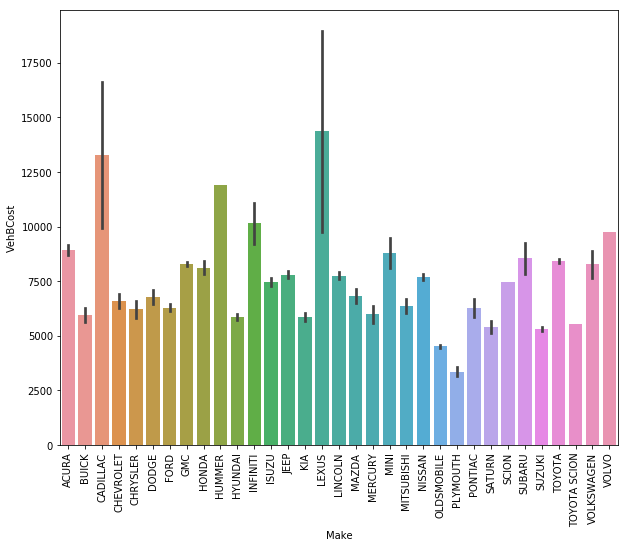

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x="Make",y=gp_2['VehBCost'],data=gp_2)
plt.xticks(rotation=90)

In [24]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy2
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,0
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,0
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,0
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,0
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,0


In [7]:
Is_OnlineSale=pd.get_dummies(df['IsOnlineSale'],drop_first=True)
df["IsOnlineSale"]=Is_OnlineSale

In [26]:
df.columns

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'PRIMEUNIT', 'AUCGUART', 'BYRNO',
       'VNZIP1', 'VNST', 'VehBCost', 'IsOnlineSale', 'WarrantyCost',
       'IsBadBuy2'],
      dtype='object')

In [19]:
#converting the date column 
df["PurchDate"]=pd.to_datetime(df["PurchDate"])
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [20]:
#Dropping PRIMRUNIT, AUCGUART 
df.drop("AUCGUART", inplace=True, axis=1)



In [21]:
df.drop("PRIMEUNIT",axis=1, inplace= True)


In [22]:
df['VNZIP1'].value_counts()


32824    3699
27542    3402
75236    2431
74135    2321
80022    2118
85226    2086
85040    2012
29697    1999
95673    1970
28273    1887
33619    1739
29532    1675
75050    1654
76040    1605
77041    1411
78754    1352
80011    1252
73108    1227
28625    1179
91752    1175
78219    1173
30272    1163
32124    1162
92807    1086
21075     975
77086     931
78227     916
80817     911
34761     902
85009     840
         ... 
17028      33
68138      26
45011      25
37138      18
2764       15
38128      15
48265      14
83687      14
70002      13
43207      12
97402      11
64153      10
77301       9
89506       7
89139       7
16066       6
12552       6
99224       5
23234       5
32225       5
30529       3
29323       3
87109       2
16137       2
85338       1
85248       1
25071       1
85260       1
80112       1
76101       1
Name: VNZIP1, Length: 153, dtype: int64

In [23]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,1844.0,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,3247.0,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020


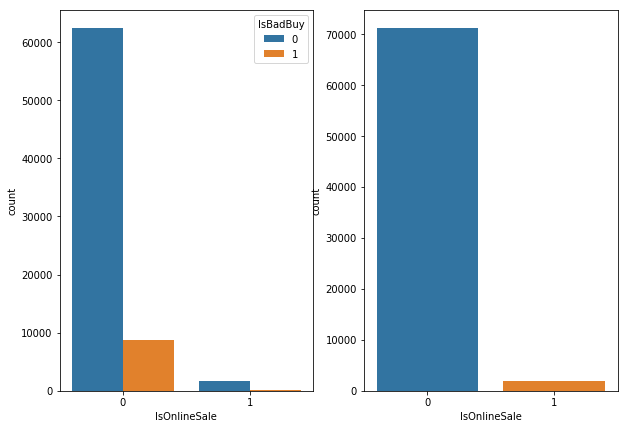

In [24]:
#Checking Out Online Sales-countplot
plt.figure(figsize=(10,7))
#subplots 
plt.subplot(1,2,1)
sns.countplot(x=df["IsOnlineSale"], data=df, hue="IsBadBuy")
plt.subplot(1,2,2)
sns.countplot(x=df["IsOnlineSale"], data=df)


In [25]:
print(df['Make'].value_counts(),"Unique Categories",df['Make'].nunique())

CHEVROLET       17248
DODGE           12912
FORD            11305
CHRYSLER         8844
PONTIAC          4258
KIA              2484
SATURN           2163
NISSAN           2085
HYUNDAI          1811
JEEP             1644
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           913
BUICK             720
GMC               649
HONDA             497
OLDSMOBILE        243
ISUZU             134
VOLKSWAGEN        134
SCION             129
LINCOLN            97
INFINITI           42
VOLVO              37
ACURA              33
CADILLAC           33
LEXUS              31
SUBARU             28
MINI               24
PLYMOUTH            2
TOYOTA SCION        1
HUMMER              1
Name: Make, dtype: int64 Unique Categories 33


In [26]:
type(df['PurchDate'].iloc[0])
# Creating Data and month column
df['Year']=df['PurchDate'].apply(lambda time:time.year)

In [27]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113,2009
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053,2009
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389,2009
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630,2009
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020,2009


In [35]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,IsBadBuy2,Year
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,21973,33619,FL,7100.0,0,1113,0,2009
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,19638,33619,FL,7600.0,0,1053,0,2009
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,19638,33619,FL,4900.0,0,1389,0,2009
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,19638,33619,FL,4100.0,0,630,0,2009
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,19638,33619,FL,4000.0,0,1020,0,2009


In [28]:
# sns.lineplot(x=df['Year'],y=df['MMRCurrentRetailCleanPrice'], data=df,hue="IsBadBuy2")
grp_Mak=df.groupby(by=["Make","IsBadBuy2","VehYear"],as_index=False).mean()
grp_Mak



KeyError: 'IsBadBuy2'

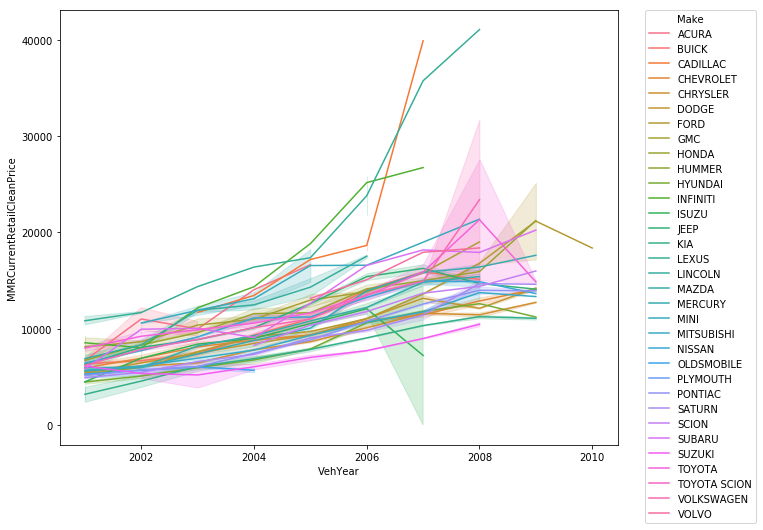

In [37]:
plt.figure(figsize=(10,8))
sns.lineplot(x="VehYear",y="MMRCurrentRetailCleanPrice",data=grp_Mak,hue="Make")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


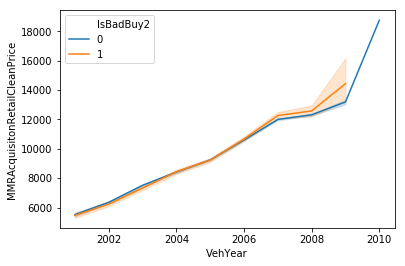

In [38]:
df_mazda=df[df['Make']=='MAZDA']
df_mazda_grp=df_mazda.groupby(by="VehYear", as_index=False).mean()
sns.lineplot(x=df['VehYear'],y=df['MMRAcquisitonRetailCleanPrice'],hue=df['IsBadBuy2'])

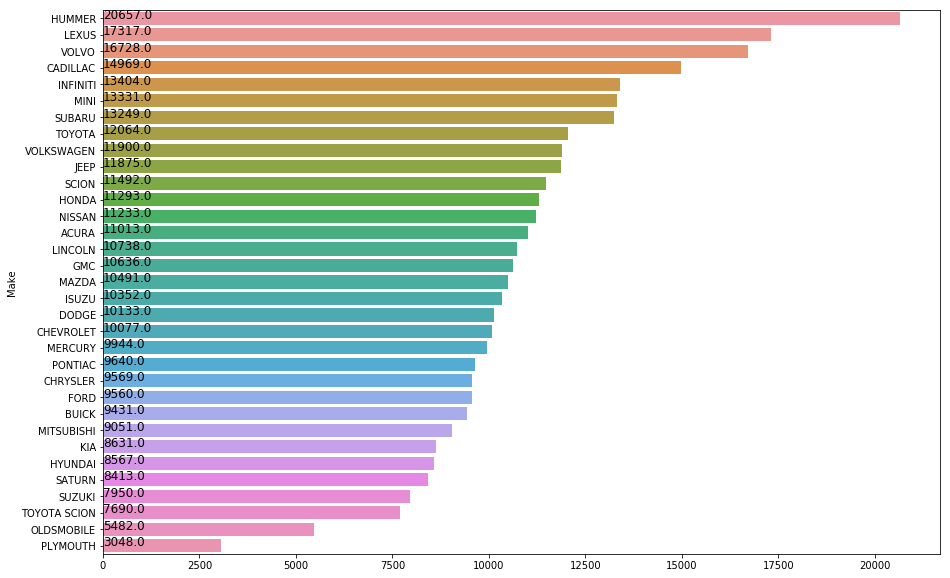

In [39]:
plt.figure(figsize=(15,10))
average_price_make=round(df.groupby(df["Make"]).mean()['MMRAcquisitonRetailCleanPrice'])
average_price_make=average_price_make.sort_values(ascending=False)
sns.barplot(x=average_price_make.values,y=average_price_make.index)
for i,v in enumerate(average_price_make.values):
    plt.text(0.8,i,v,color='k',fontsize=12)

In [45]:
df['VehicleAge'].value_counts()




4    17013
3    15902
5    12956
2     8482
6     8022
7     4646
1     3094
8     2220
9      646
0        2
Name: VehicleAge, dtype: int64

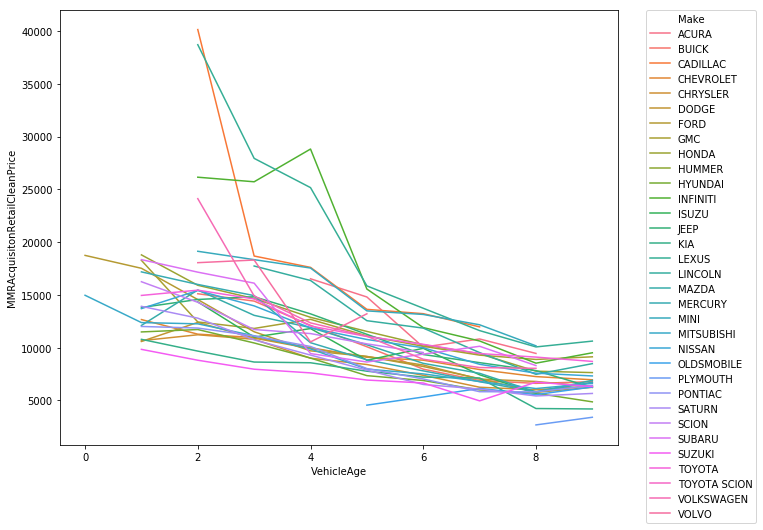

In [54]:
#Grouping by Age and make grp_make
plt.figure(figsize=(10,8))
grp_age_make=df.groupby(by=["Make","VehicleAge"], as_index=False).mean()
sns.lineplot(x="VehicleAge", y='MMRAcquisitonRetailCleanPrice', data=grp_age_make,hue=grp_age_make['Make'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [55]:
df.c

Index(['RefId', 'IsBadBuy', 'PurchDate', 'Auction', 'VehYear', 'VehicleAge',
       'Make', 'Model', 'Trim', 'SubModel', 'Color', 'Transmission',
       'WheelTypeID', 'WheelType', 'VehOdo', 'Nationality', 'Size',
       'TopThreeAmericanName', 'MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice', 'BYRNO', 'VNZIP1', 'VNST', 'VehBCost',
       'IsOnlineSale', 'WarrantyCost', 'IsBadBuy2', 'Year'],
      dtype='object')

In [34]:
df_2=df.copy()
df_2.dropna(inplace=True)
x=df_2[['MMRAcquisitionAuctionCleanPrice','MMRAcquisitionAuctionAveragePrice','MMRAcquisitonRetailCleanPrice','MMRAcquisitionRetailAveragePrice','MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
]]
x.dropna(inplace=True)

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
trns=scaler.fit_transform(x)
trns

array([[-1.34592561, -1.42326107, -0.86114139, -1.3653919 , -1.56071747,
        -1.37832073],
       [-0.11699249, -0.3241014 ,  0.03755747, -0.18797926, -0.2794975 ,
        -0.03669881],
       [ 1.08269773,  1.02861806,  1.06254307,  1.02906107,  0.82894603,
         0.74090963],
       ...,
       [-1.39454194, -1.35035762, -1.48788617, -1.45337881, -1.3594382 ,
        -1.35136546],
       [-0.71793421, -0.88970397, -0.68859121, -0.78575293, -0.91078249,
        -0.6239143 ],
       [-1.20044215, -1.1288433 , -1.32940258, -1.21225437, -0.76123058,
        -0.85081628]])

In [39]:
#convert to a data fram 
scaled_feat=pd.DataFrame(data=trns,columns=x.columns)
scaled_feat

,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionAuctionAveragePrice,MMRAcquisitonRetailCleanPrice,MMRAcquisitionRetailAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice
0,-1.345926,-1.423261,-0.861141,-1.365392,-1.560717,-1.378321
1,-0.116992,-0.324101,0.037557,-0.187979,-0.279498,-0.036699
2,1.082698,1.028618,1.062543,1.029061,0.828946,0.740910
3,-0.912034,-0.932965,-0.850513,-0.899599,-0.936118,-0.914622
4,-1.118928,-1.156082,-1.000244,-1.152141,-0.949138,-1.213177
5,0.069797,0.054436,0.056000,0.090758,0.162120,-0.001555
6,-1.389059,-1.398025,-1.423180,-1.485282,-1.291524,-1.360919
7,1.503064,1.723204,1.510798,1.659074,1.678049,1.845052
8,-1.222740,-1.236196,-1.213744,-1.254569,-1.466764,-1.458845
9,2.945836,2.702193,3.059374,2.934213,2.801976,2.772109


In [51]:
from sklearn.model_selection import train_test_split
df_2.dropna(axis=1, inplace= True)
X_train,X_test,y_train,y_test=train_test_split(scaled_feat,df_2['IsBadBuy'], test_size=0.20, random_state=101)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
#print(scaled_feat.shape,df_2.shape)

[[632   0]
 [ 24   0]]
             precision    recall  f1-score   support

          0       0.96      1.00      0.98       632
          1       0.00      0.00      0.00        24

avg / total       0.93      0.96      0.95       656



C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [57]:
df_2.drop(['Make'],axis=1)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Model,Trim,SubModel,Color,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
275,276,0,10/4/2010,ADESA,2003,7,ACCENT,GL,4D SEDAN GL,BLUE,...,5332.0,6887.0,NO,GREEN,5546,33619,FL,4500.0,0,1054
290,291,0,10/11/2010,ADESA,2005,5,1500 SILVERADO PICKU,Bas,REG CAB 4.3L,GREY,...,9264.0,11033.0,NO,GREEN,19638,33619,FL,7100.0,0,905
297,298,0,10/18/2010,ADESA,2006,4,EQUINOX FWD V6,LS,4D SUV LS,GREY,...,11543.0,13228.0,NO,GREEN,5546,33619,FL,8950.0,0,1215
305,306,0,10/25/2010,ADESA,2004,6,PT CRUISER,Bas,4D SEDAN,BLUE,...,6691.0,7438.0,NO,GREEN,5546,33619,FL,4600.0,0,1389
314,315,0,10/25/2010,ADESA,2002,8,SABLE,LS,4D SEDAN LS PREMIUM,GREEN,...,5816.0,6883.0,NO,GREEN,5546,33619,FL,4200.0,0,1353
321,322,0,10/25/2010,ADESA,2006,4,GRAND PRIX,Bas,4D SEDAN,SILVER,...,9367.0,10952.0,NO,GREEN,5546,33619,FL,5900.0,0,2351
322,323,0,10/25/2010,ADESA,2003,7,ELANTRA,GLS,4D SEDAN,BEIGE,...,5383.0,6294.0,NO,GREEN,5546,33619,FL,3700.0,0,894
333,334,0,11/1/2010,ADESA,2009,1,IMPALA V6,LT,4D SEDAN LT 3.5L,GREY,...,14779.0,16077.0,NO,GREEN,19638,33619,FL,9000.0,0,1703
337,338,0,11/8/2010,ADESA,2004,6,ACCENT,GL,4D SEDAN GL,SILVER,...,5096.0,5870.0,NO,GREEN,5546,33619,FL,4000.0,0,983
338,339,0,11/8/2010,ADESA,2006,4,F150 PICKUP 4WD V8,STX,EXT CAB 4.6L STX,WHITE,...,17496.0,20147.0,NO,GREEN,5546,33619,FL,9600.0,0,1774


In [75]:
a="hi how are you doing Sundar its crazy its very bad"
import nltk 
words=a.split()
stopwords=nltk.corpus.stopwords.words("english")
filt_words=[w for w in words if w not in stopwords]



In [81]:
#wrong approach
from textblob import TextBlob
str1=''.join(filt_words)# converting list to a strin
Blob=TextBlob(str1)
Blob.sentiment


Sentiment(polarity=0.0, subjectivity=0.0)

In [82]:
str1

'hiSundarcrazybad'

In [83]:
for a in filt_words:
    b=TextBlob(a)
    score=b.sentiment
print(score)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)


In [102]:
senti=0
dic={'crazy':1,'Sundar':2,'bad':3}
filt_words
for g in filt_words:
    senti+=dic.get(g,0)            
print(senti)
print(filt_words)

6
['hi', 'Sundar', 'crazy', 'bad']


In [107]:
a=[1,2,3,50]
b=[2,3,54,9]
import math
def euliden(x,y):
    dist=[(a-b)**2 for a,b in zip(a,b)]
    eul=math.sqrt(sum(dist))
    return(eul)

In [2]:
df.head()

NameError: name 'df' is not defined

In [14]:
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2009-12-07,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,7451.0,8552.0,11597.0,12409.0,21973,33619,FL,7100.0,0,1113
1,2,0,2009-12-07,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,7456.0,9222.0,11374.0,12791.0,19638,33619,FL,7600.0,0,1053
2,3,0,2009-12-07,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,4035.0,5557.0,7146.0,8702.0,19638,33619,FL,4900.0,0,1389
3,4,0,2009-12-07,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,1844.0,2646.0,4375.0,5518.0,19638,33619,FL,4100.0,0,630
4,5,0,2009-12-07,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,3247.0,4384.0,6739.0,7911.0,19638,33619,FL,4000.0,0,1020


In [28]:
df.info()
df['BYRNO']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 32 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null datetime64[ns]
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Na

0        21973
1        19638
2        19638
3        19638
4        19638
5        19638
6        19638
7        19638
8        21973
9        21973
10        5546
11        5546
12       19638
13       19638
14       19638
15        5546
16       19638
17        5546
18       19638
19       19638
20       19638
21        5546
22        5546
23        5546
24        5546
25        5546
26        5546
27       19638
28       19638
29       19638
         ...  
72953    18111
72954    18111
72955    18111
72956    18881
72957    18881
72958    18881
72959    18881
72960    18881
72961    18111
72962    18111
72963    18881
72964    18881
72965    18881
72966    18881
72967    18881
72968    18881
72969    18111
72970    18881
72971    18881
72972    18111
72973    18111
72974    18111
72975    18111
72976    18881
72977    18111
72978    18111
72979    18881
72980    18111
72981    18881
72982    18111
Name: BYRNO, Length: 72983, dtype: int64

In [29]:
#preprocession
df_3=df.copy()
df_3.dropna(axis=0,inplace=True)

In [30]:

df_3.head()
x=df_3[['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','VehicleAge','VehOdo','VehBCost','WarrantyCost']]
normal_col=['MMRAcquisitionAuctionAveragePrice',
       'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice',
       'MMRAcquisitonRetailCleanPrice', 'MMRCurrentAuctionAveragePrice',
       'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice',
       'MMRCurrentRetailCleanPrice','VehicleAge','VehOdo','VehBCost','WarrantyCost']

#Splitting the data with strig data

x_1=df_3[['Auction','Make','Model','Trim','SubModel','Color', 'Transmission','WheelType','Nationality','Size','VNST']]

String_col=['Auction','Make','Model','Trim','SubModel','Color', 'Transmission','WheelType','Nationality','Size','VNST']


In [31]:
df_3.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost,Year
count,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000,67270.000000
mean,36344.861290,0.095630,2005.352966,4.168485,1.493251,71727.835543,6164.700818,7414.887127,8542.039899,9899.771845,6168.741029,7431.972187,8820.813587,10192.698023,26454.859967,58255.647629,6755.693426,0.025033,1278.803196,2009.521391
std,20932.365698,0.294085,1.727841,1.707595,0.521212,14396.937346,2458.874187,2721.127550,3159.118697,3389.425324,2431.857758,2683.422636,3091.584354,3310.765402,25939.263304,26123.753189,1746.197418,0.156228,579.053723,0.499546
min,1.000000,0.000000,2001.000000,0.000000,1.000000,5368.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1400.000000,0.000000,462.000000,2009.000000
25%,18272.250000,0.000000,2004.000000,3.000000,1.000000,62149.000000,4311.000000,5457.000000,6319.000000,7528.250000,4311.000000,5469.000000,6565.000000,7825.000000,17212.000000,32124.000000,5470.000000,0.000000,853.000000,2009.000000
50%,36386.500000,0.000000,2005.000000,4.000000,1.000000,73527.500000,6163.000000,7381.000000,8498.000000,9870.000000,6130.000000,7390.000000,8811.000000,10177.000000,19662.000000,74135.000000,6750.000000,0.000000,1169.000000,2010.000000
75%,54241.750000,0.000000,2007.000000,5.000000,2.000000,82529.750000,7807.750000,9050.000000,10711.750000,12156.000000,7777.000000,9045.000000,10975.000000,12376.000000,22808.000000,80022.000000,7915.000000,0.000000,1623.000000,2010.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,40308.000000,35722.000000,36859.000000,39080.000000,40308.000000,99761.000000,99224.000000,35900.000000,1.000000,7498.000000,2010.000000


In [32]:
#Standaiztion of the numeric variable 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled_data_1=scaler.fit_transform(x)
scaled_data=pd.DataFrame(data=scaled_data_1,columns=normal_col)

df_3[normal_col]=scaled_data
df_3.head()


,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year
0,1,0,2009-12-07,ADESA,2006,-0.684292,MAZDA,MAZDA3,i,4D SEDAN I,...,0.417391,0.897988,0.669428,21973,33619,FL,0.197177,0,-0.286337,2009
1,2,0,2009-12-07,ADESA,2004,0.486954,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,0.667074,0.825857,0.784810,19638,33619,FL,0.483515,0,-0.389955,2009
2,3,0,2009-12-07,ADESA,2005,-0.098669,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,-0.698729,-0.541737,-0.450261,19638,33619,FL,-1.062713,0,0.190306,2009
3,4,0,2009-12-07,ADESA,2004,0.486954,DODGE,NEON,SXT,4D SEDAN,...,-1.783546,-1.438048,-1.411979,19638,33619,FL,-1.520855,0,-1.120463,2009
4,5,0,2009-12-07,ADESA,2005,-0.098669,FORD,FOCUS,ZX3,2D COUPE ZX3,...,-1.135861,-0.673386,-0.689181,19638,33619,FL,-1.578123,0,-0.446945,2009


In [76]:
#one hot enconding the categorical variable 
from sklearn.preprocessing import OneHotEncoder
onehot=OneHotEncoder()
scaled_str=onehot.categorical_features()



TypeError: 'str' object is not callable

In [78]:
from sklearn.preprocessing import CategoricalEncoder

ImportError: cannot import name 'CategoricalEncoder'

In [33]:
df['TopThreeAmericanName'].value_counts


<bound method IndexOpsMixin.value_counts of 0           OTHER
1        CHRYSLER
2        CHRYSLER
3        CHRYSLER
4            FORD
5           OTHER
6           OTHER
7            FORD
8           OTHER
9            FORD
10             GM
11           FORD
12       CHRYSLER
13          OTHER
14       CHRYSLER
15             GM
16             GM
17             GM
18             GM
19             GM
20       CHRYSLER
21             GM
22             GM
23             GM
24             GM
25           FORD
26             GM
27       CHRYSLER
28       CHRYSLER
29       CHRYSLER
           ...   
72953          GM
72954    CHRYSLER
72955       OTHER
72956       OTHER
72957    CHRYSLER
72958    CHRYSLER
72959          GM
72960    CHRYSLER
72961          GM
72962    CHRYSLER
72963          GM
72964    CHRYSLER
72965    CHRYSLER
72966       OTHER
72967    CHRYSLER
72968       OTHER
72969          GM
72970    CHRYSLER
72971       OTHER
72972    CHRYSLER
72973    CHRYSLER
72974    CHRYSLER
72

In [33]:
df_3.sample(5)

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year
9552,9561,0,2009-07-20,MANHEIM,2006,-0.098669,KIA,SPECTRA 2.0L I4 EFI,EX,4D SEDAN,...,-0.180730,-0.611281,-0.661392,20928,27542,NC,-0.719107,0,-0.332965,2009
69254,69286,0,2009-12-18,ADESA,2005,NaN,DODGE,CARAVAN GRAND FWD V6,SXT,MINIVAN 3.8L SXT,...,NaN,NaN,NaN,16926,91752,CA,NaN,0,NaN,2009
58137,58166,0,2009-01-13,ADESA,2004,-1.269915,FORD,TAURUS 3.0L V6 EFI,SES,4D SEDAN SES,...,1.067312,1.256707,1.219456,22808,78754,TX,0.890116,0,0.190306,2009
13724,13734,0,2010-06-08,MANHEIM,2004,-0.098669,ISUZU,ASCENDER 4WD 6C,S,SPORT UTILITY,...,-0.289920,-0.847084,-0.757141,20740,21075,MD,-0.679020,0,-0.476303,2010
7140,7147,1,2009-03-19,MANHEIM,2003,-0.684292,DODGE,NEON 2.0L I4 SFI,SXT,4D SEDAN SXT,...,0.006718,-0.486749,-0.497381,18880,30272,GA,-0.432768,0,-0.415859,2009


In [34]:
drop_Col=['RefId','BYRNO','VNZIP1','TopThreeAmericanName']
df_3.drop(drop_Col,axis=1,inplace=True)
df_3

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost,Year
0,0,2009-12-07,ADESA,2006,-0.684292,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,1.091706,0.527279,0.417391,0.897988,0.669428,FL,0.197177,0,-0.286337,2009
1,0,2009-12-07,ADESA,2004,0.486954,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,0.788407,0.529335,0.667074,0.825857,0.784810,FL,0.483515,0,-0.389955,2009
2,0,2009-12-07,ADESA,2005,-0.098669,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,-0.425672,-0.877418,-0.698729,-0.541737,-0.450261,FL,-1.062713,0,0.190306,2009
3,0,2009-12-07,ADESA,2004,0.486954,DODGE,NEON,SXT,4D SEDAN,SILVER,...,-1.242040,-1.778382,-1.783546,-1.438048,-1.411979,FL,-1.520855,0,-1.120463,2009
4,0,2009-12-07,ADESA,2005,-0.098669,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,-0.351912,-1.201453,-1.135861,-0.673386,-0.689181,FL,-1.578123,0,-0.446945,2009
5,0,2009-12-07,ADESA,2004,0.486954,MITSUBISHI,GALANT 4C,ES,4D SEDAN ES,WHITE,...,-0.390267,-0.600262,-0.598111,-0.217306,-0.224028,FL,-0.661839,0,-1.182633,2009
6,0,2009-12-07,ADESA,2004,0.486954,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,-0.414165,-1.311246,-1.236107,-0.838028,-0.480164,FL,-1.463587,0,-1.287978,2009
7,0,2009-12-07,ADESA,2005,-0.098669,FORD,TAURUS,SE,4D SEDAN SE,WHITE,...,-0.646950,-1.009829,-1.063565,-0.607723,-0.589203,FL,-1.291784,0,-0.783704,2009
8,0,2009-12-07,ADESA,2007,-1.269915,KIA,SPECTRA,EX,4D SEDAN EX,BLACK,...,0.213674,0.102087,-0.022722,0.264005,0.176789,FL,-0.661839,0,-1.376054,2009
9,0,2009-12-07,ADESA,2007,-1.269915,FORD,FIVE HUNDRED,SEL,4D SEDAN SEL,RED,...,1.108228,1.232918,1.325194,1.215951,1.405215,FL,0.540783,0,0.611687,2009


In [35]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67270 entries, 0 to 72982
Data columns (total 29 columns):
IsBadBuy                             67270 non-null int64
PurchDate                            67270 non-null datetime64[ns]
Auction                              67270 non-null object
VehYear                              67270 non-null int64
VehicleAge                           62269 non-null float64
Make                                 67270 non-null object
Model                                67270 non-null object
Trim                                 67270 non-null object
SubModel                             67270 non-null object
Color                                67270 non-null object
Transmission                         67270 non-null object
WheelTypeID                          67270 non-null float64
WheelType                            67270 non-null object
VehOdo                               62269 non-null float64
Nationality                          67270 non-null obje

In [37]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# # def encoding(x):
# encoder.fit_transform
string_data=pd.get_dummies(data=x_1)

In [38]:
string_data[:,string_data]


TypeError: unhashable type: 'slice'

In [39]:
df_4=df_3.drop(String_col,axis=1).copy()


In [40]:
df_4.shape
df_3.loc[:,df_3.isnull().any()]


,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost
0,-0.684292,1.202915,0.809441,0.887180,0.979382,1.091706,0.527279,0.417391,0.897988,0.669428,0.197177,-0.286337
1,0.486954,1.518748,0.280333,0.355779,0.745454,0.788407,0.529335,0.667074,0.825857,0.784810,0.483515,-0.389955
2,-0.098669,0.144418,-1.204910,-0.975664,-0.506170,-0.425672,-0.877418,-0.698729,-0.541737,-0.450261,-1.062713,0.190306
3,0.486954,-0.424457,-1.737272,-1.741896,-1.229479,-1.242040,-1.778382,-1.783546,-1.438048,-1.411979,-1.520855,-1.120463
4,-0.098669,-0.163983,-0.915751,-0.867620,-0.259264,-0.351912,-1.201453,-1.135861,-0.673386,-0.689181,-1.578123,-0.446945
5,0.486954,0.647793,-0.920632,-0.921275,-0.581192,-0.390267,-0.600262,-0.598111,-0.217306,-0.224028,-0.661839,-1.182633
6,0.486954,-0.444531,-1.300890,-1.240997,-0.728702,-0.414165,-1.311246,-1.236107,-0.838028,-0.480164,-1.463587,-1.287978
7,-0.098669,-0.411399,-1.159767,-1.129278,-0.593537,-0.646950,-1.009829,-1.063565,-0.607723,-0.589203,-1.291784,-0.783704
8,-1.269915,-1.514697,0.012729,-0.051776,0.362433,0.213674,0.102087,-0.022722,0.264005,0.176789,-0.661839,-1.376054
9,-1.269915,0.912990,0.683366,0.858883,1.010403,1.108228,1.232918,1.325194,1.215951,1.405215,0.540783,0.611687


In [134]:
#concanting two data frames 
string_data[normal_col]=df_3[normal_col]
string_data["IsBadBuy"]=df_3['IsBadBuy']



In [143]:
string_data.loc[:,string_data.isnull().any()]

MMRAcquisitionAuctionAveragePrice    62269
MMRAcquisitionAuctionCleanPrice      62269
MMRAcquisitionRetailAveragePrice     62269
MMRAcquisitonRetailCleanPrice        62269
MMRCurrentAuctionAveragePrice        62269
MMRCurrentAuctionCleanPrice          62269
MMRCurrentRetailAveragePrice         62269
MMRCurrentRetailCleanPrice           62269
VehicleAge                           62269
VehOdo                               62269
VehBCost                             62269
WarrantyCost                         62269
dtype: int64

In [130]:
df_5.head()

,IsBadBuy,PurchDate,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,...,VNST_OK,VNST_OR,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,VNST_WV
0,0.0,2009-12-07,2006.0,-0.684292,1.0,1.202915,0.809441,0.887180,0.979382,1.091706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,2009-12-07,2004.0,0.486954,1.0,1.518748,0.280333,0.355779,0.745454,0.788407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2009-12-07,2005.0,-0.098669,2.0,0.144418,-1.204910,-0.975664,-0.506170,-0.425672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2009-12-07,2004.0,0.486954,1.0,-0.424457,-1.737272,-1.741896,-1.229479,-1.242040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2009-12-07,2005.0,-0.098669,2.0,-0.163983,-0.915751,-0.867620,-0.259264,-0.351912,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(string_data.drop('IsBadBuy',axis=1),string_data['IsBadBuy'],test_size=0.40,random_state=101)


In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [139]:
knn.fit(X_train,y_train)
# pred = knn.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [41]:
print(df_3['Model'].nunique(),df_3['SubModel'].nunique())

957 826


In [1]:
df_3.head()

NameError: name 'df_3' is not defined

In [1]:
from sklearn import preprocessing
cat_feat=[ f for f in df.columns if df[f].dtype=='object' ]


NameError: name 'df' is not defined